In [118]:
import sys
import logging
import pickle
import yaml
import matplotlib.cm as cm
from joblib import Parallel, delayed
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import configs

# Parameters

In [119]:
internal_dim = 16
generic_exp_name = 'gridworld8x8_shuffobs'
network_yaml = 'dm'

In [120]:
engram_dir = '/Volumes/aronov-locker/Ching/rl/'
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/' # Axon path
exp_name = f'{generic_exp_name}_{network_yaml}_dim{internal_dim}'
latents_dir = f'{engram_dir}latents/{exp_name}/'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'
analysis_dir = f'{engram_dir}analysis/{exp_name}/'

# Load analyses dataframes

In [121]:
with open(f'{analysis_dir}representation_df.p', 'rb') as f:
    repr_df = pickle.load(f)
with open(f'{analysis_dir}transition_df.p', 'rb') as f:
    T_df = pickle.load(f)

# Make encoder receptive fields

In [122]:
np.unique(repr_df['model'])

array(['gridworld8x8_shuffobs_entro-1', 'gridworld8x8_shuffobs_entro0',
       'gridworld8x8_shuffobs_entro1',
       'gridworld8x8_shuffobs_g0.25_-3_entro-1',
       'gridworld8x8_shuffobs_g0.25_-3_entro0',
       'gridworld8x8_shuffobs_g0.5_-3_entro-1',
       'gridworld8x8_shuffobs_g0.5_-3_entro0',
       'gridworld8x8_shuffobs_g0.8_-4_entro-1',
       'gridworld8x8_shuffobs_g0.8_-4_entro0',
       'gridworld8x8_shuffobs_g0_-2_entro-1',
       'gridworld8x8_shuffobs_g0_-2_entro0', 'gridworld8x8_shuffobs_mf0',
       'gridworld8x8_shuffobs_noQ_entro0',
       'gridworld8x8_shuffobs_noQ_g0.5_-3_entro0',
       'gridworld8x8_shuffobs_noQ_g0_-2_entro0'], dtype=object)

In [123]:
model = f'{generic_exp_name}_noQ_entro0'

In [124]:
_df = repr_df[repr_df['model'] == model]
_df = _df[_df['iteration'] == 2]

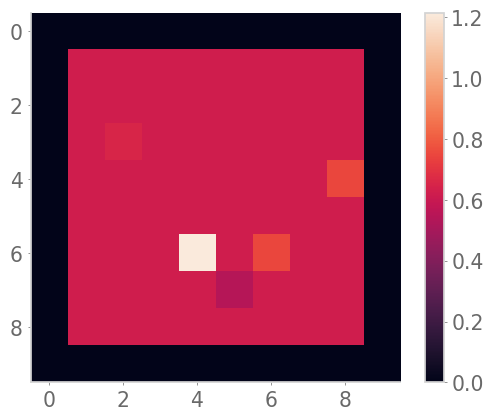

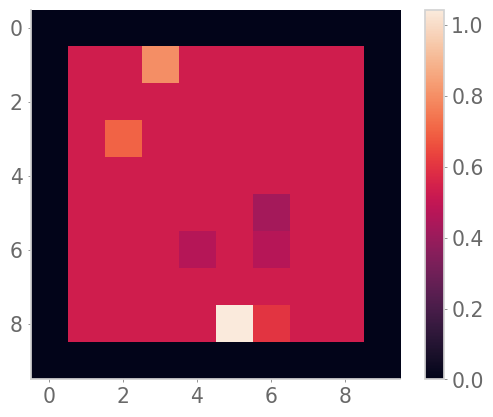

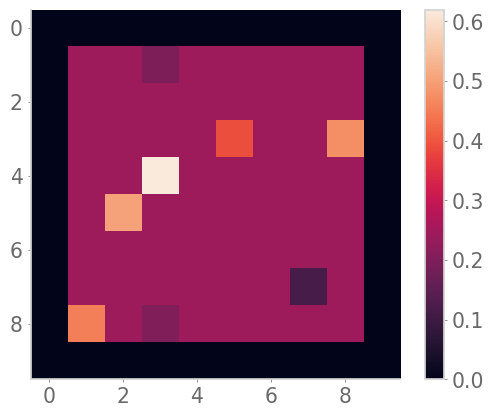

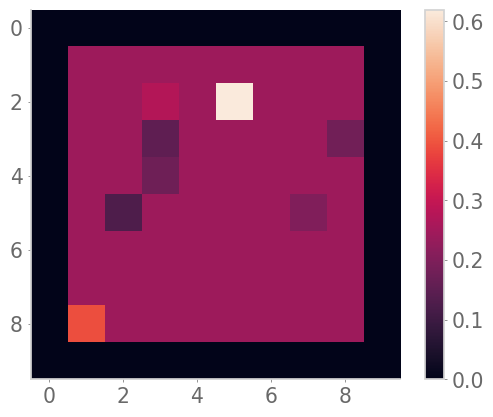

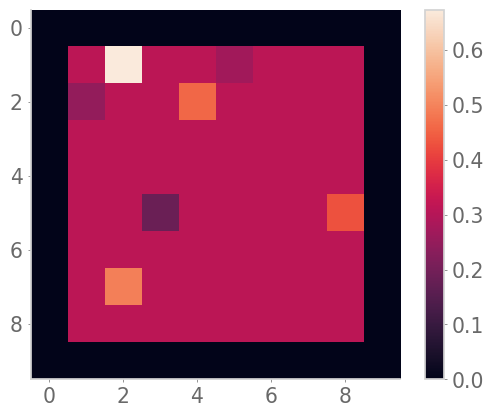

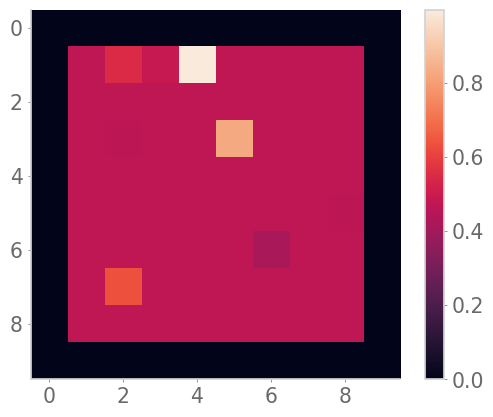

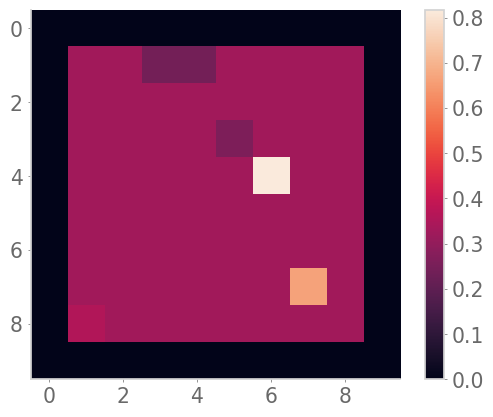

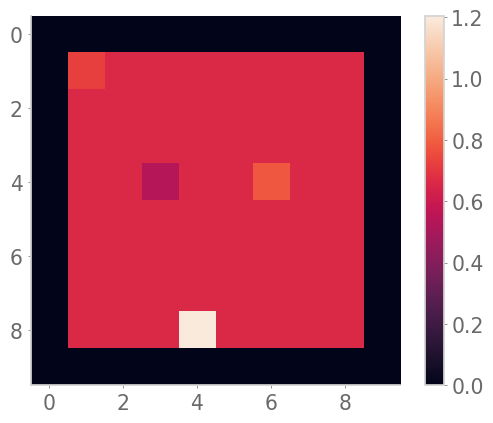

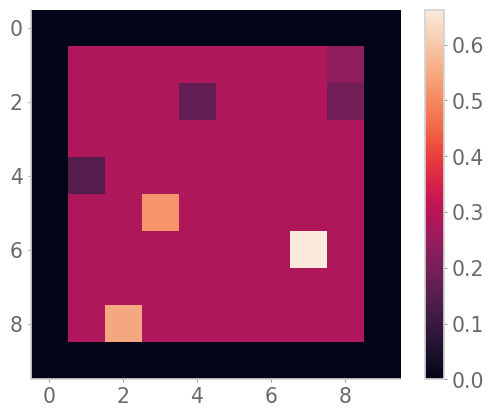

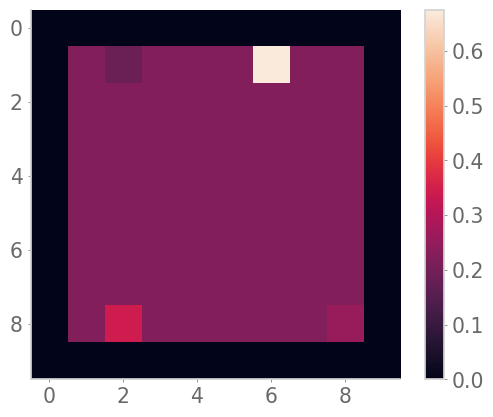

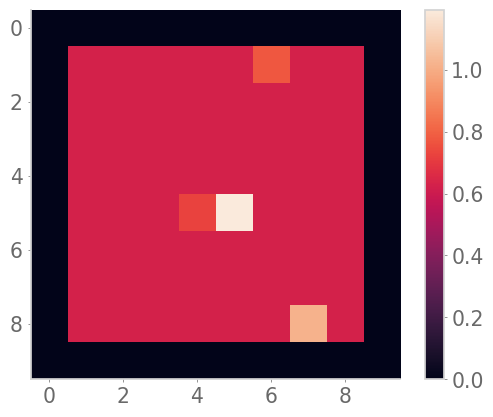

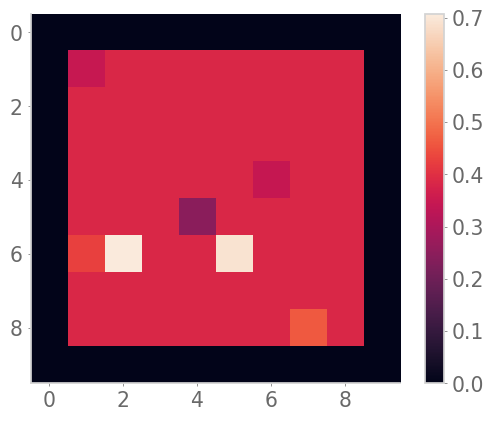

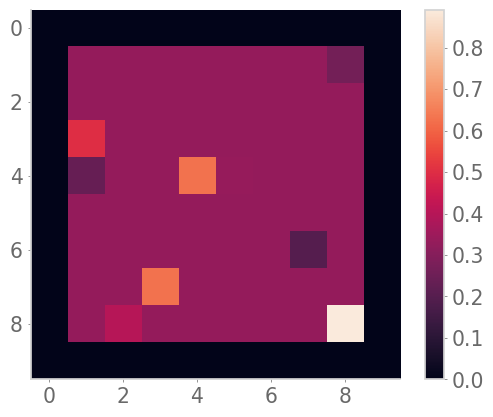

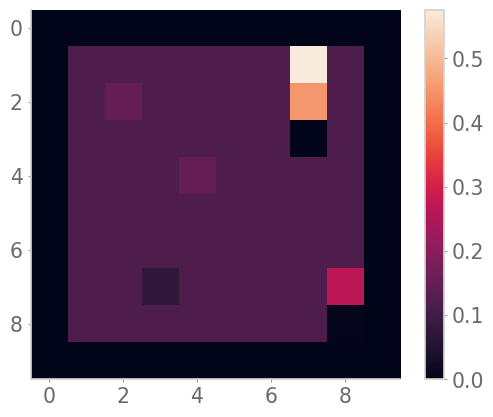

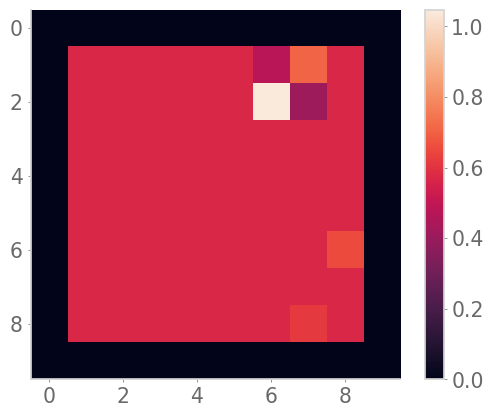

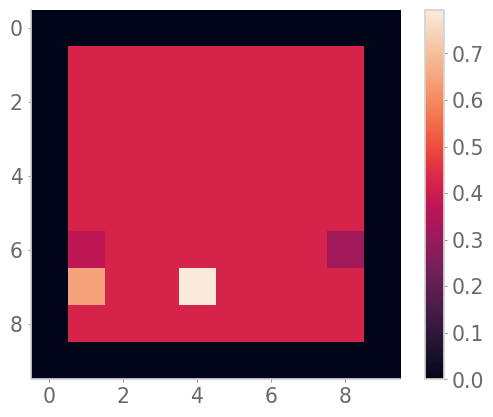

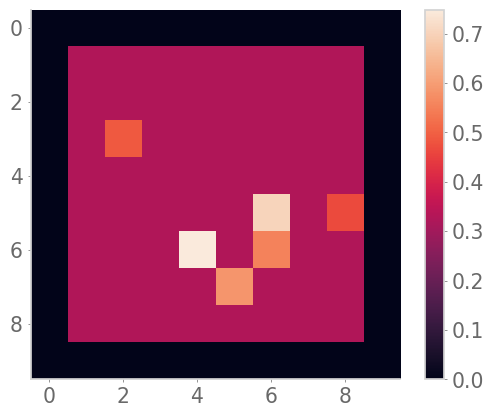

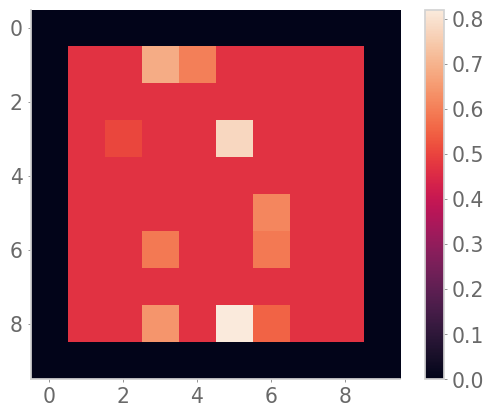

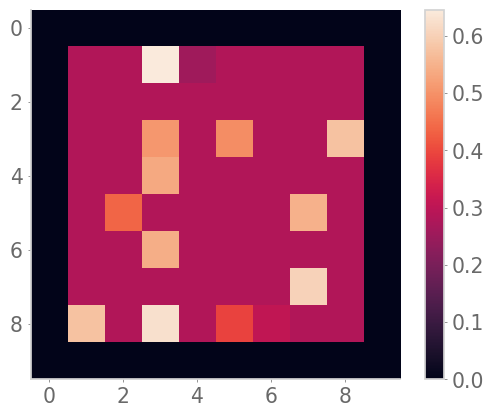

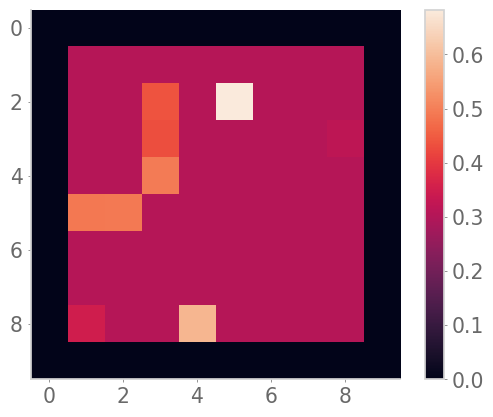

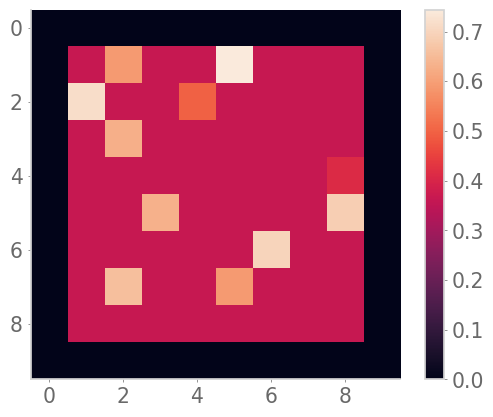

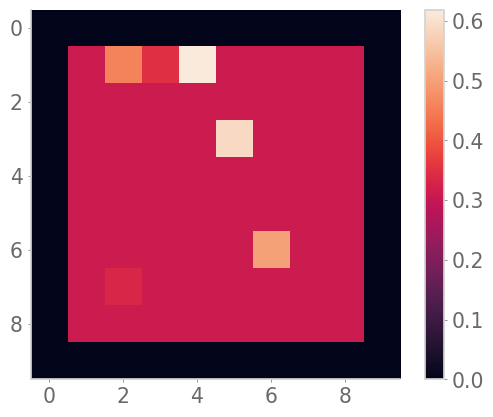

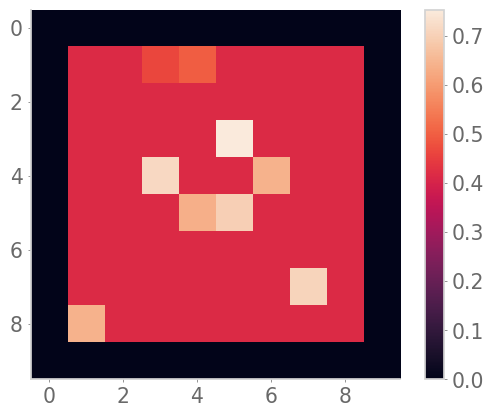

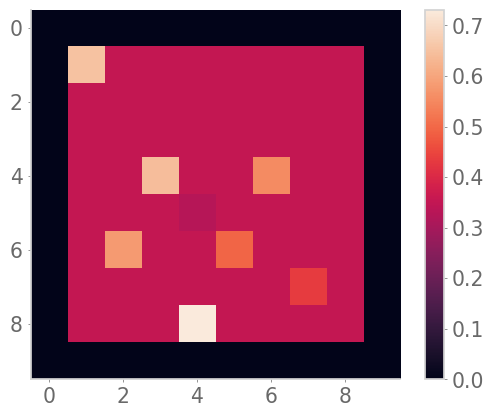

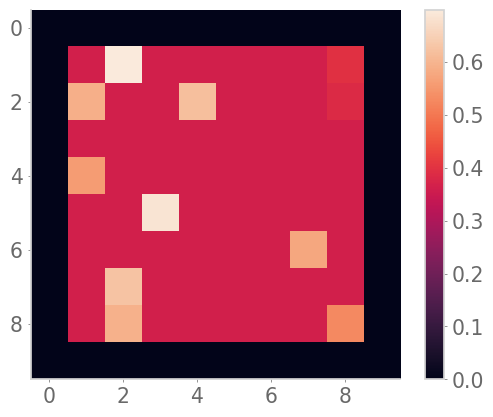

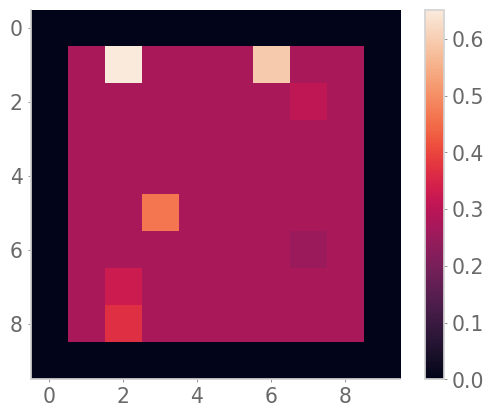

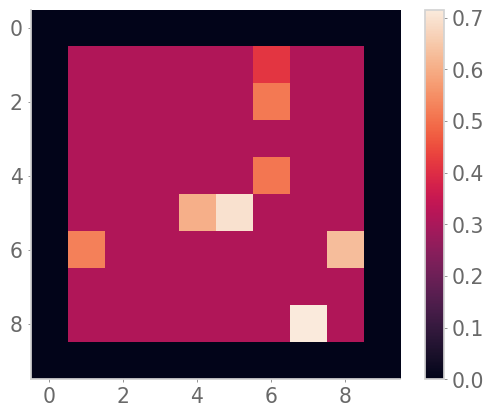

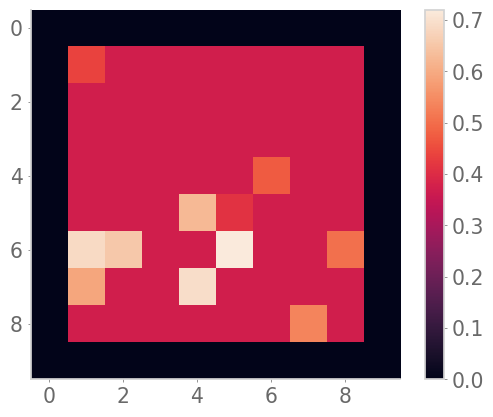

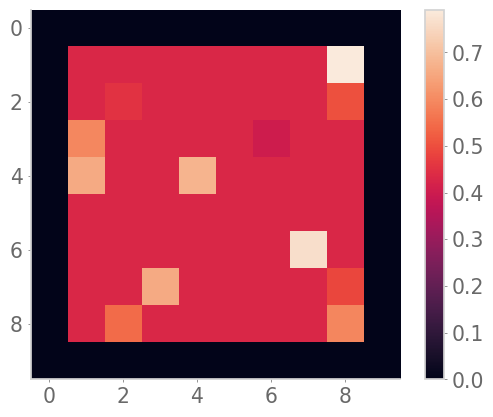

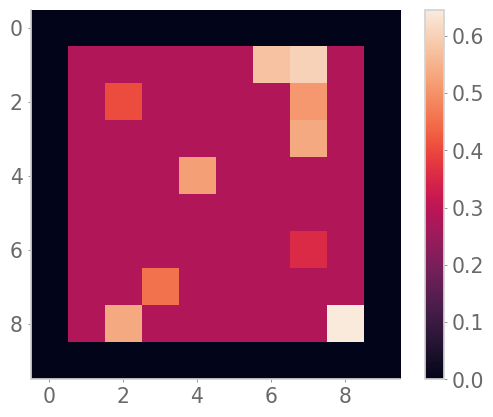

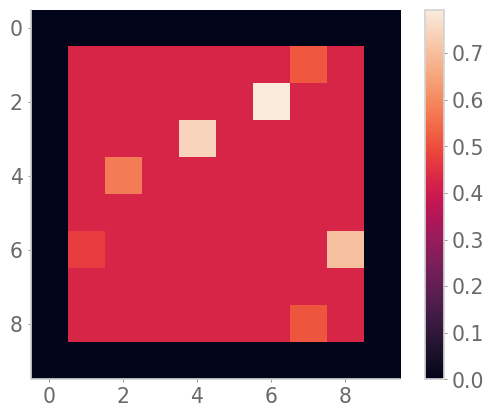

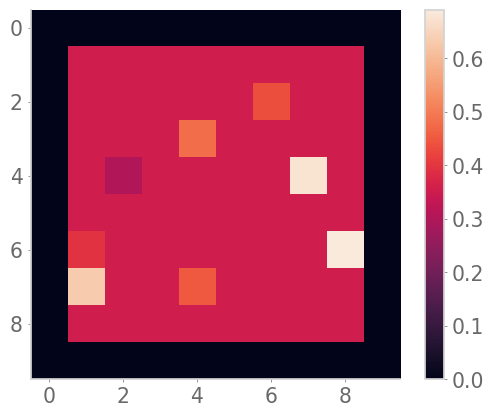

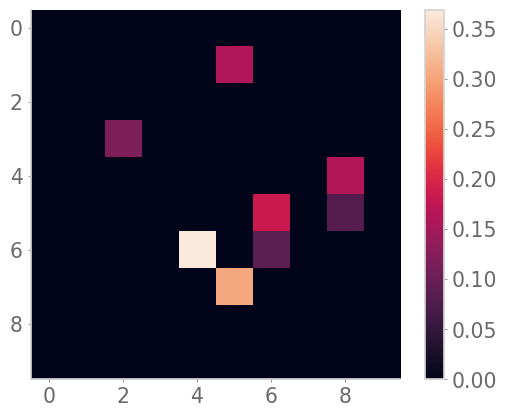

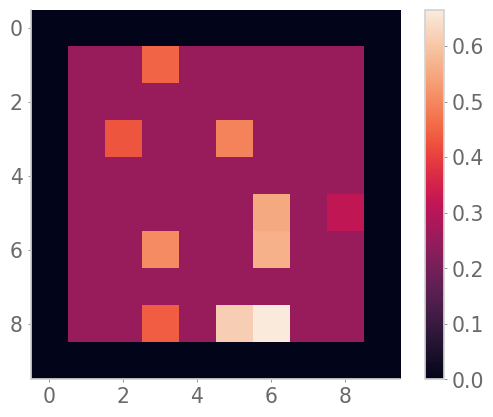

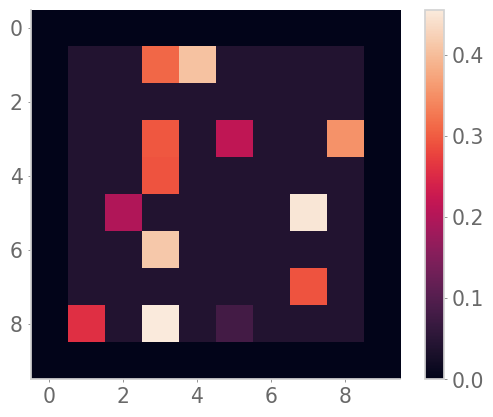

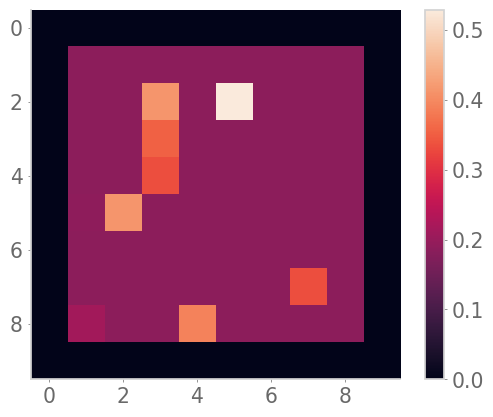

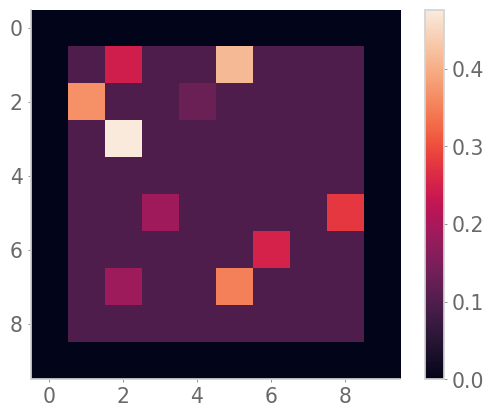

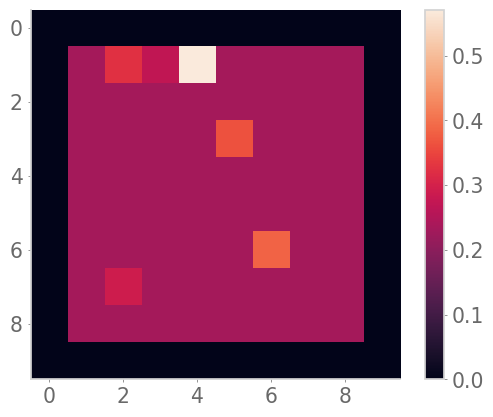

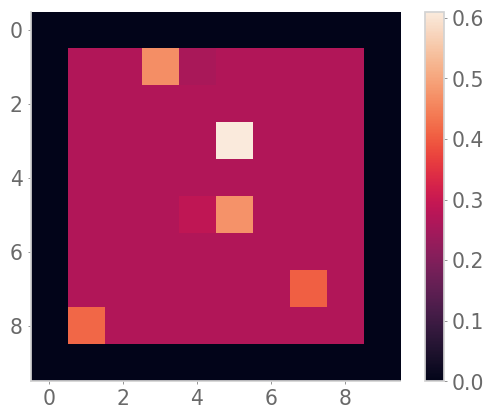

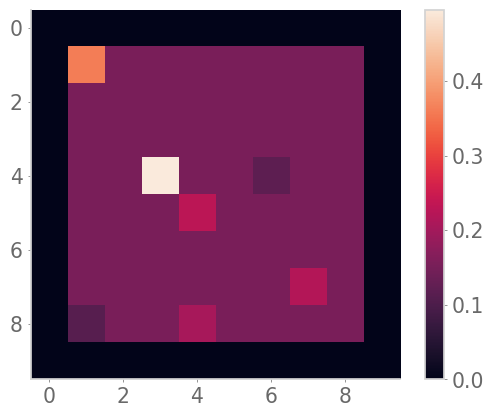

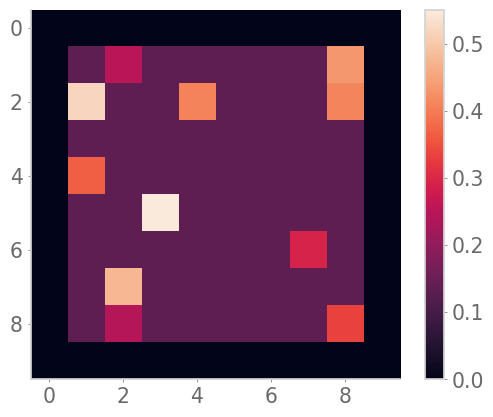

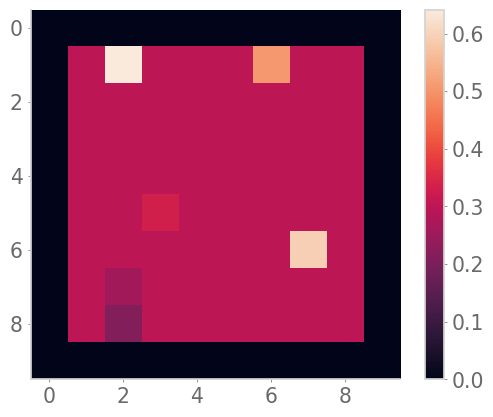

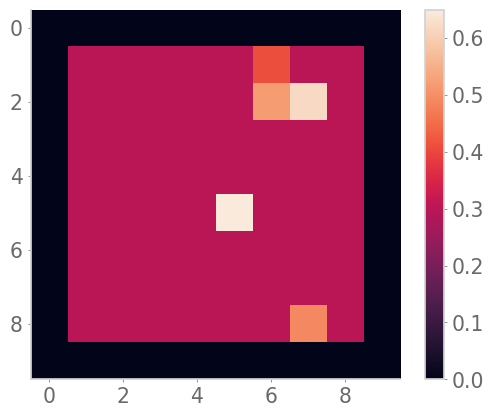

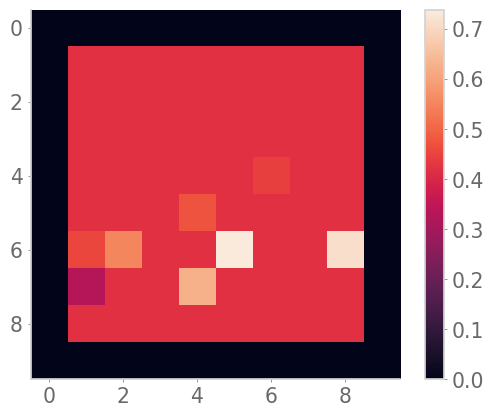

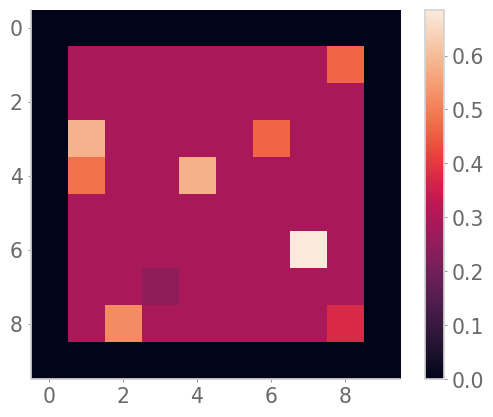

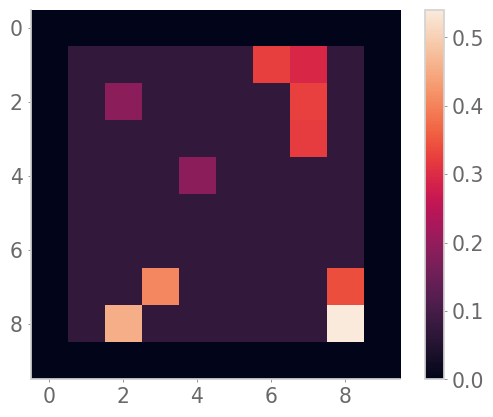

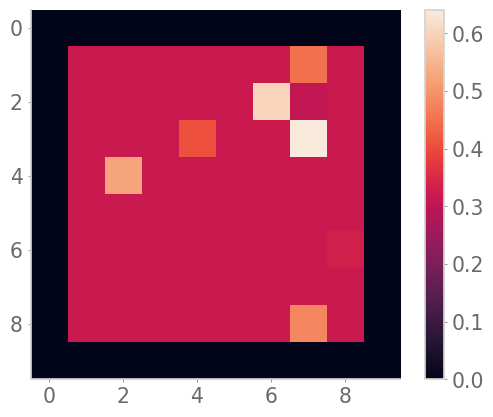

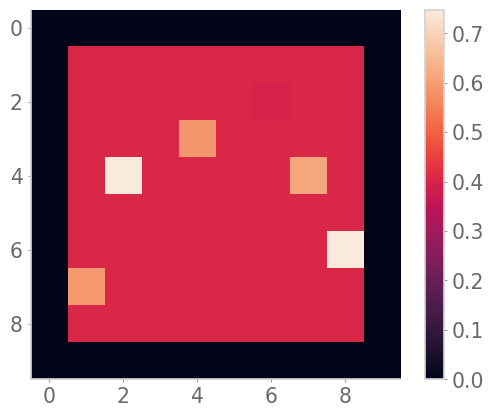

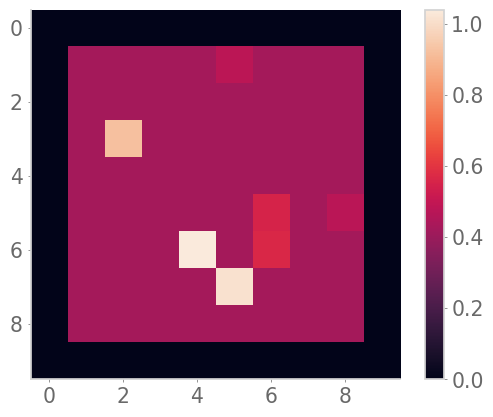

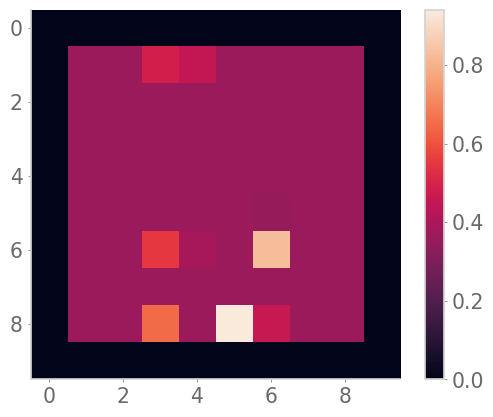

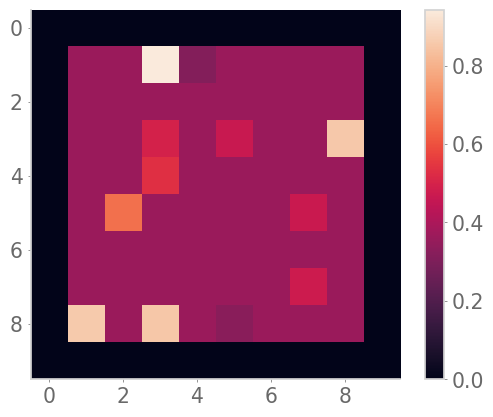

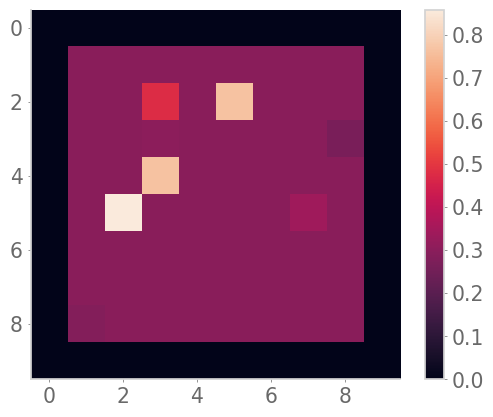

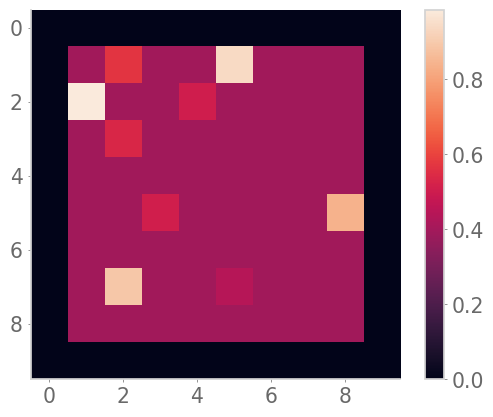

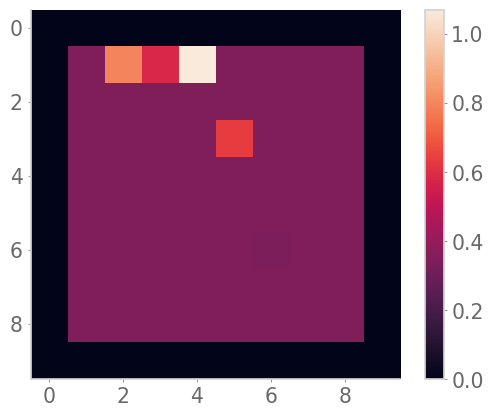

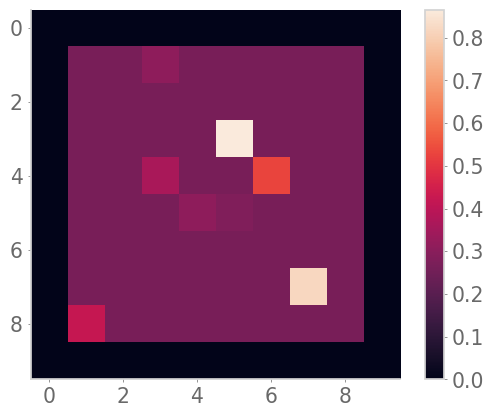

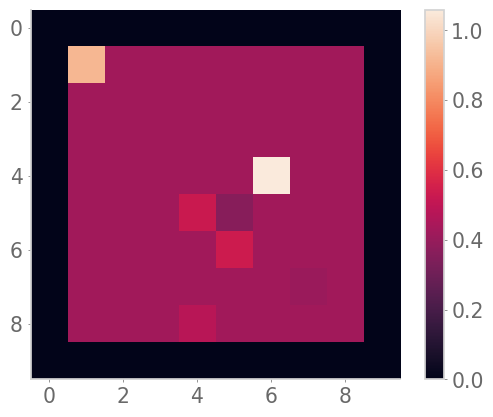

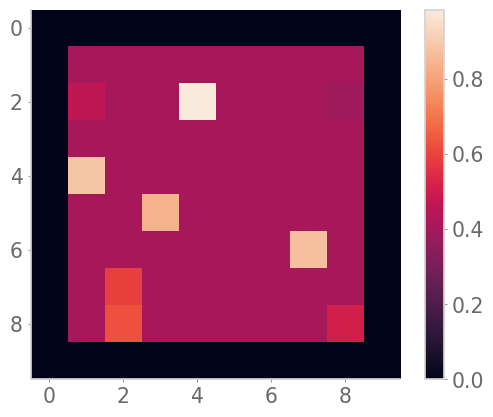

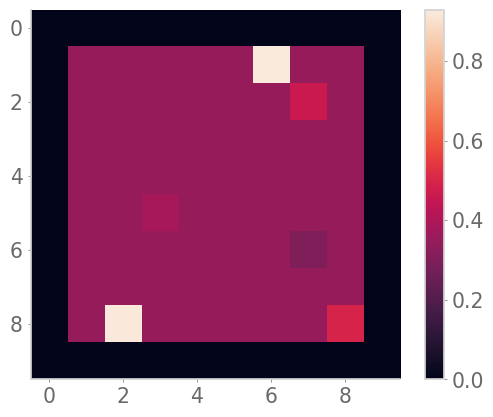

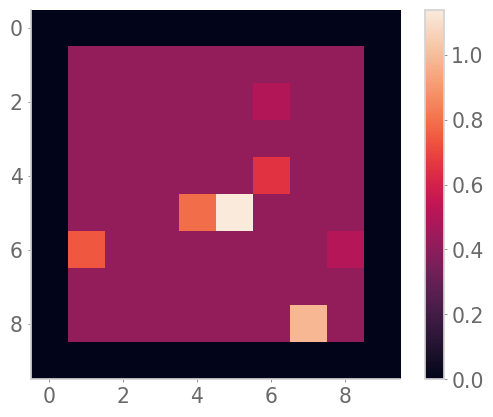

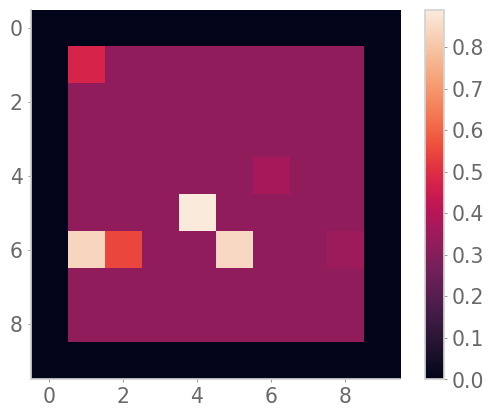

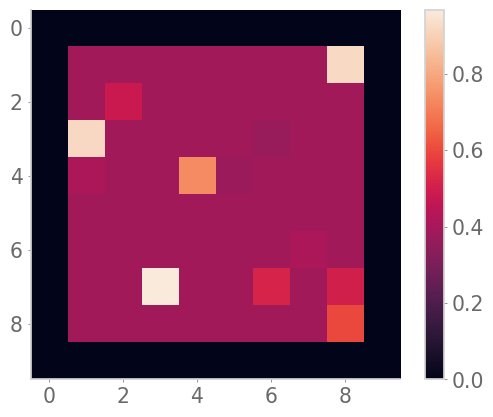

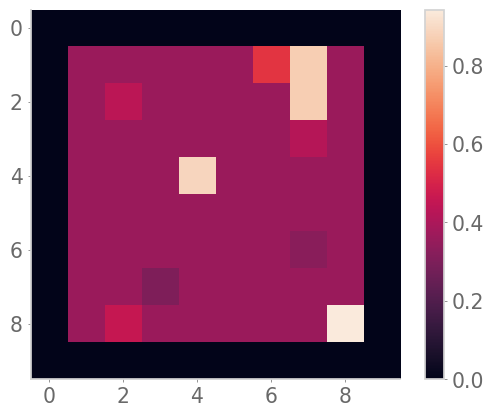

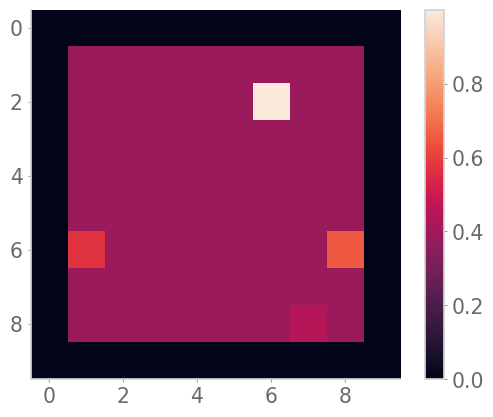

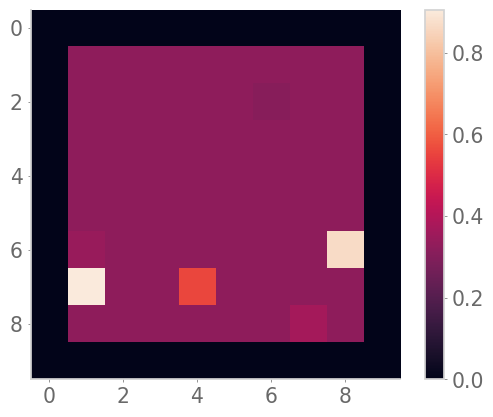

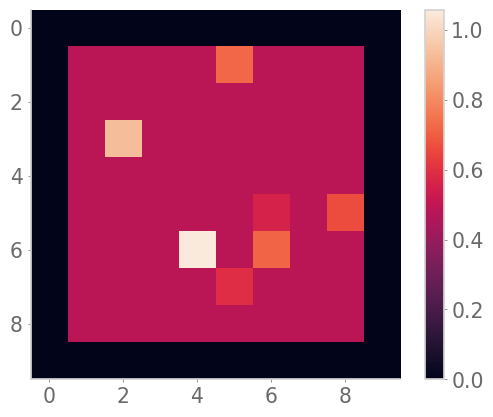

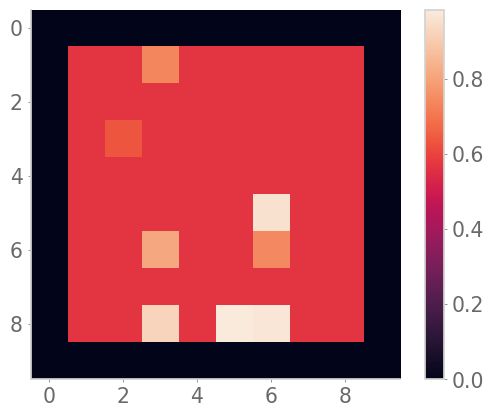

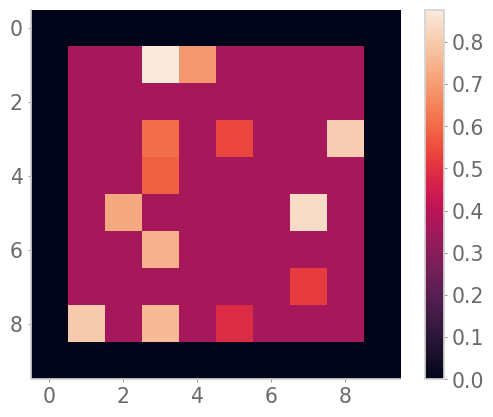

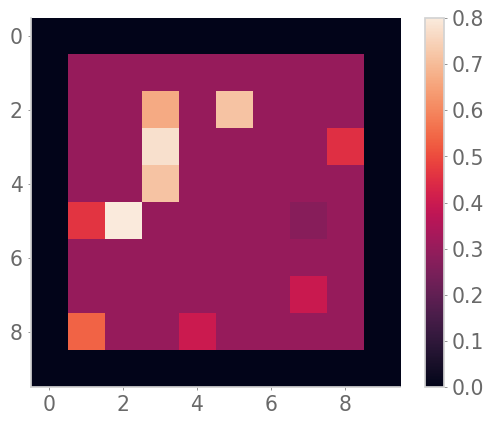

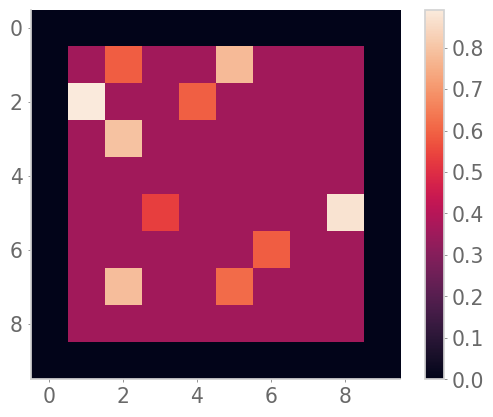

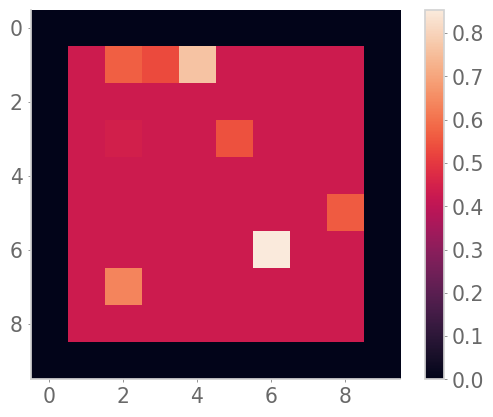

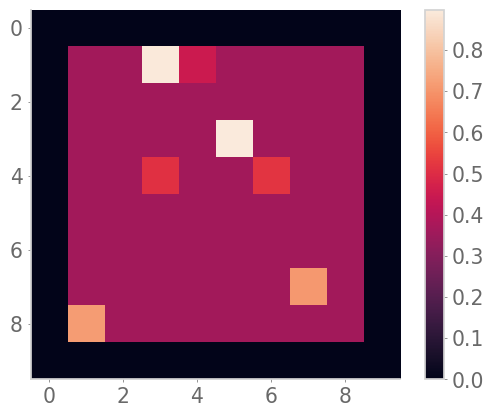

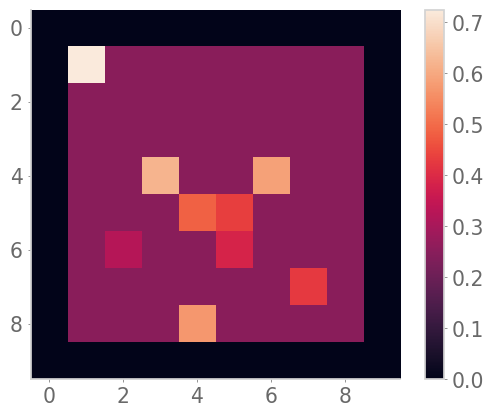

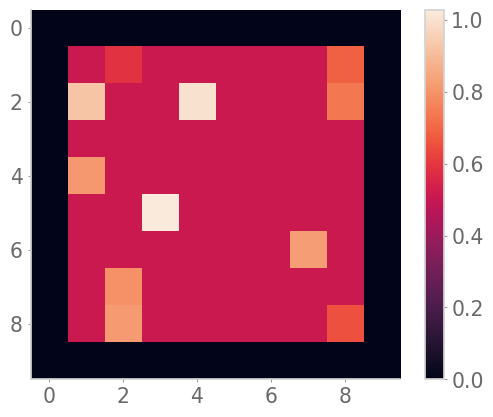

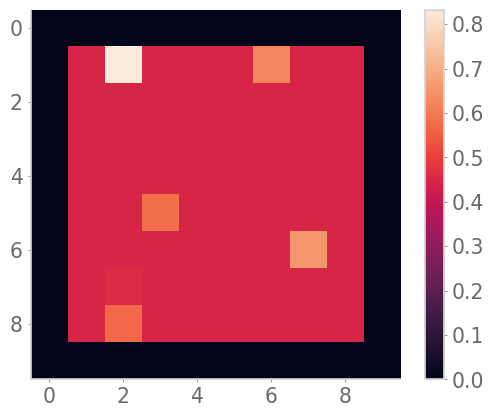

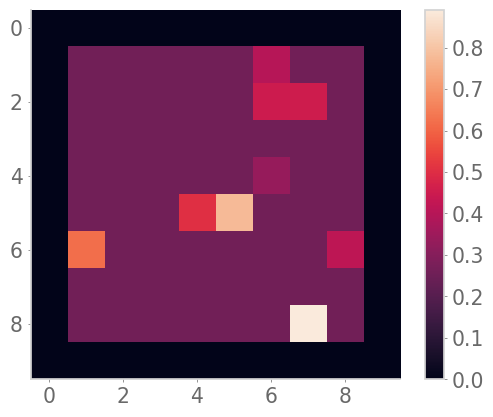

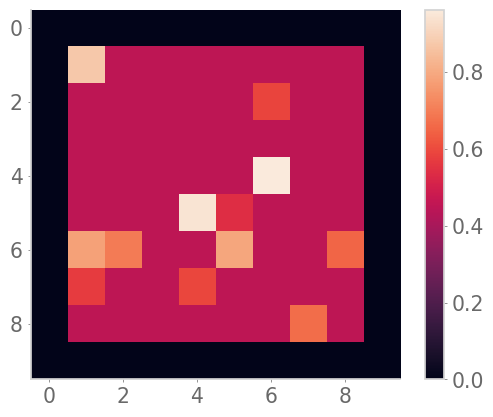

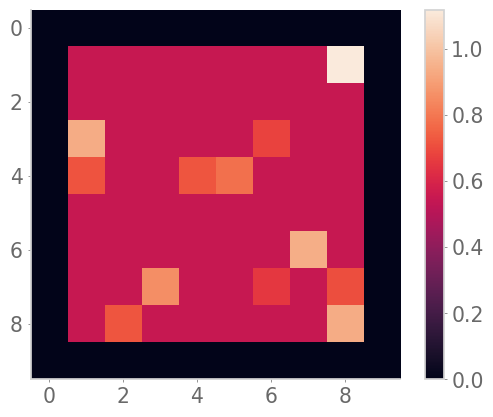

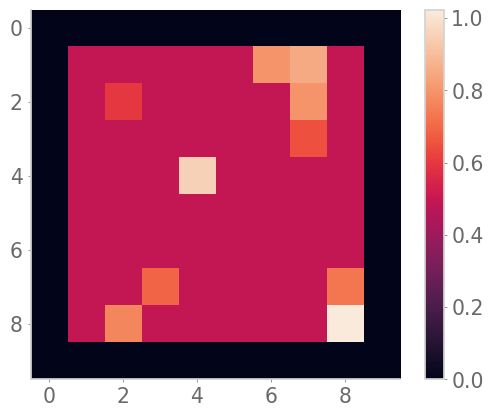

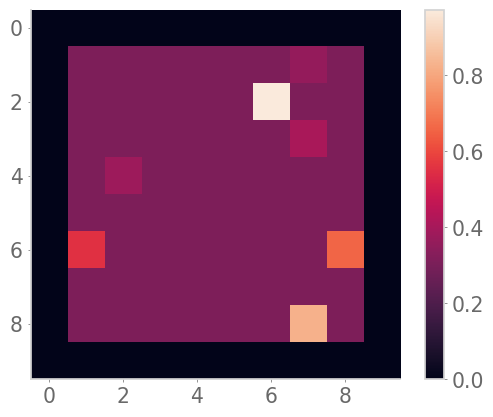

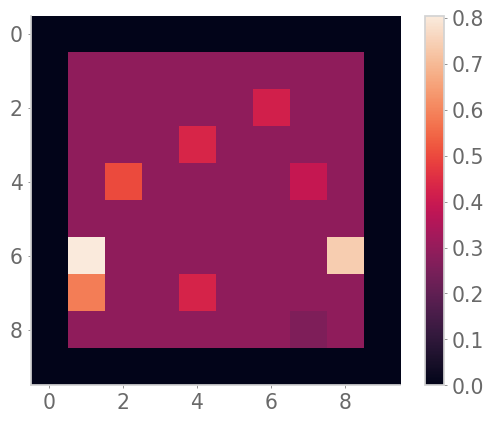

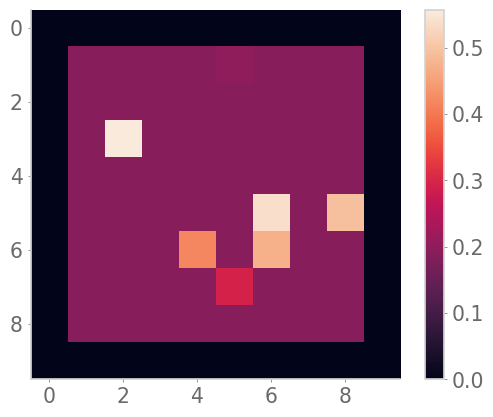

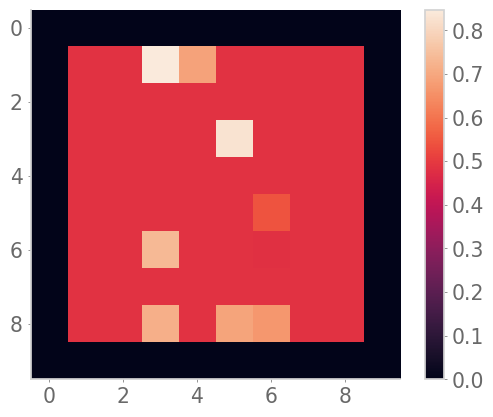

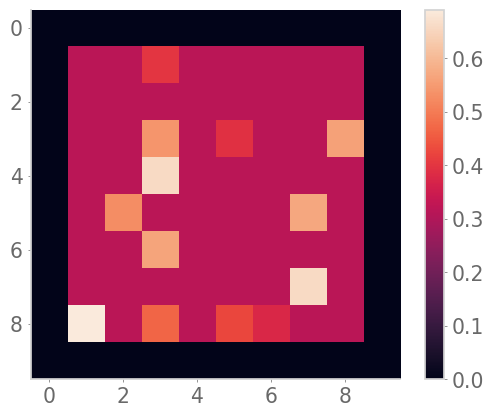

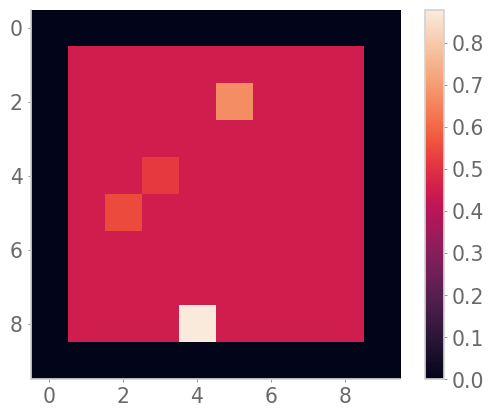

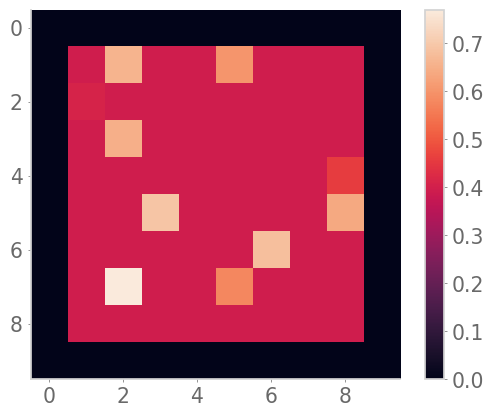

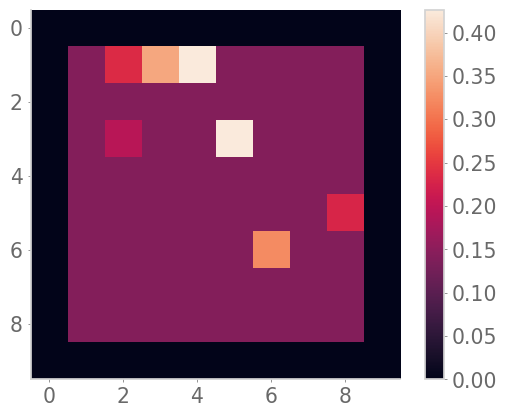

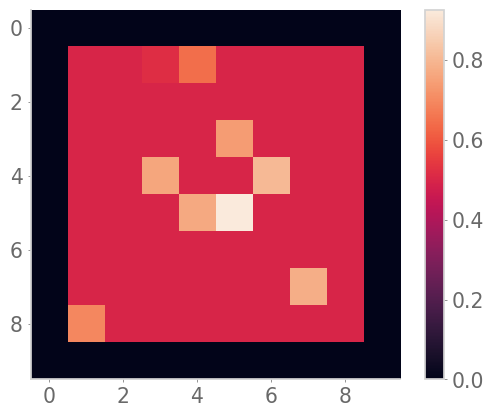

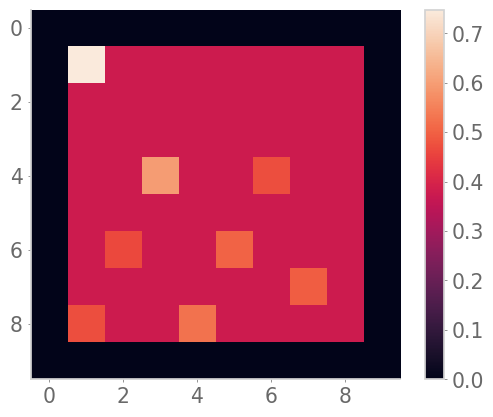

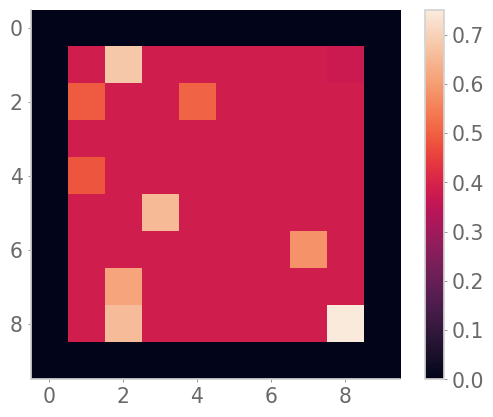

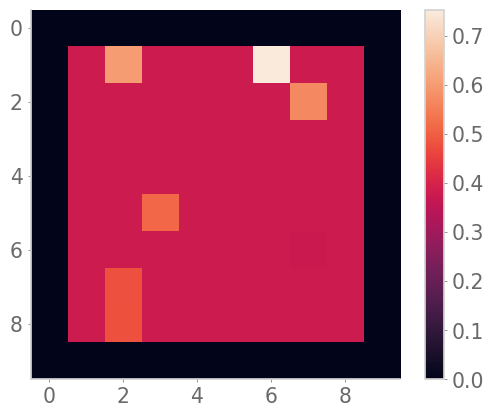

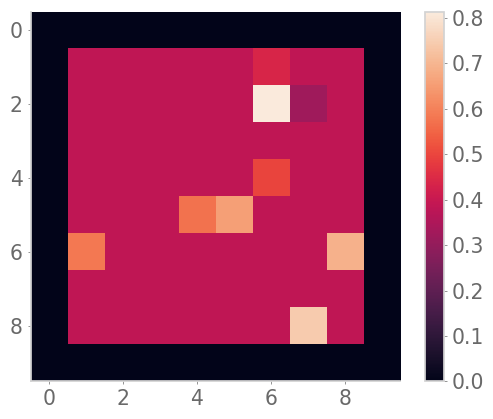

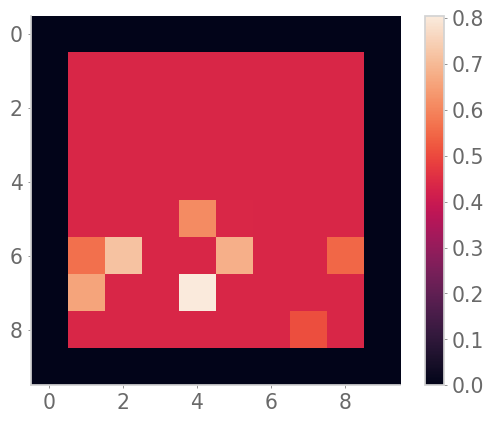

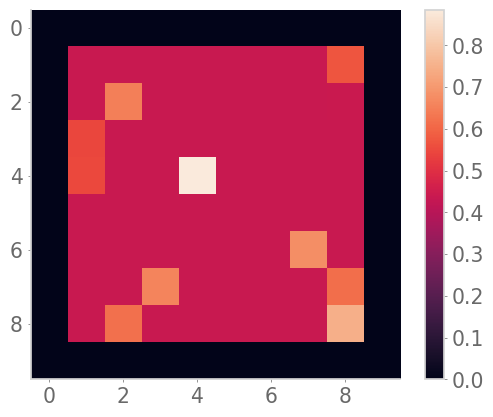

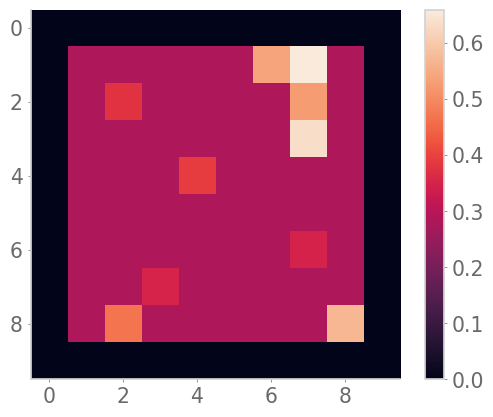

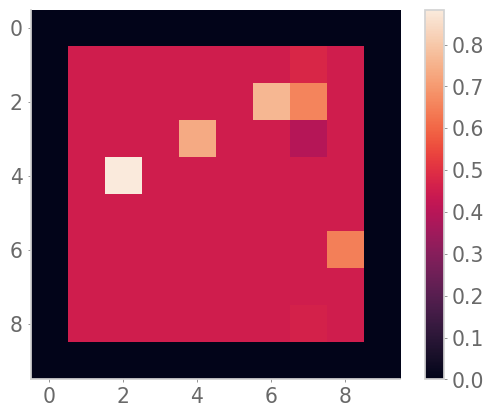

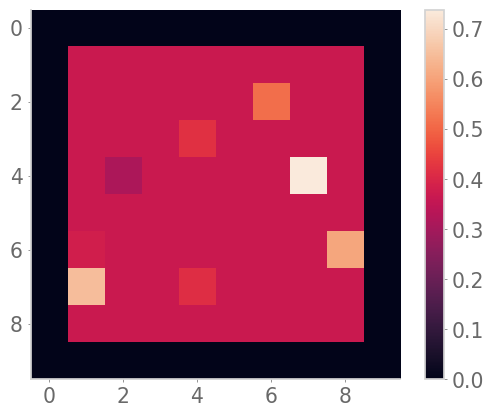

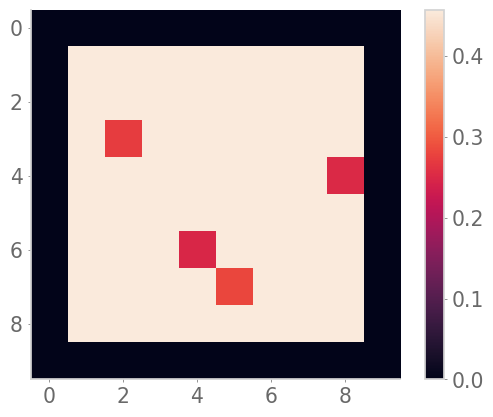

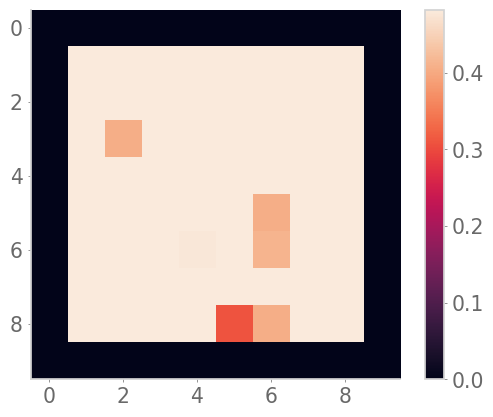

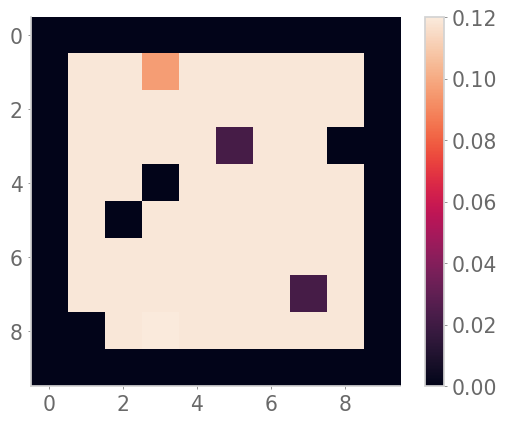

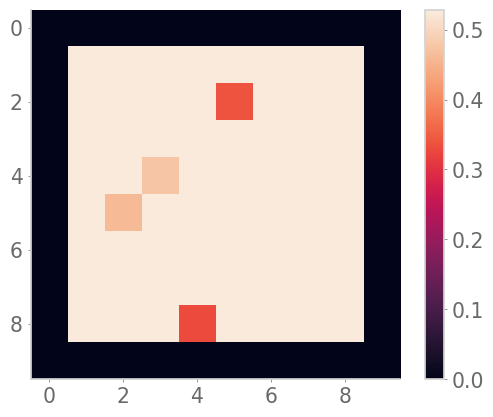

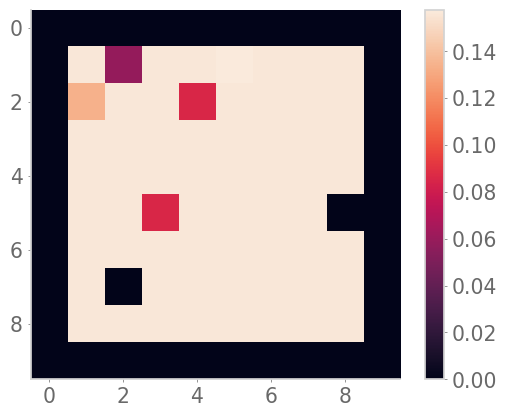

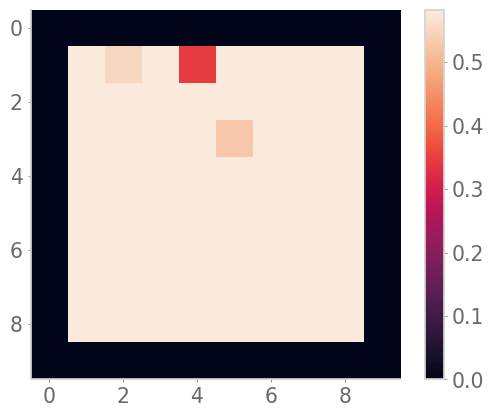

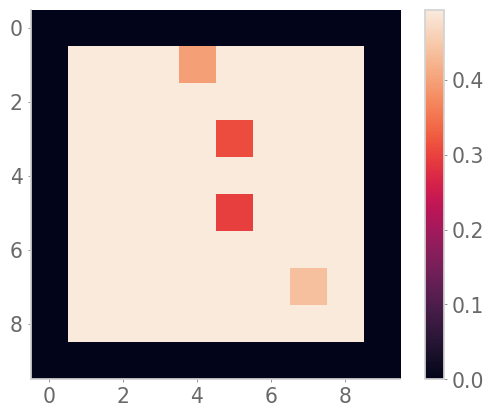

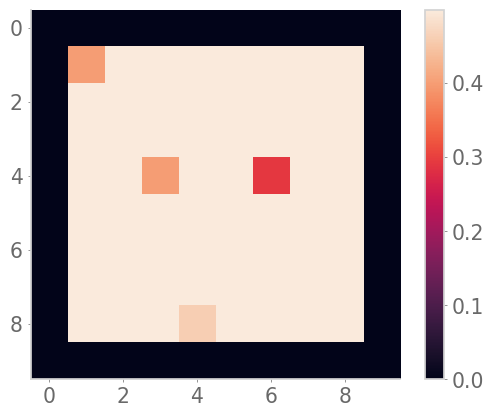

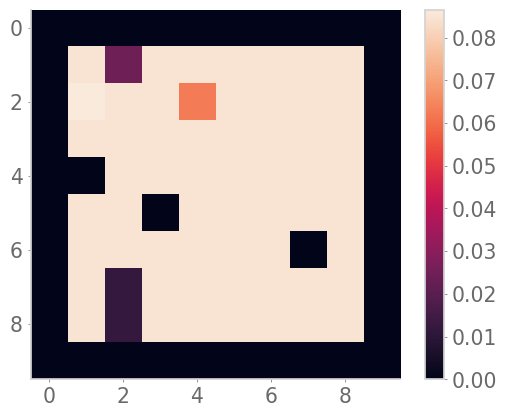

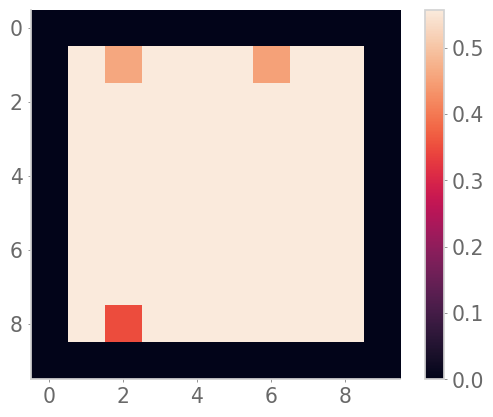

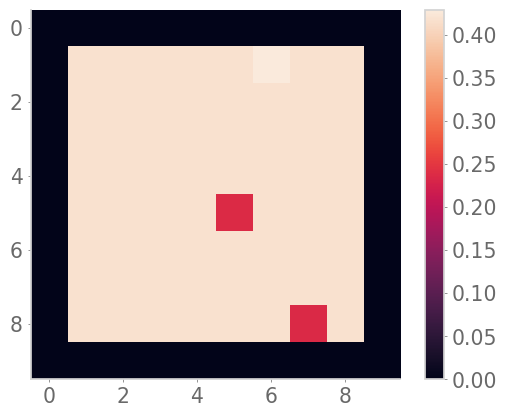

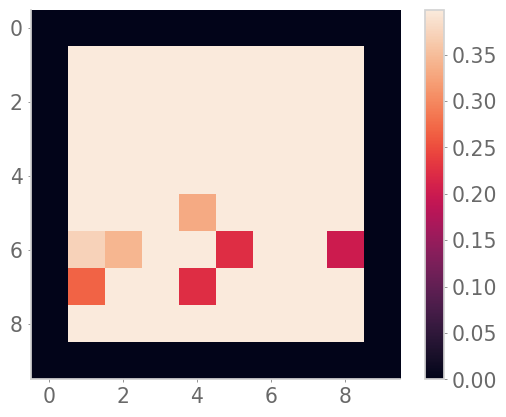

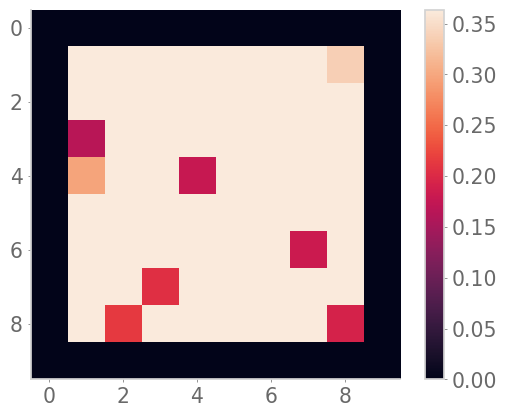

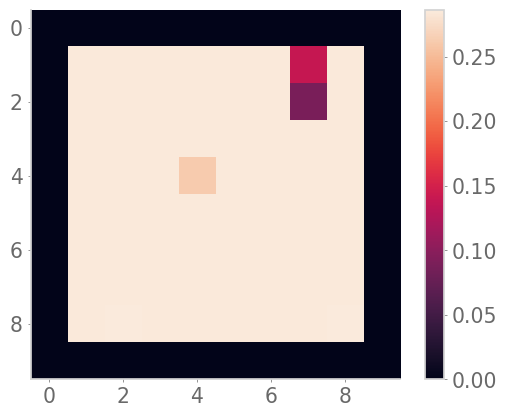

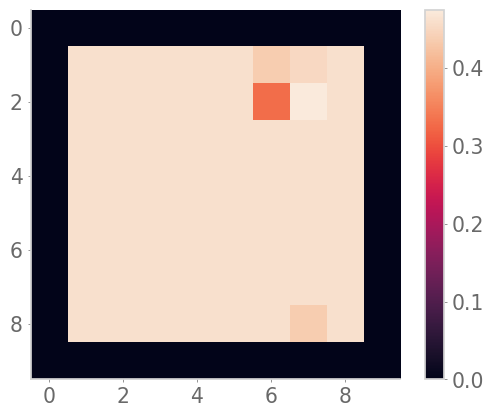

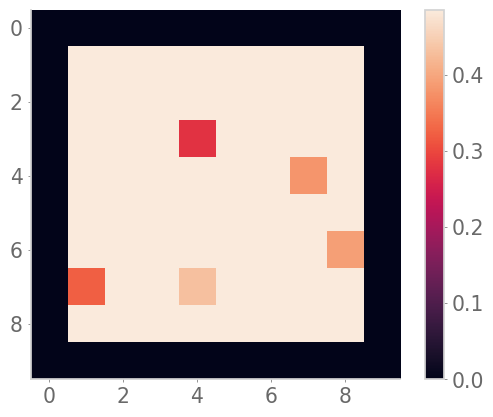

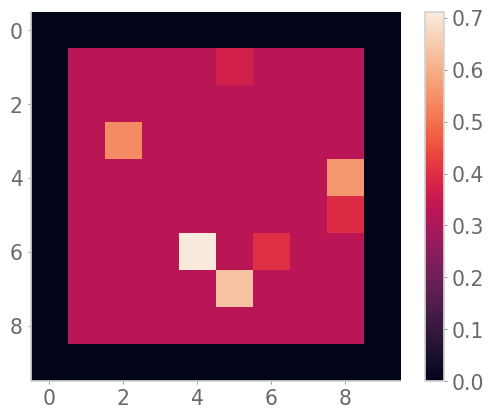

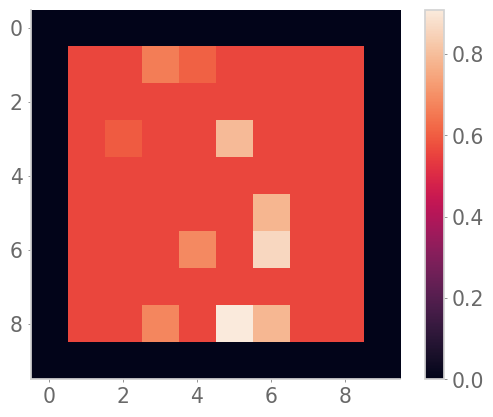

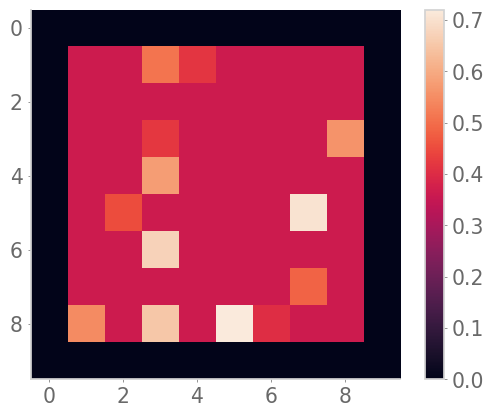

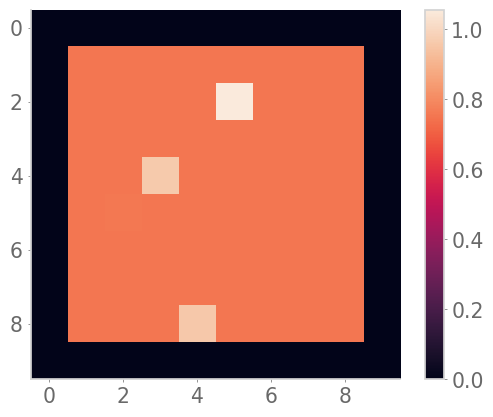

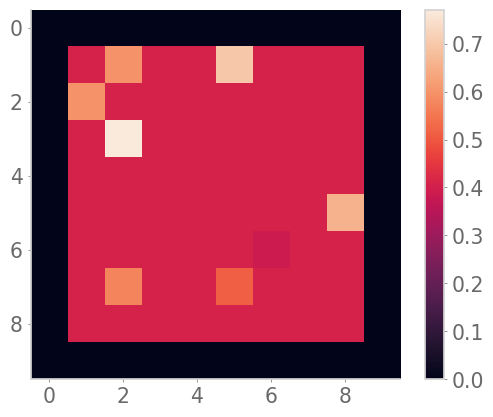

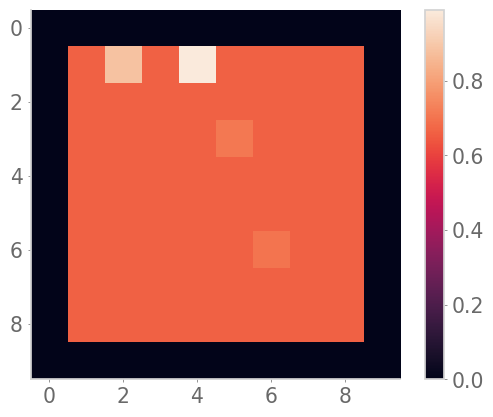

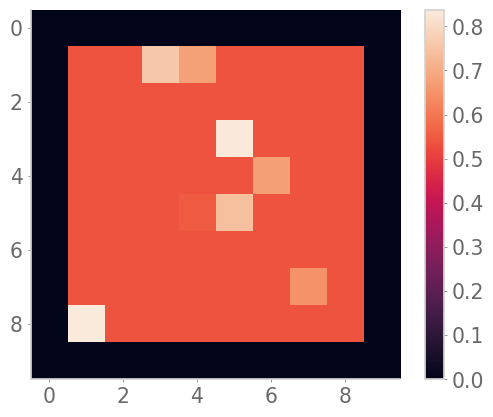

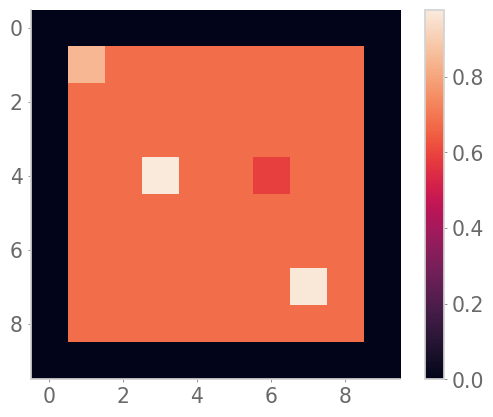

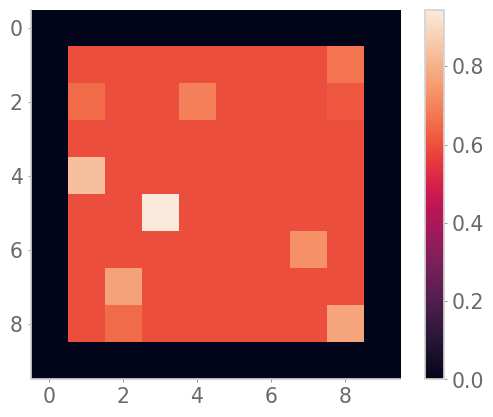

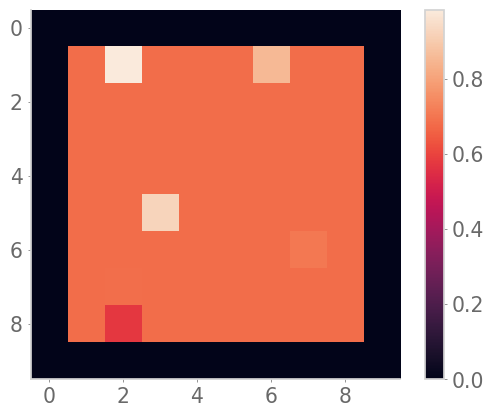

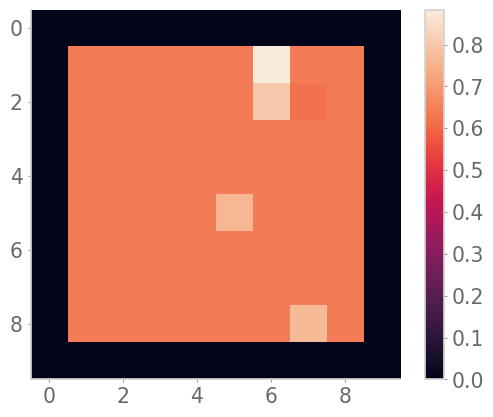

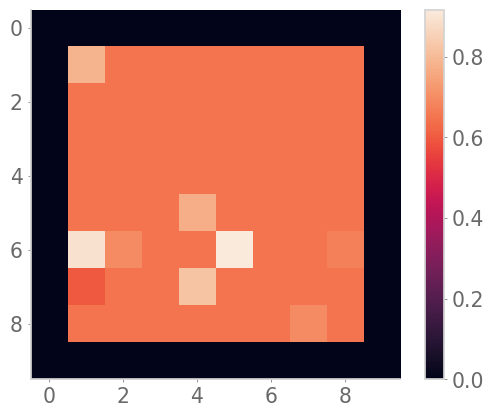

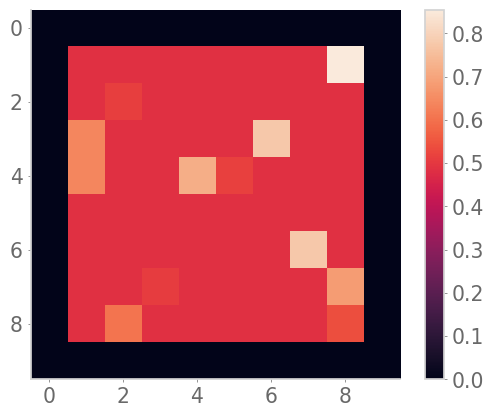

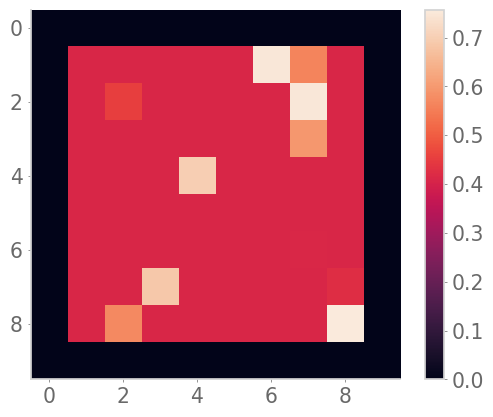

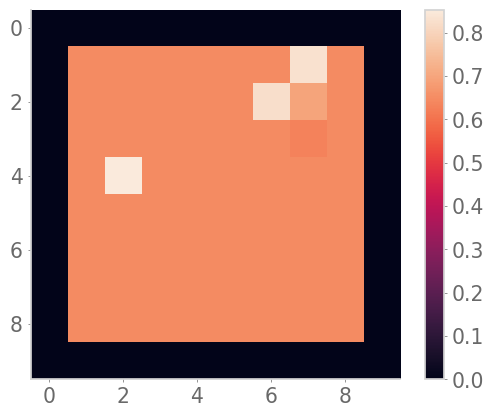

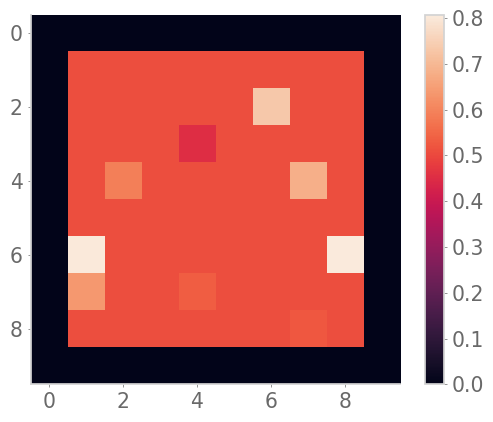

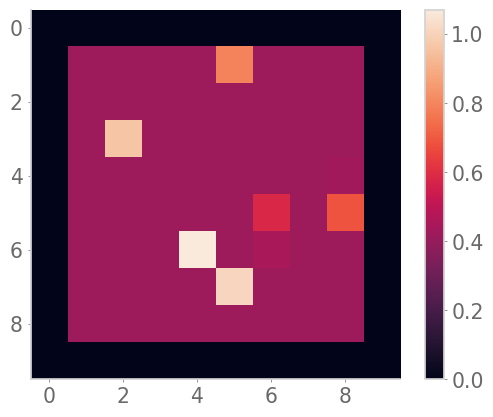

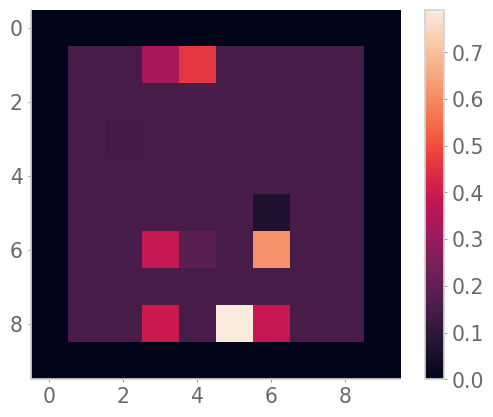

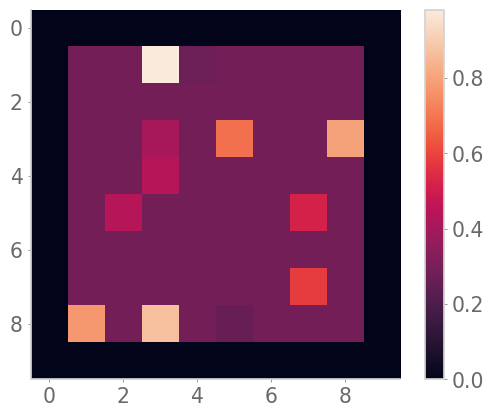

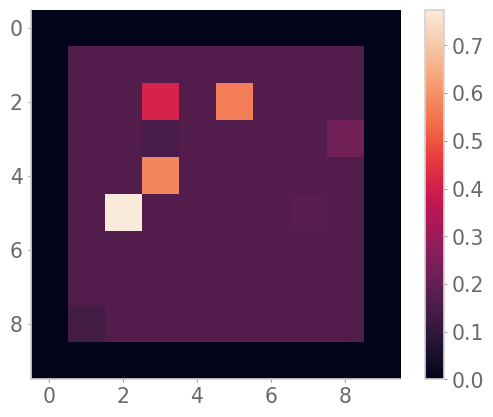

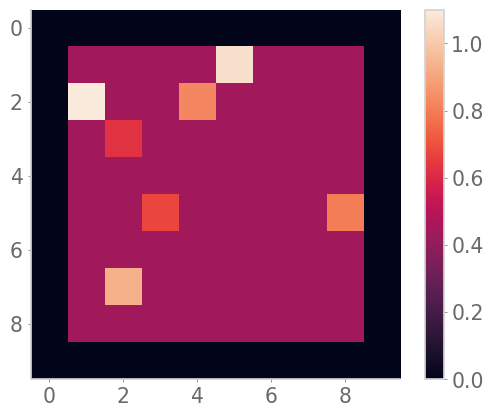

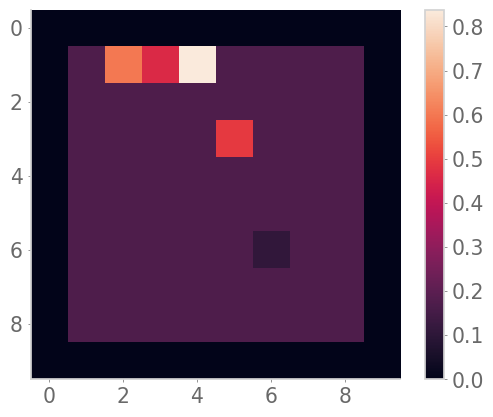

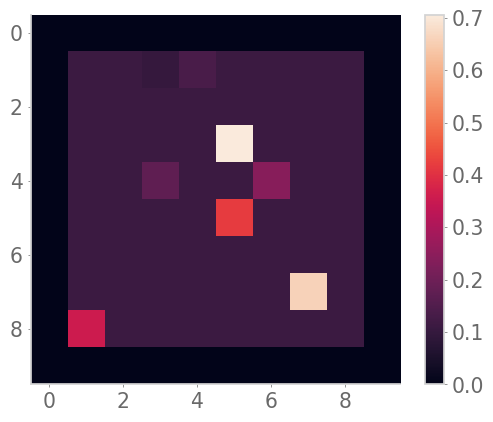

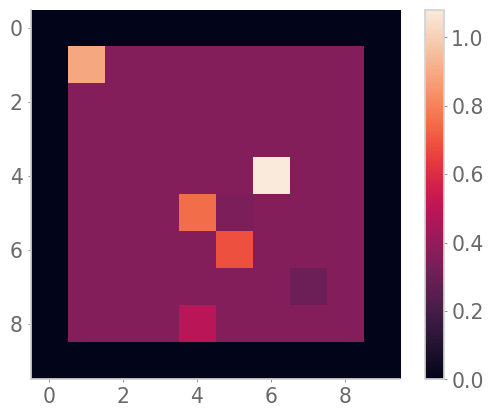

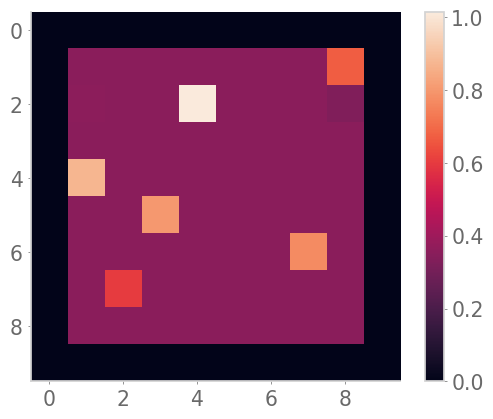

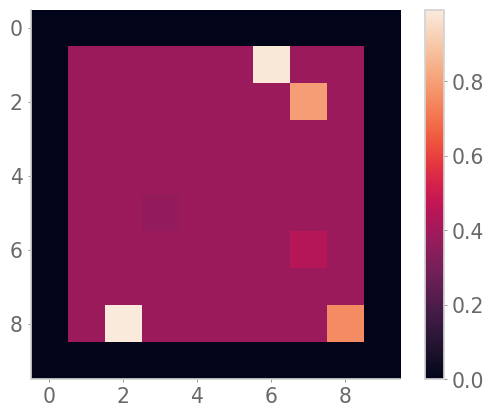

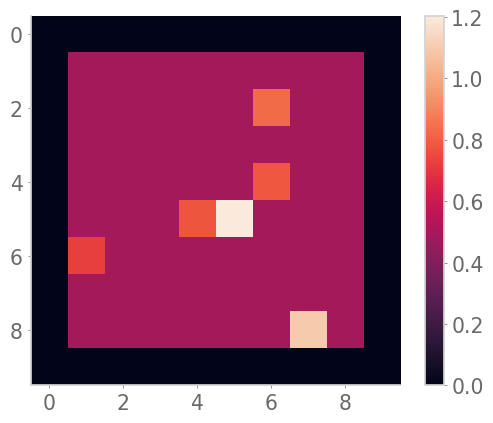

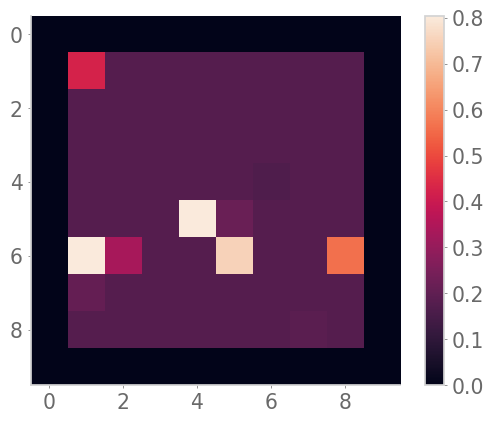

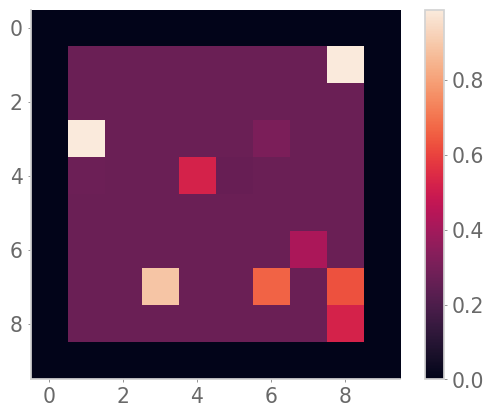

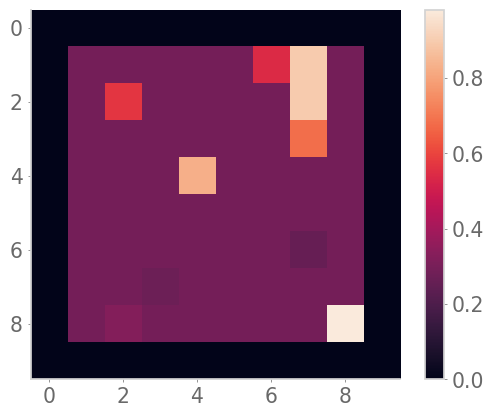

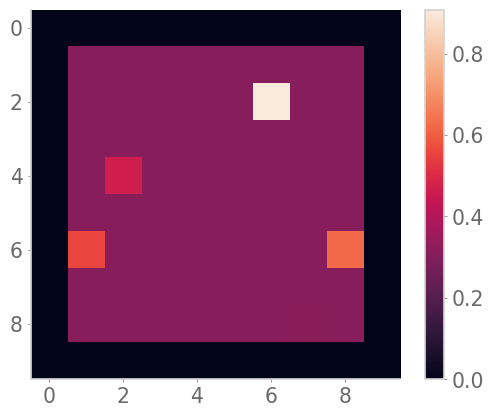

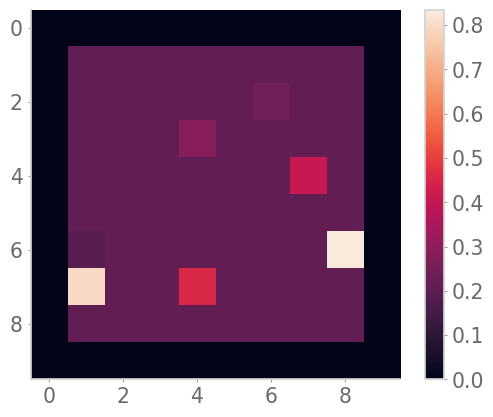

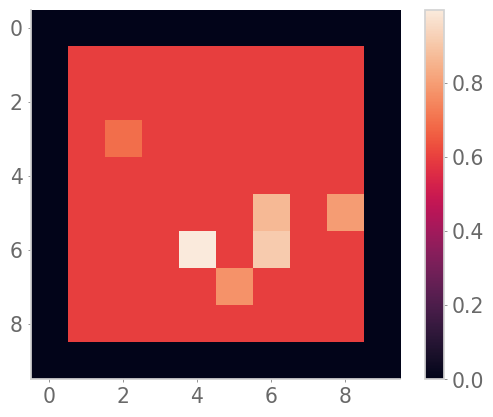

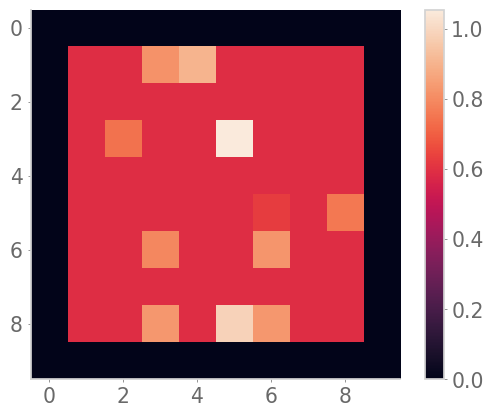

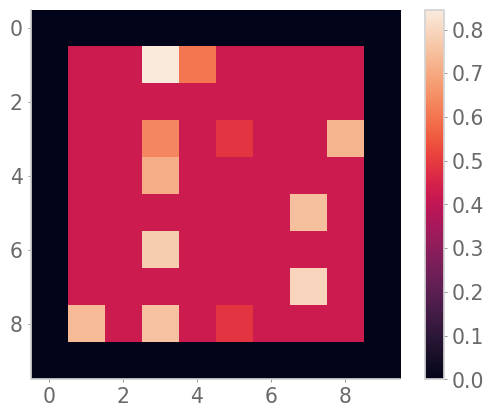

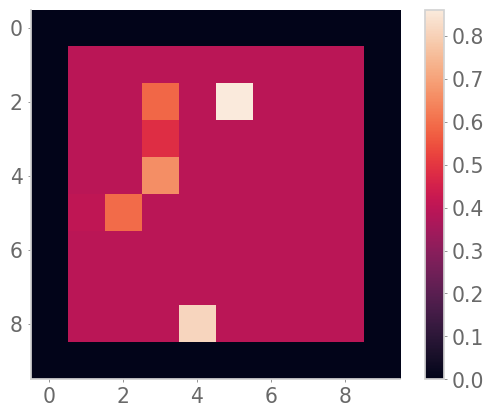

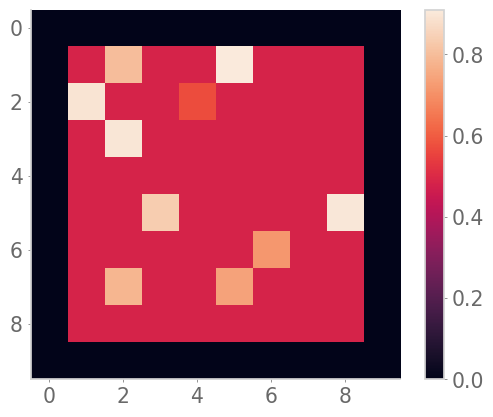

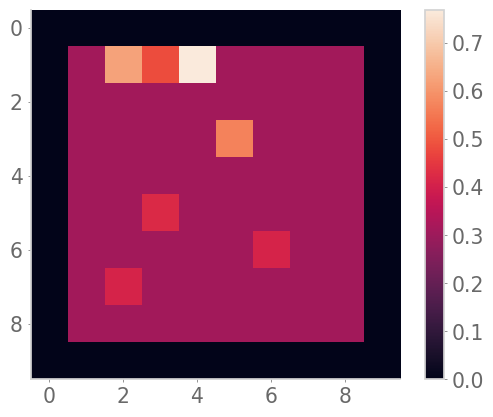

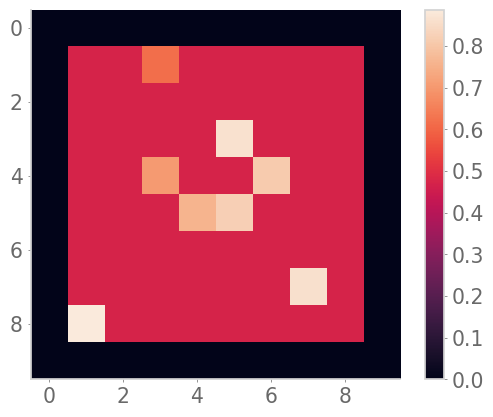

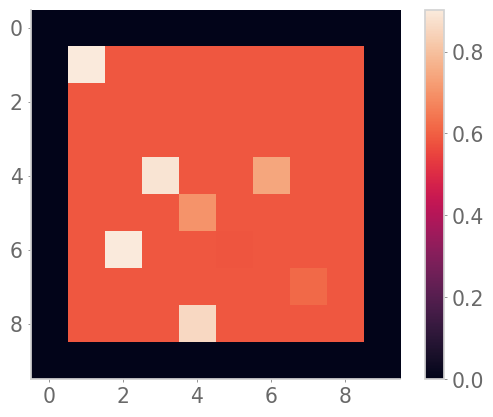

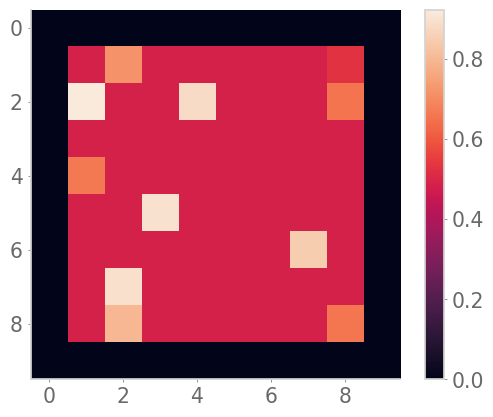

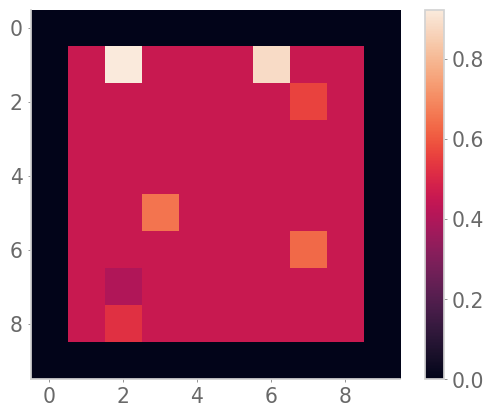

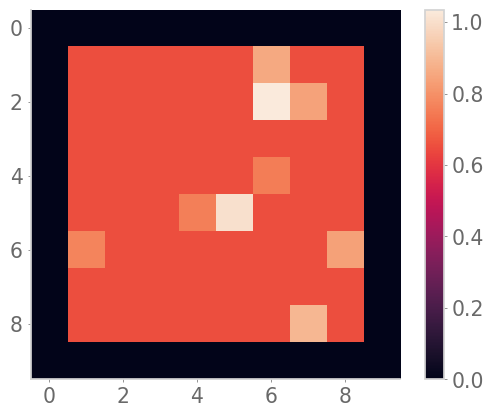

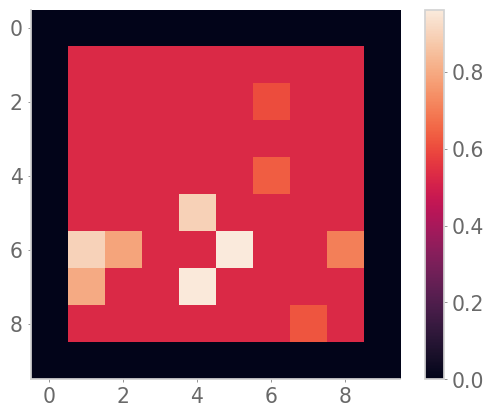

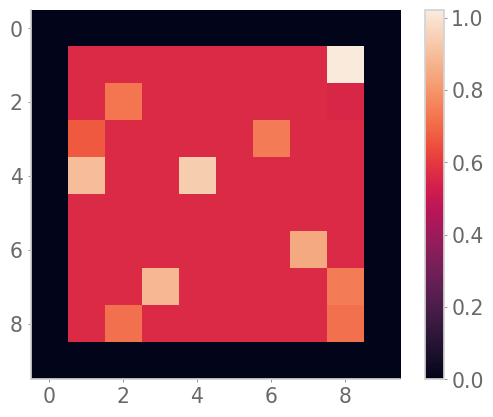

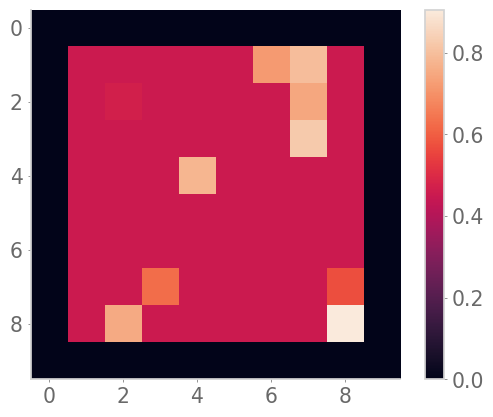

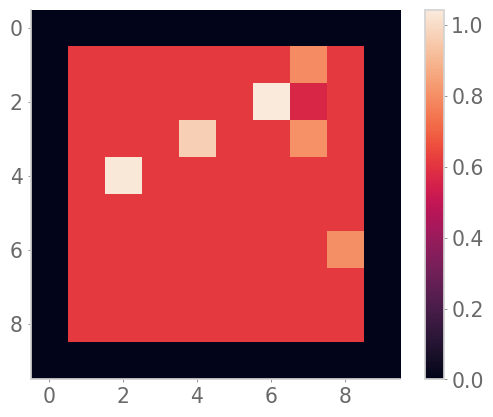

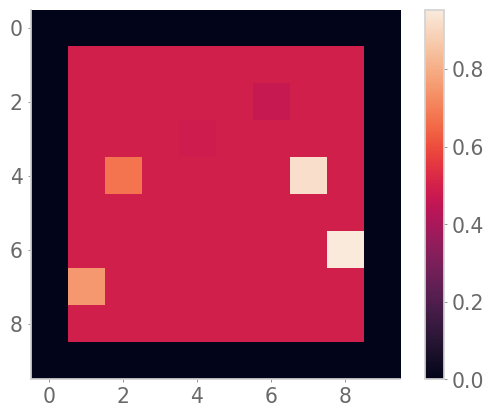

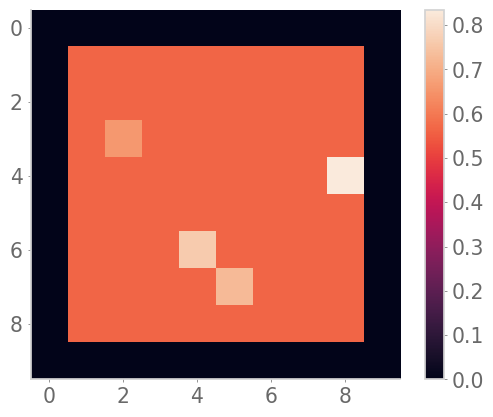

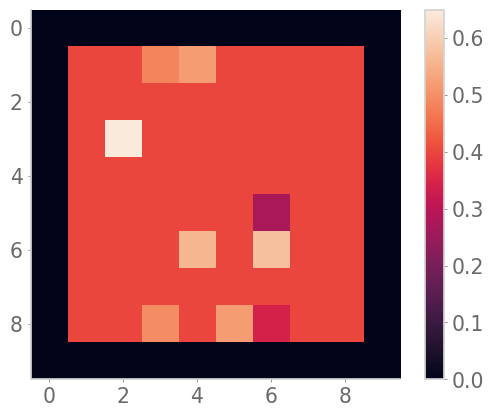

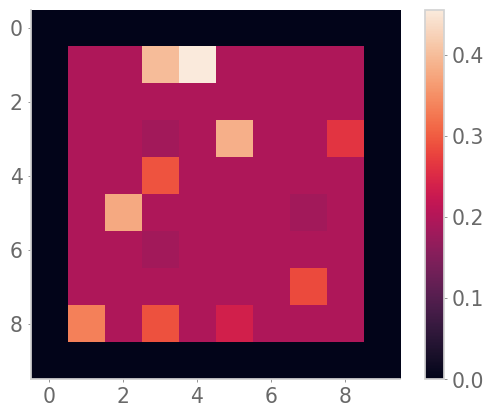

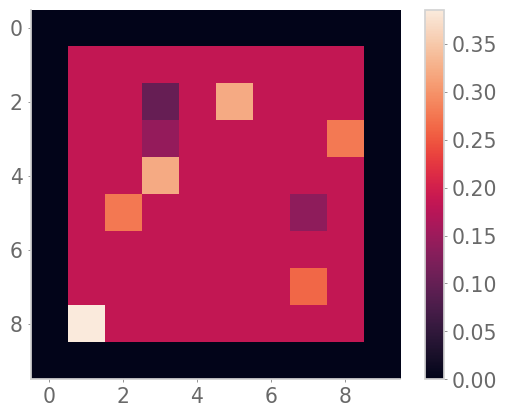

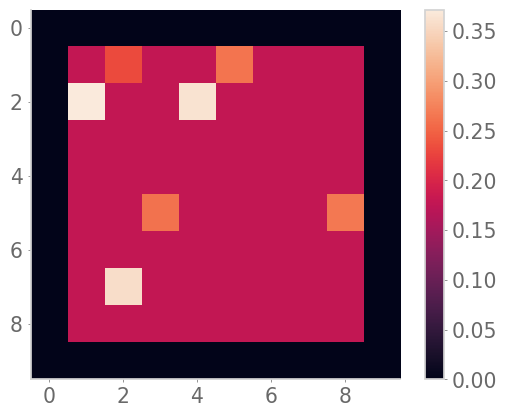

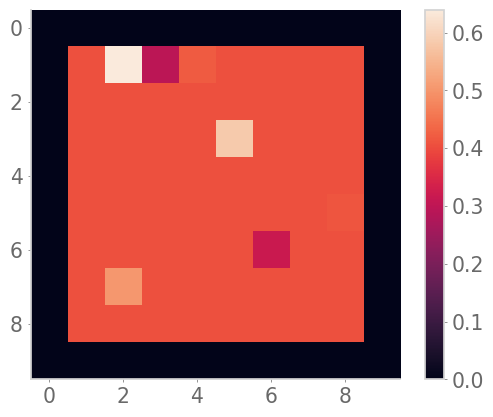

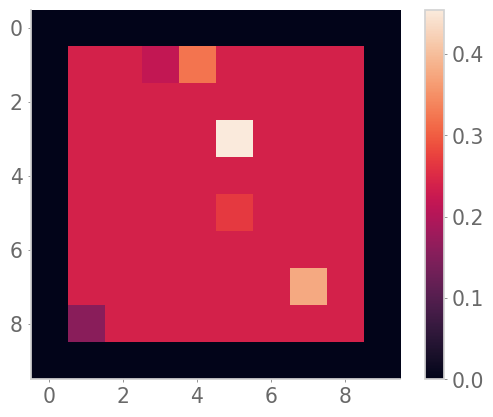

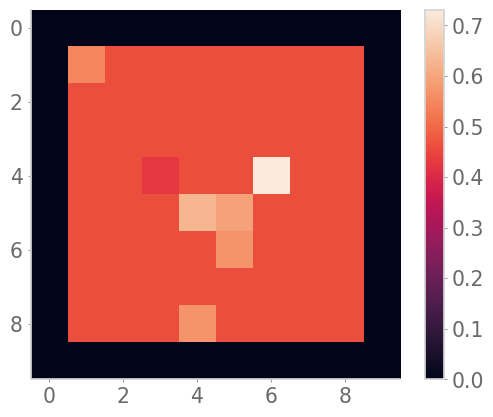

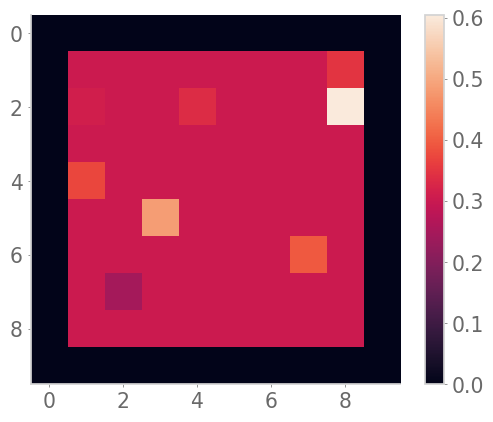

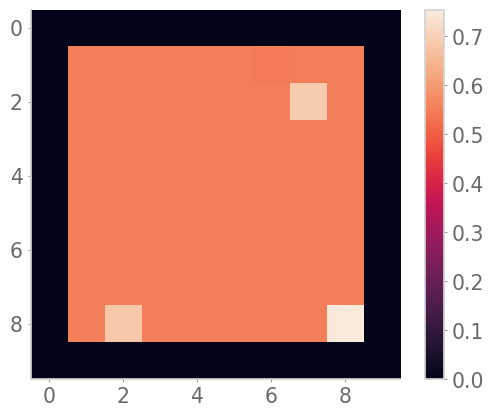

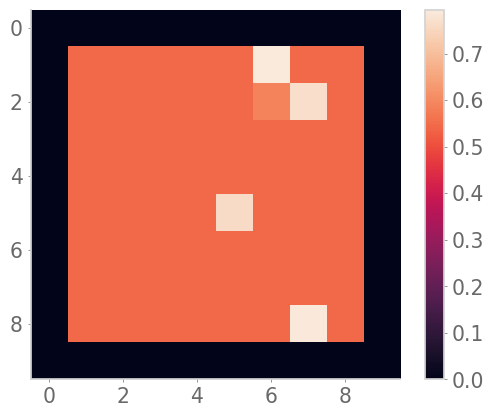

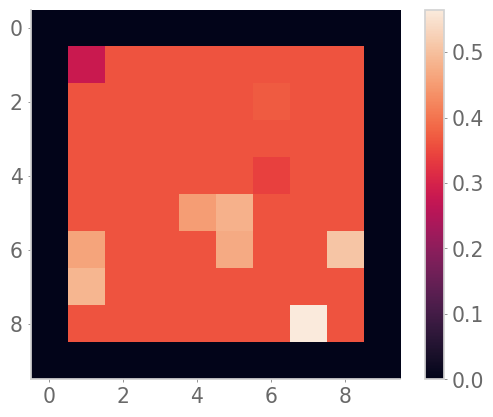

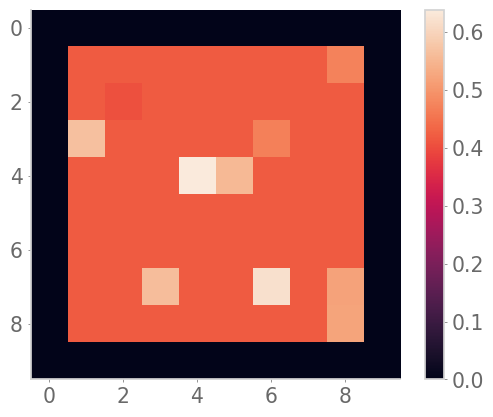

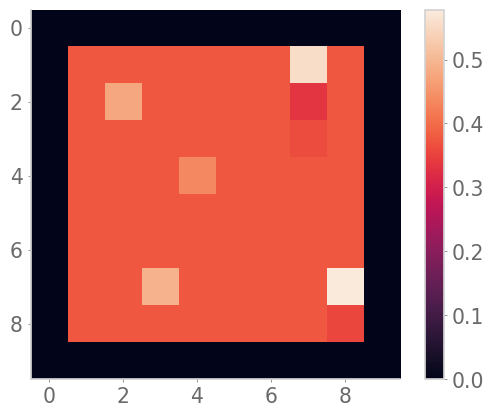

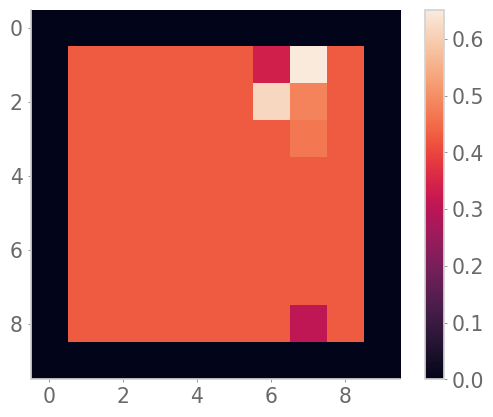

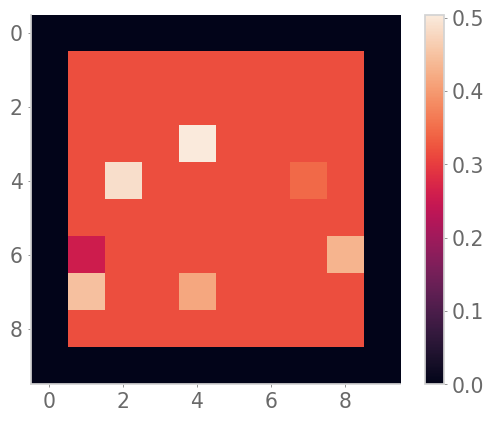

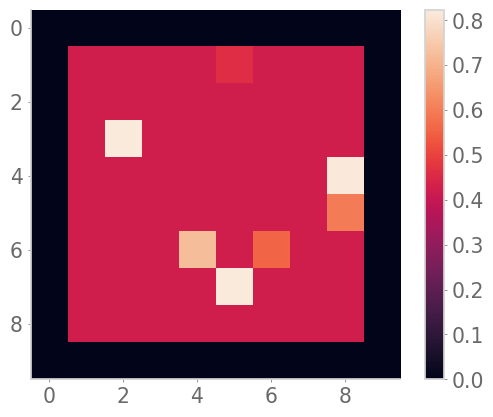

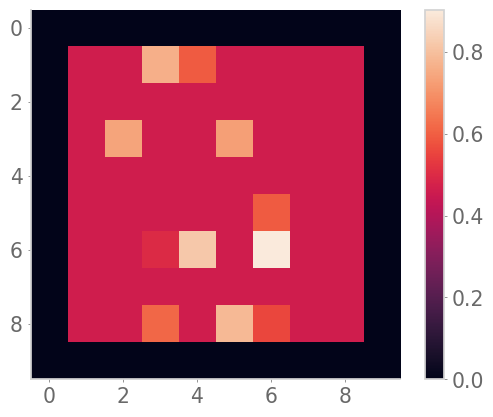

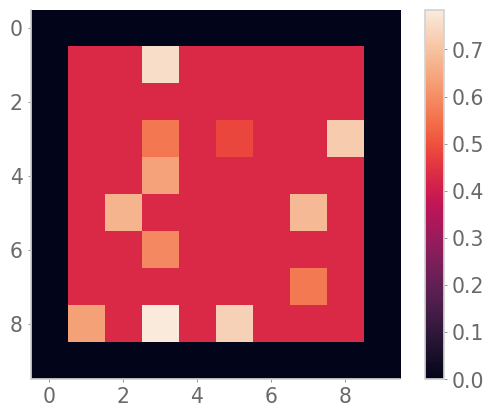

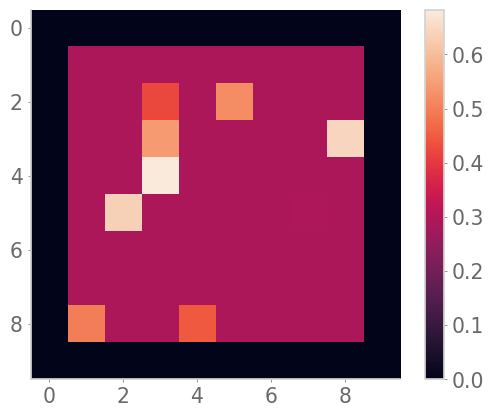

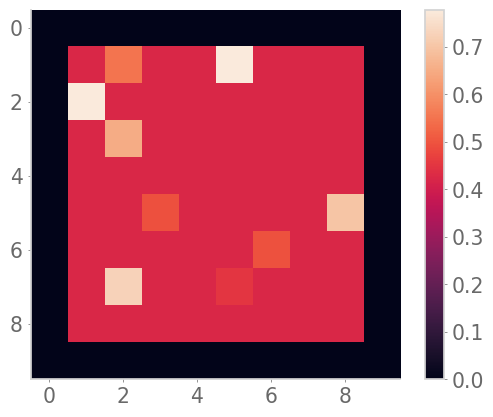

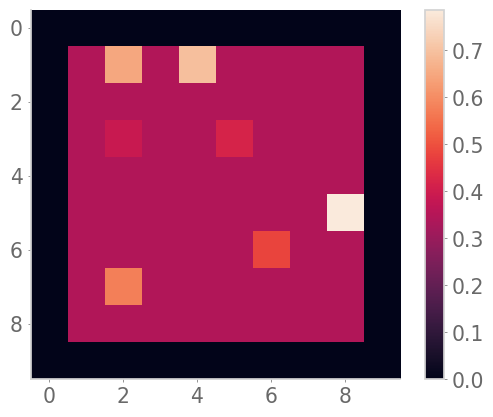

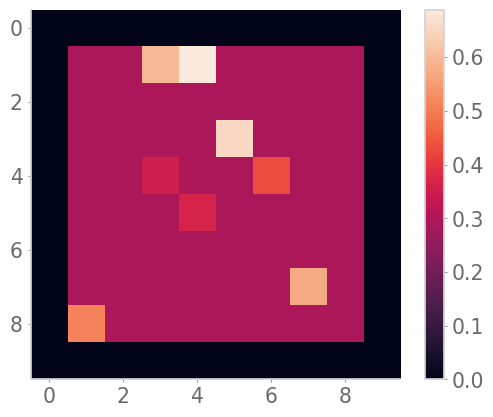

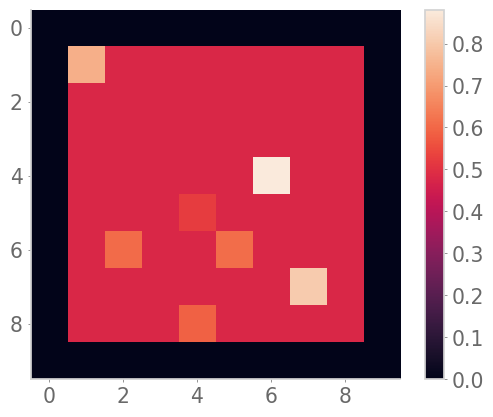

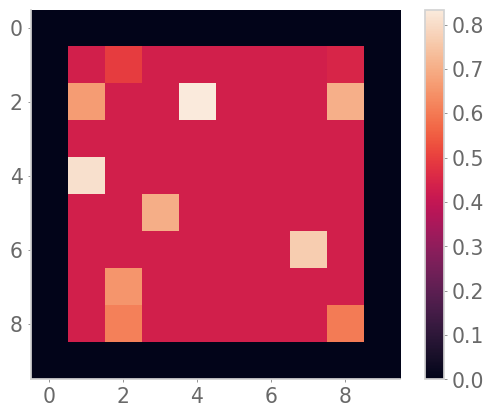

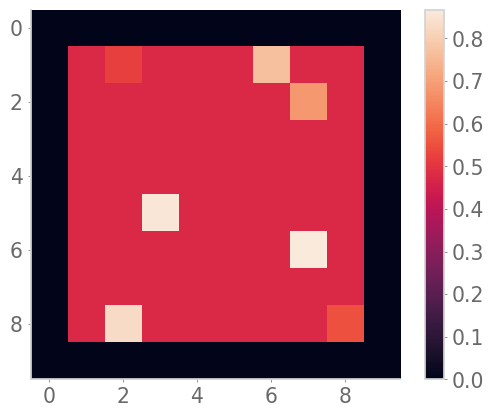

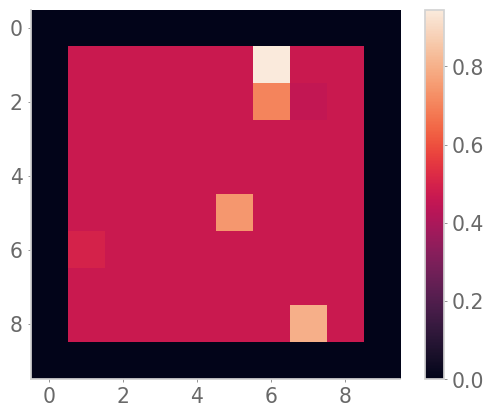

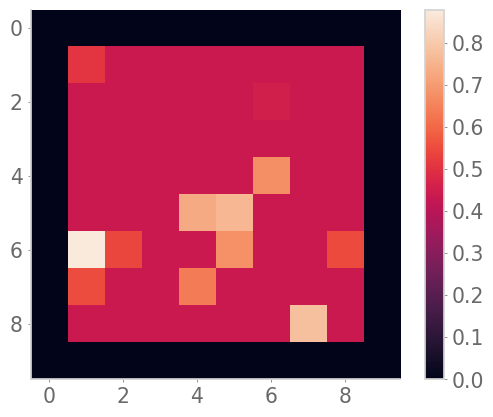

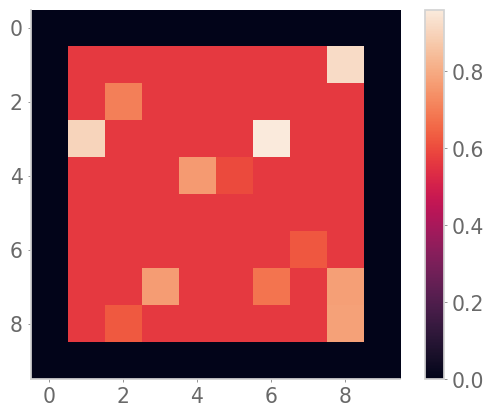

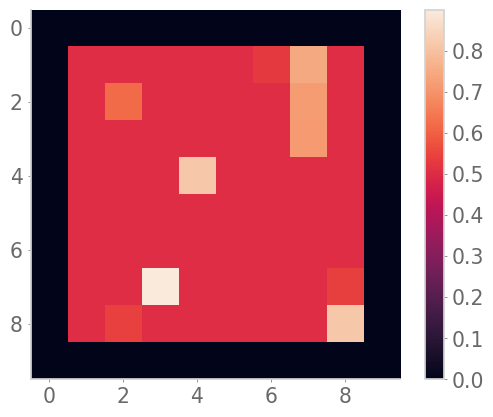

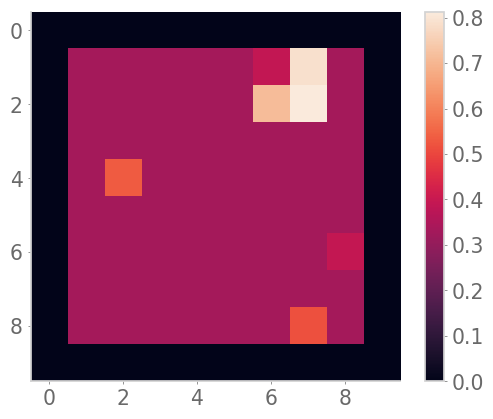

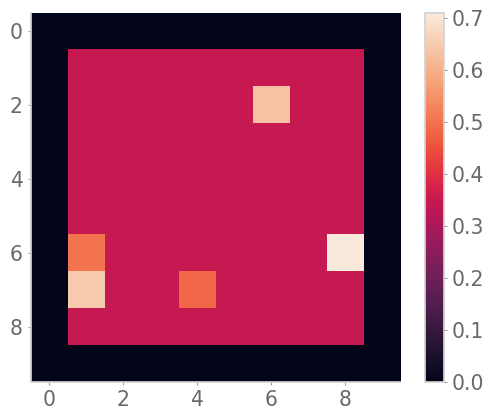

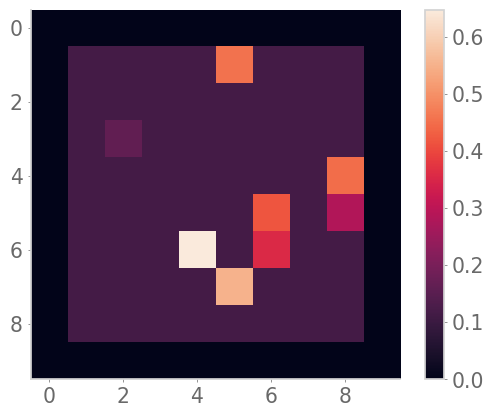

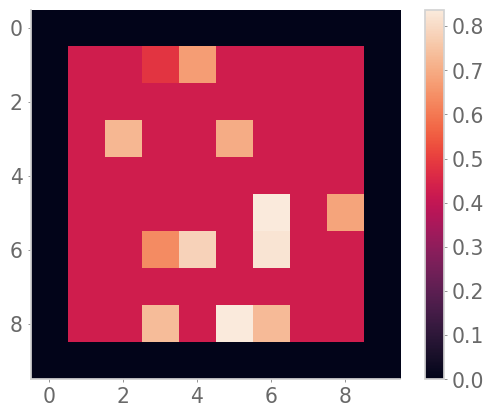

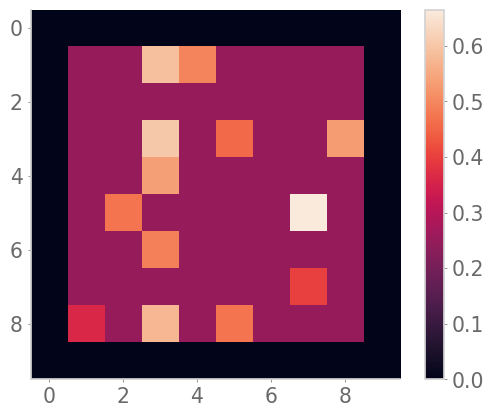

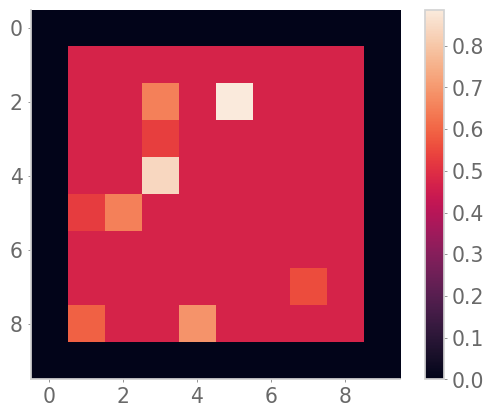

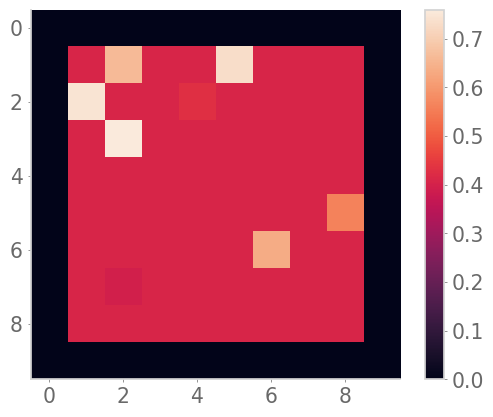

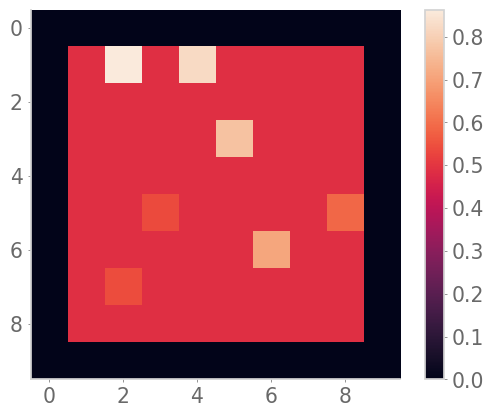

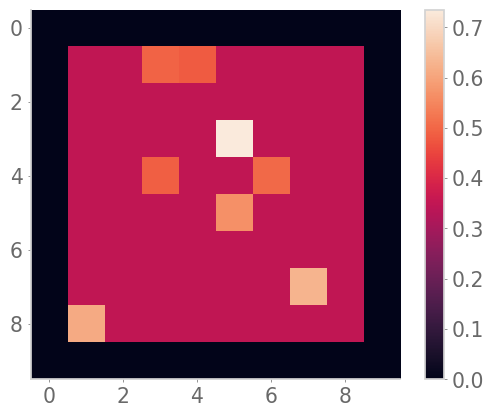

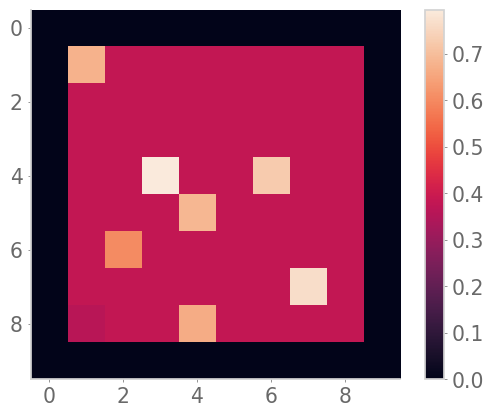

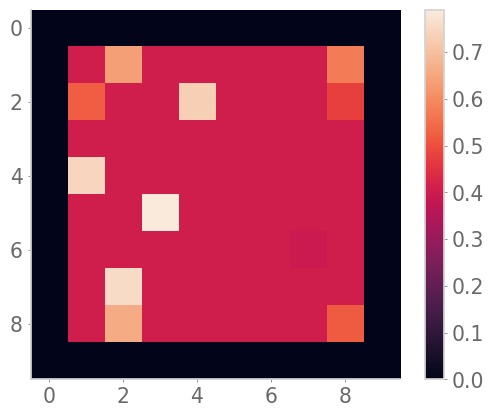

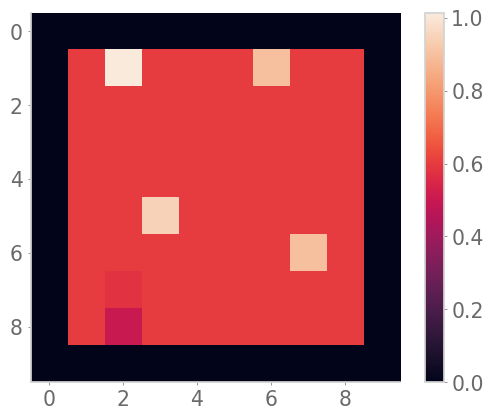

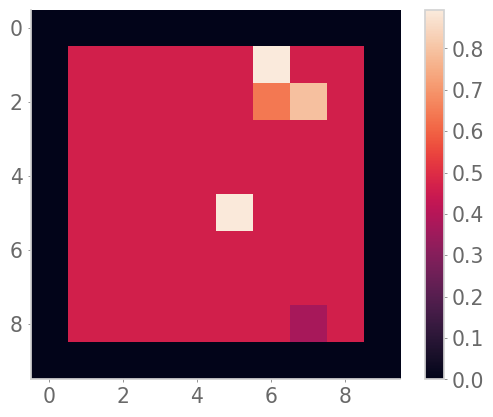

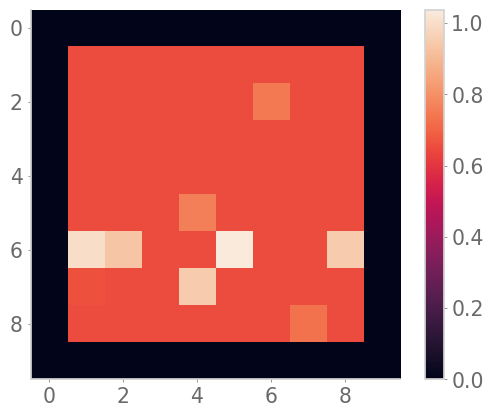

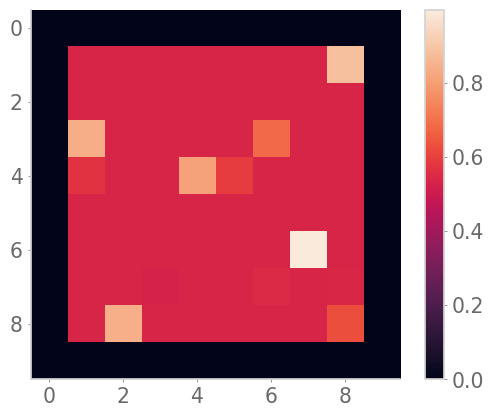

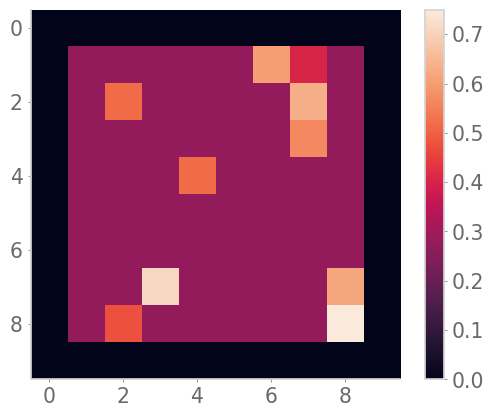

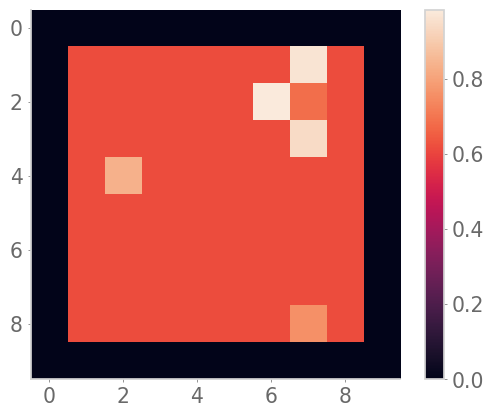

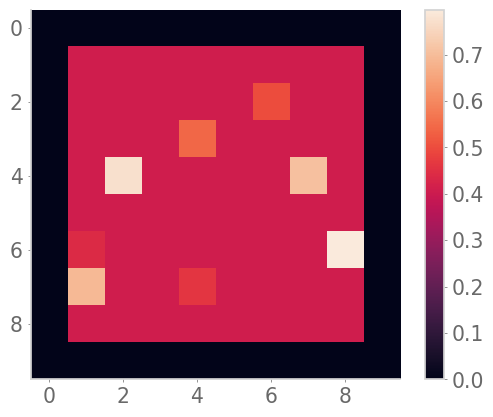

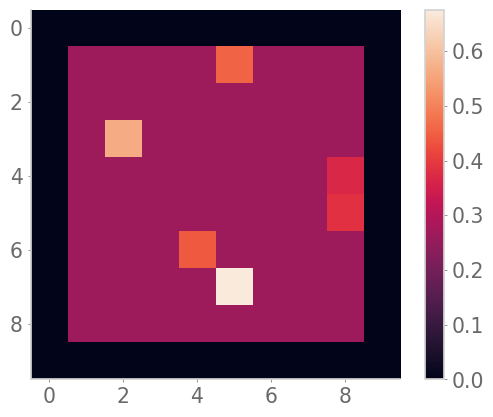

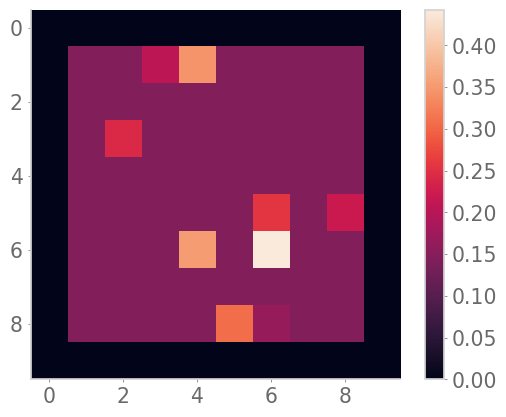

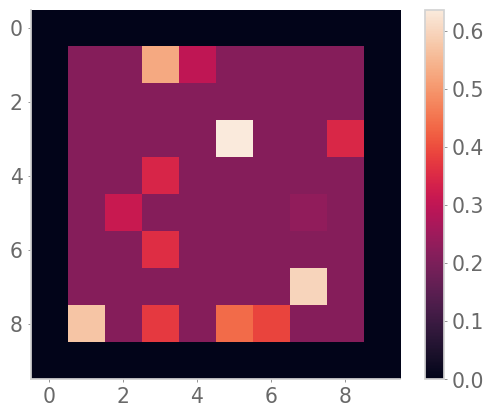

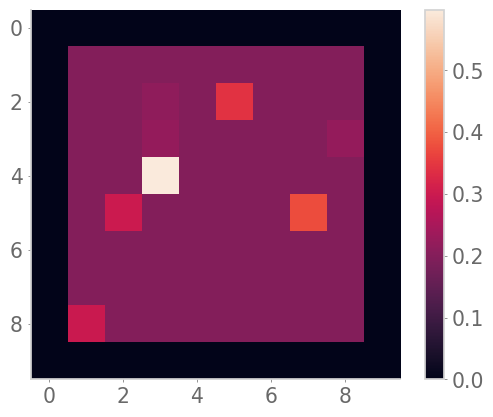

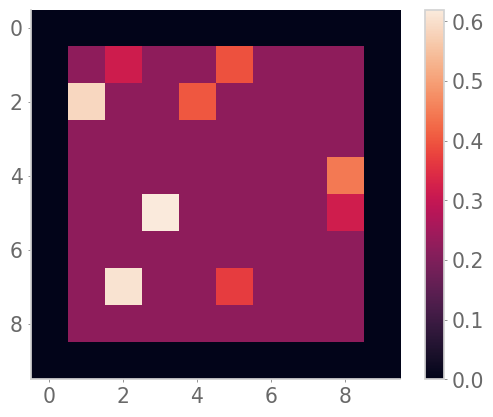

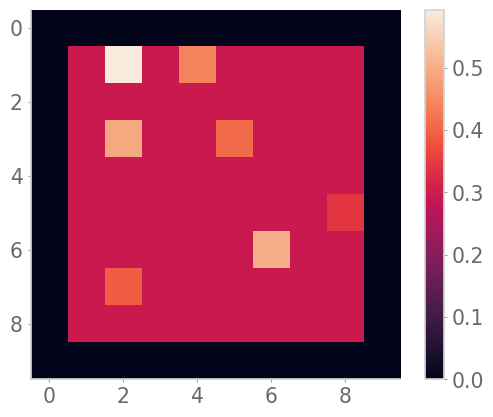

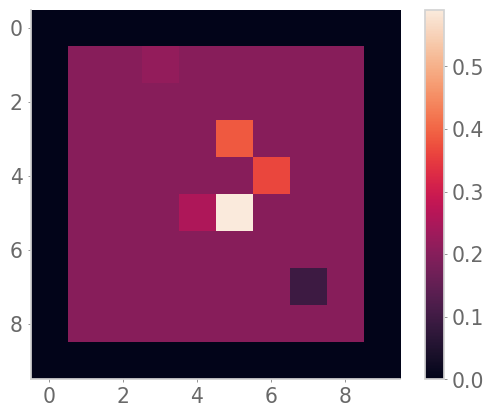

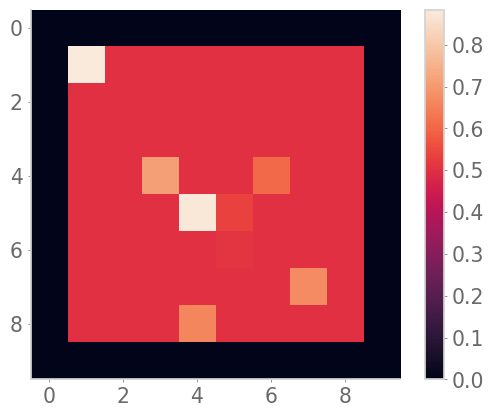

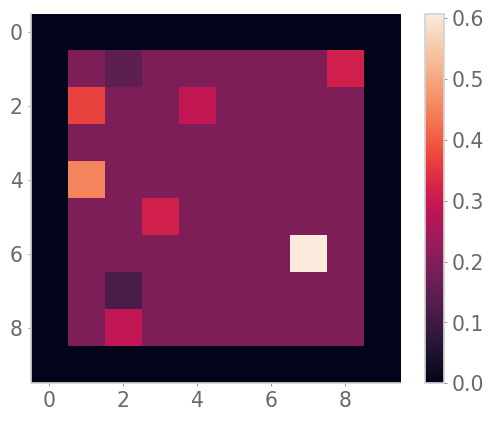

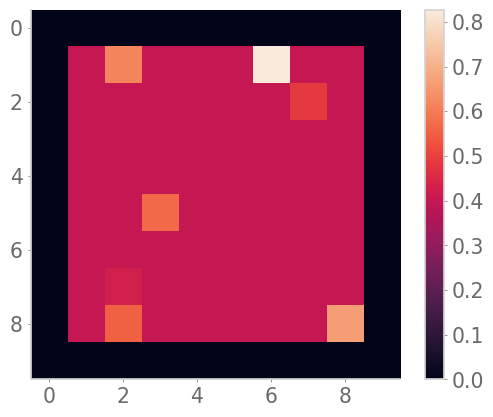

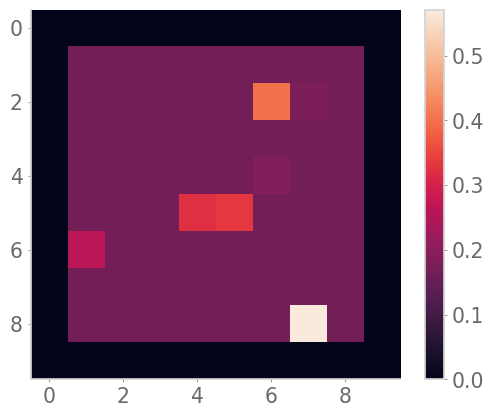

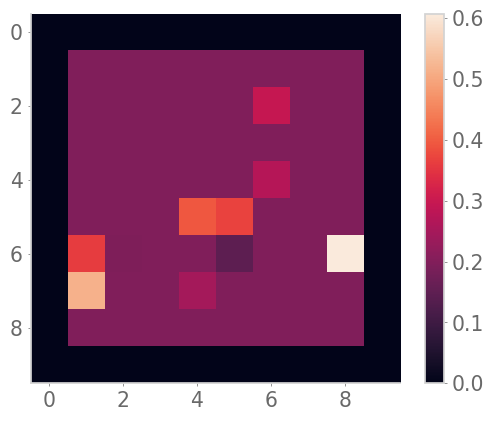

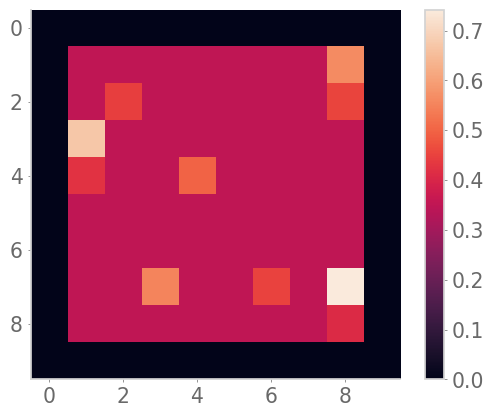

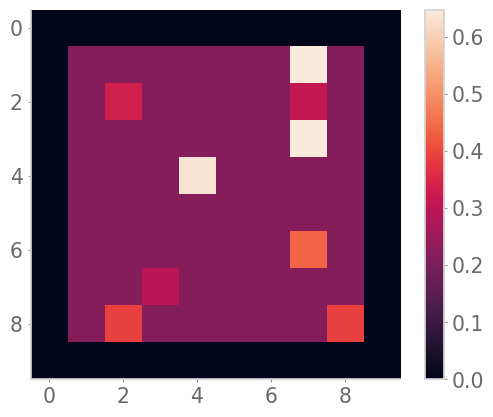

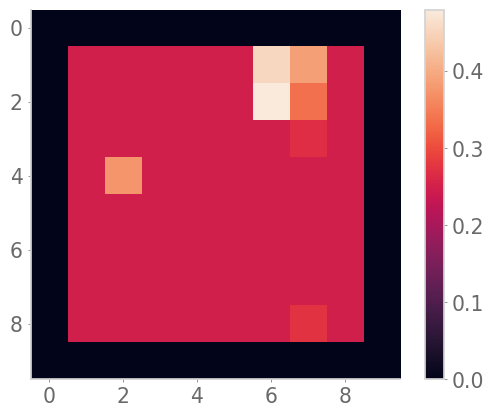

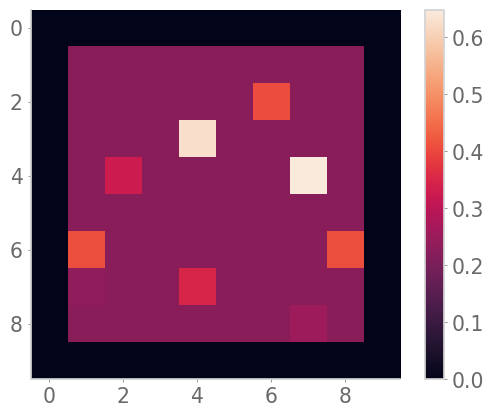

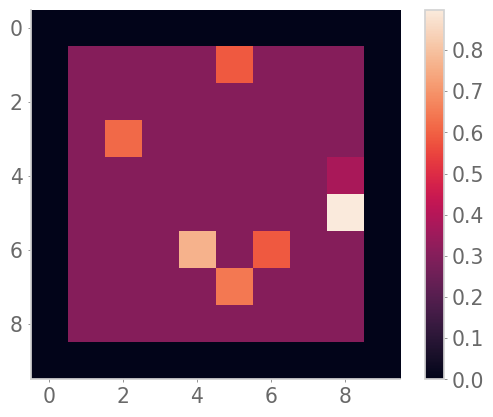

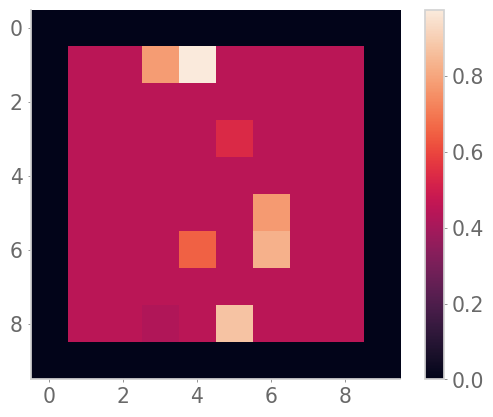

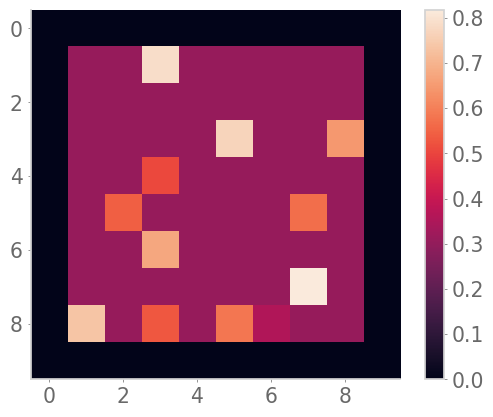

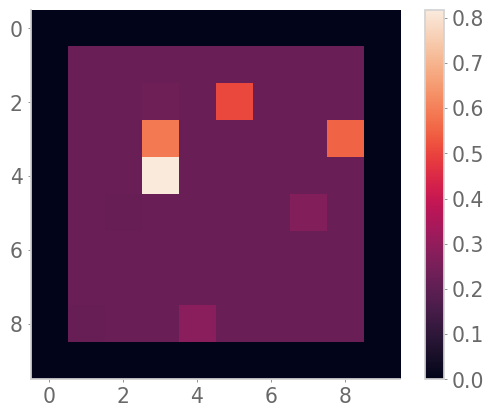

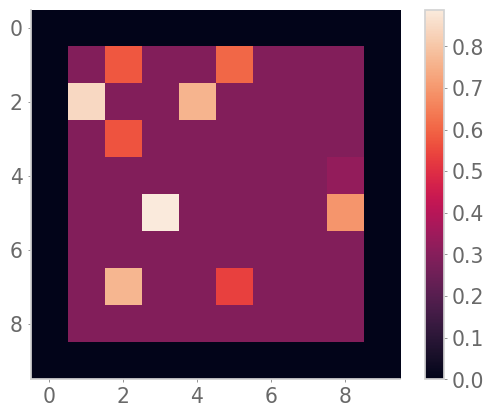

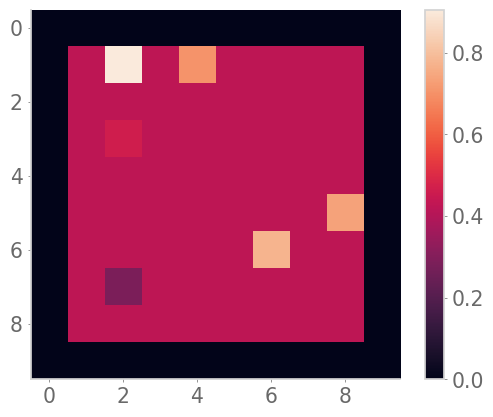

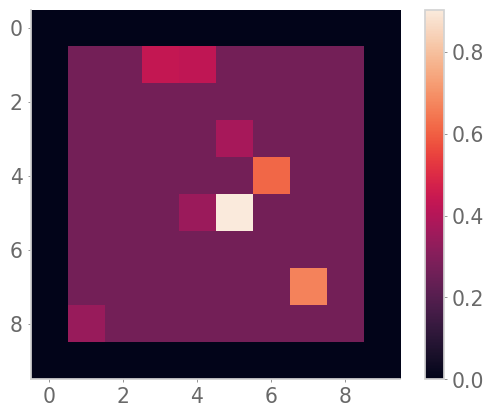

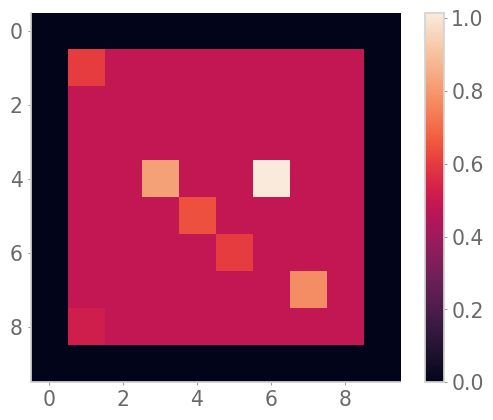

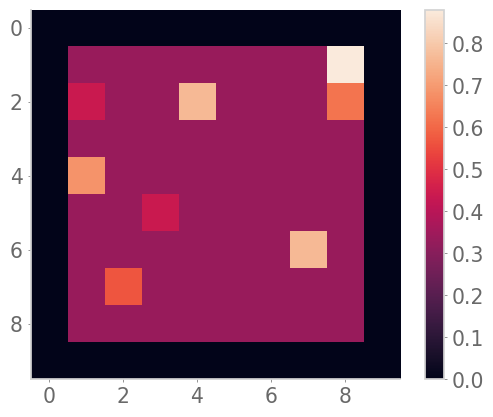

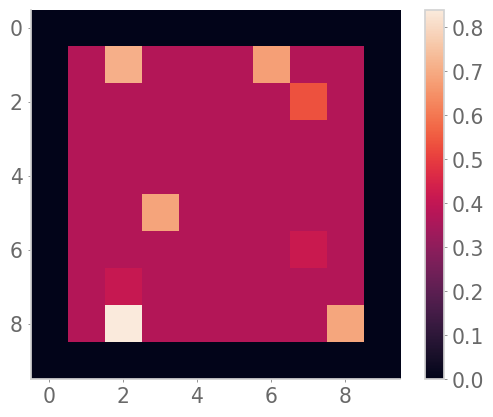

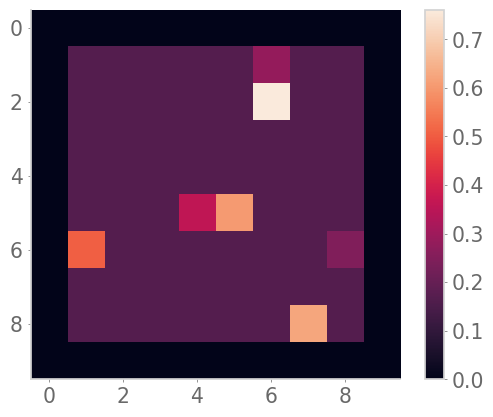

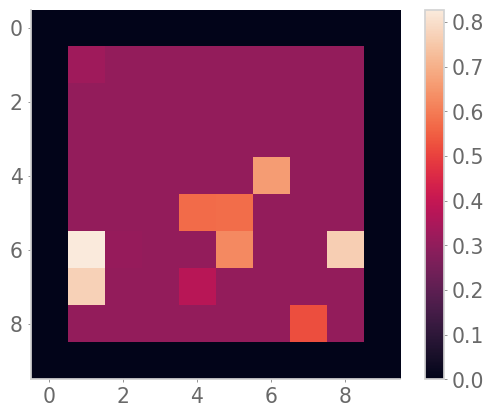

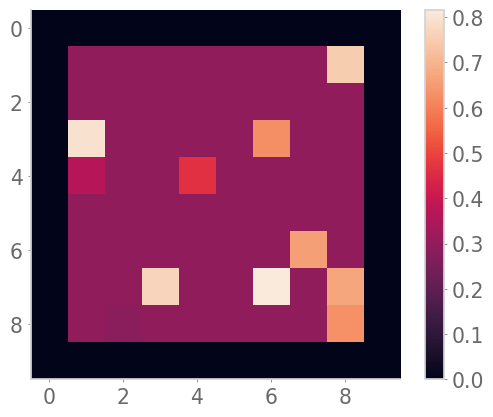

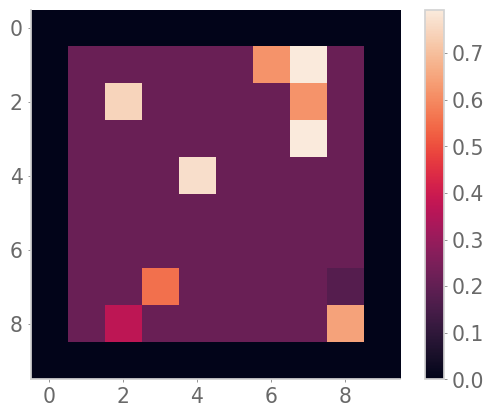

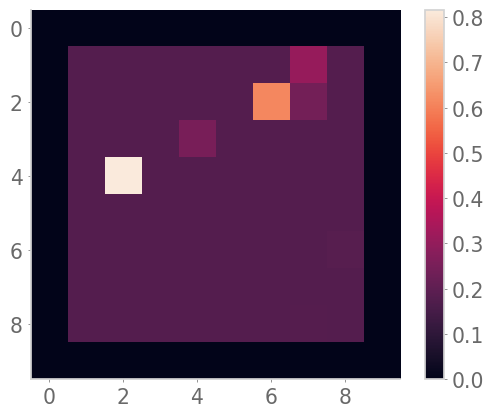

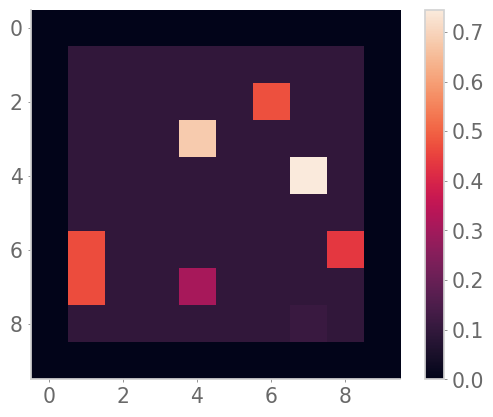

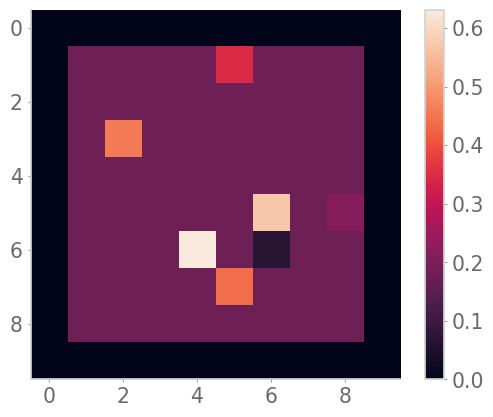

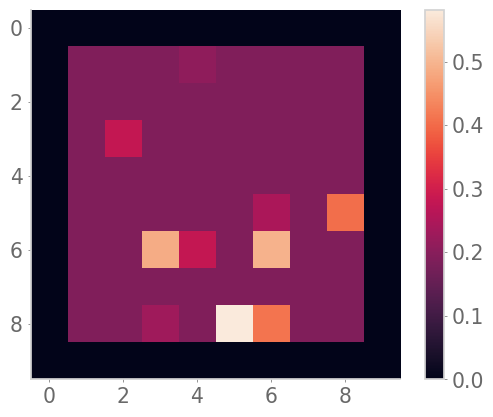

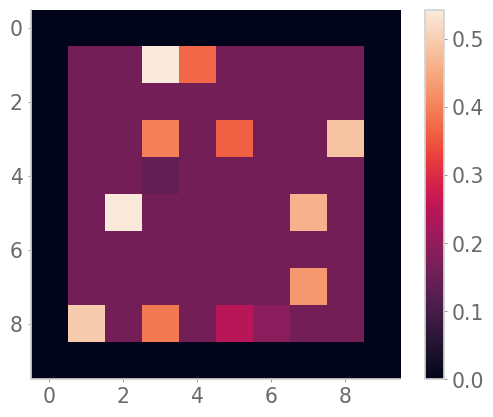

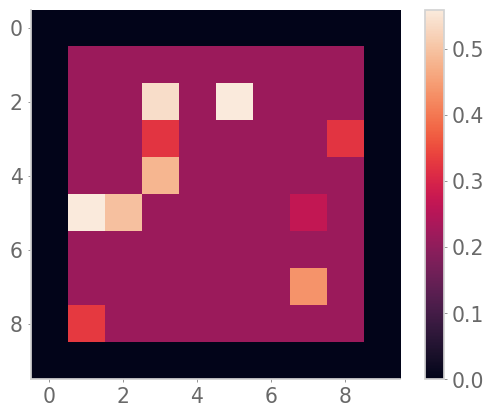

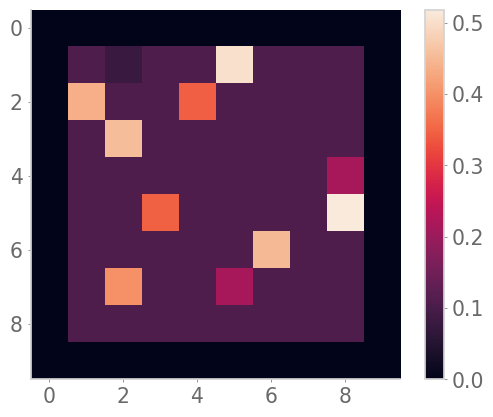

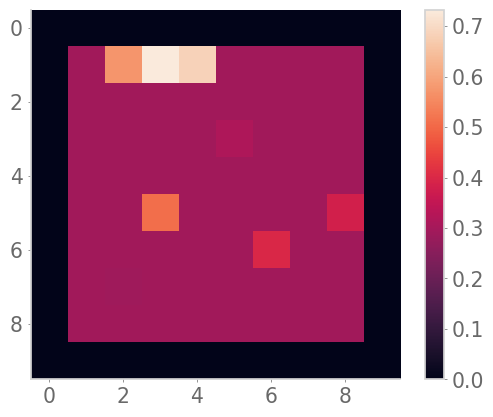

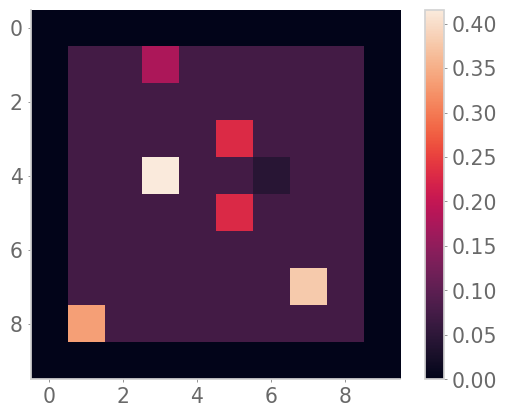

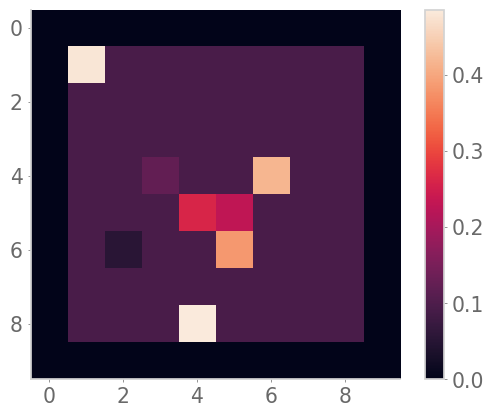

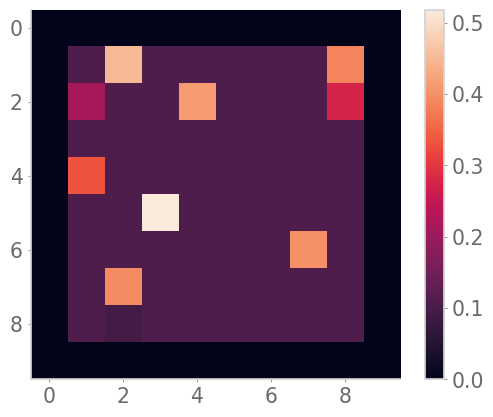

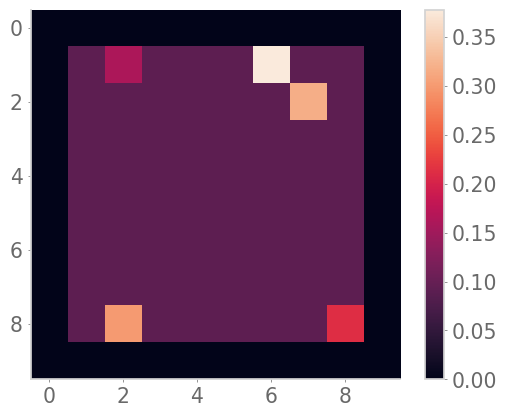

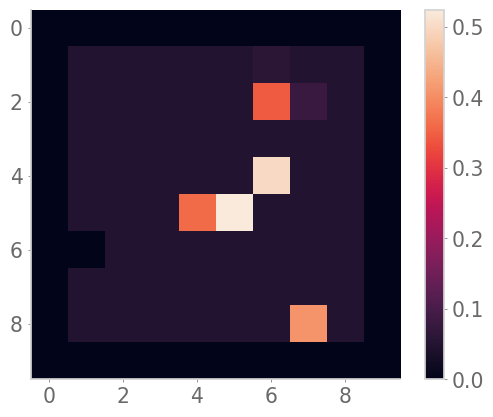

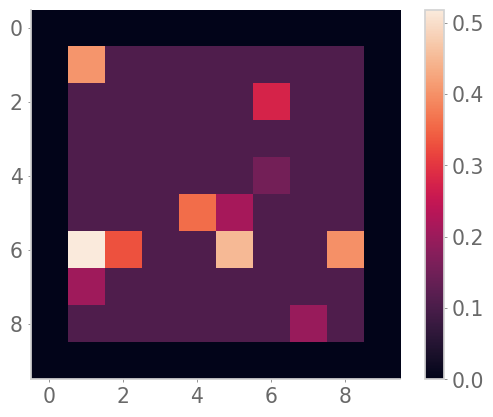

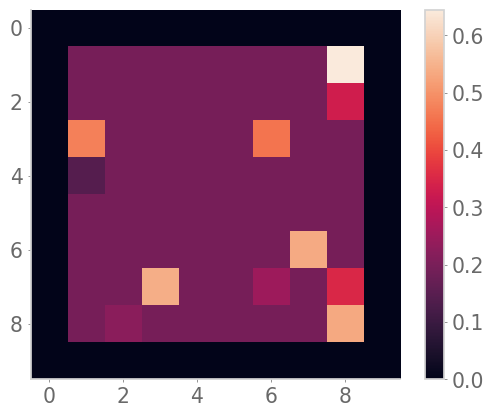

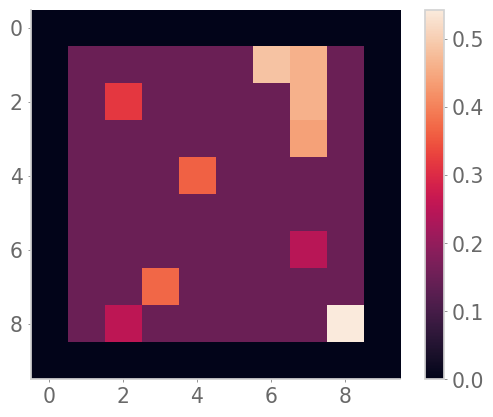

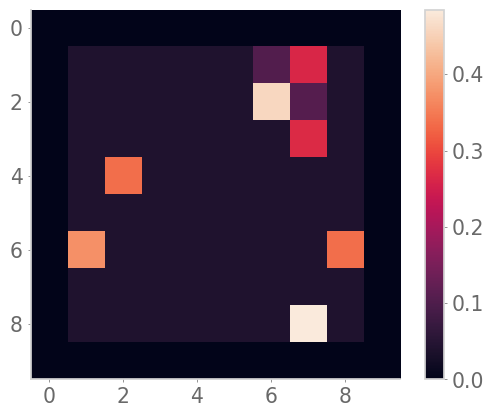

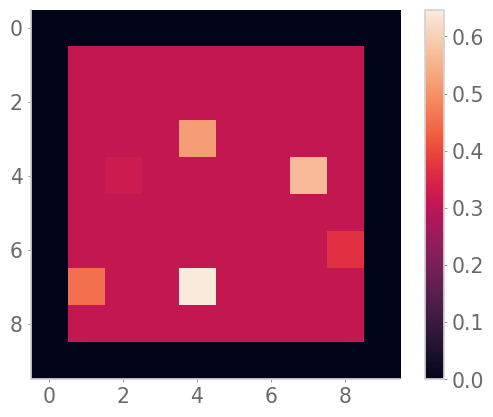

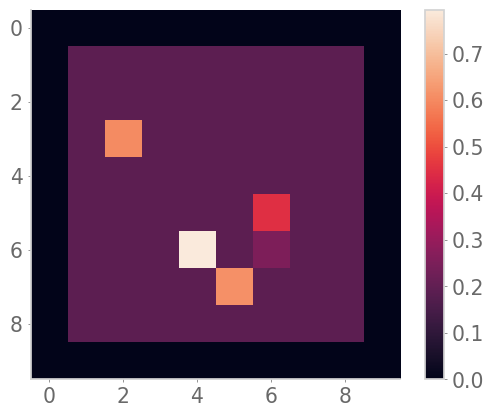

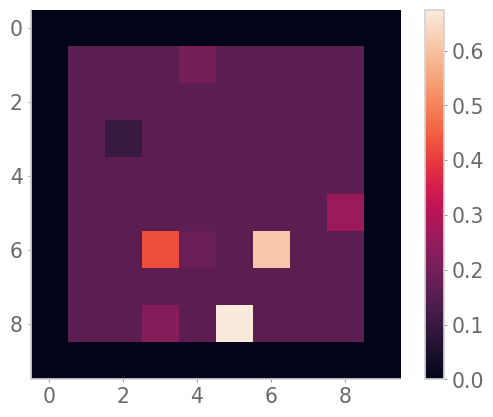

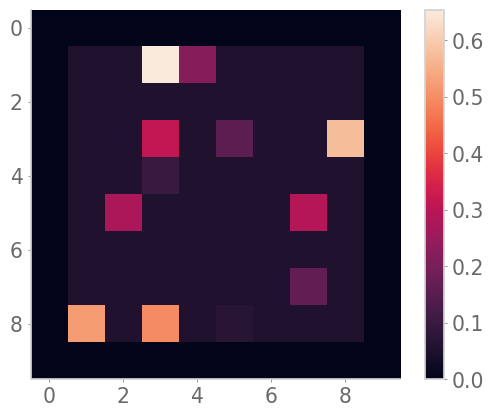

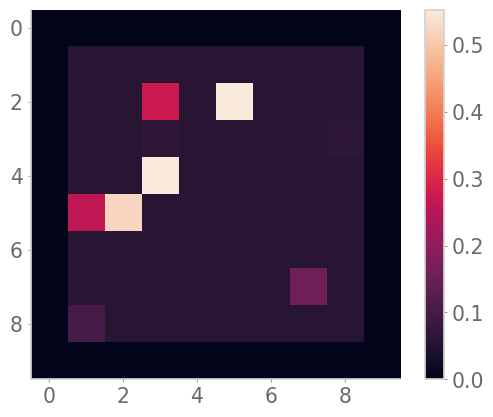

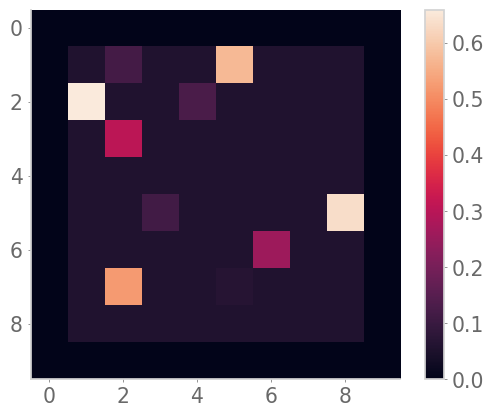

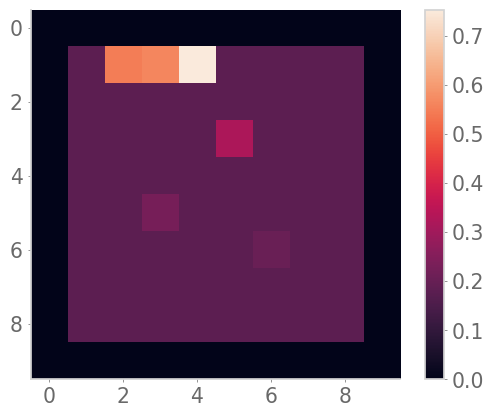

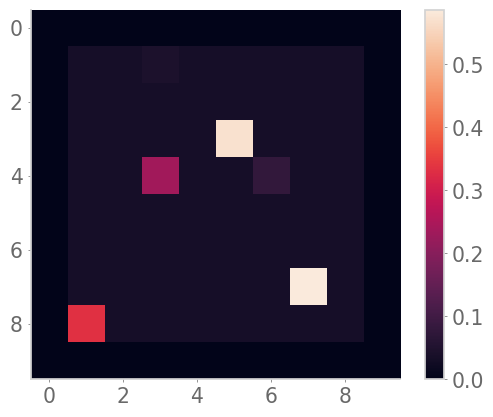

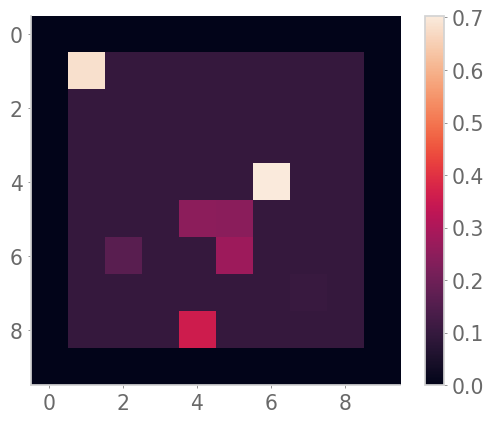

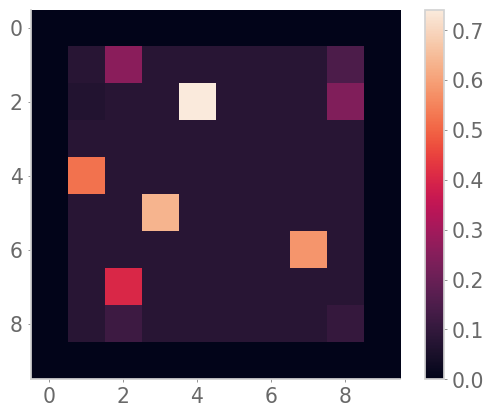

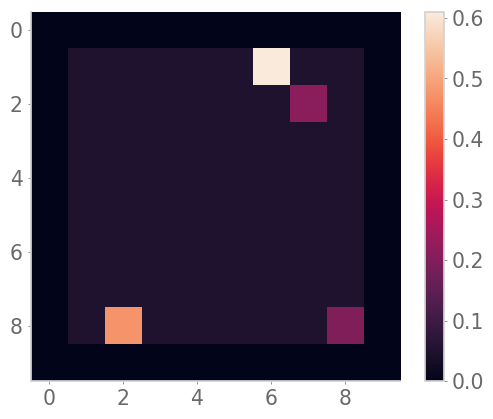

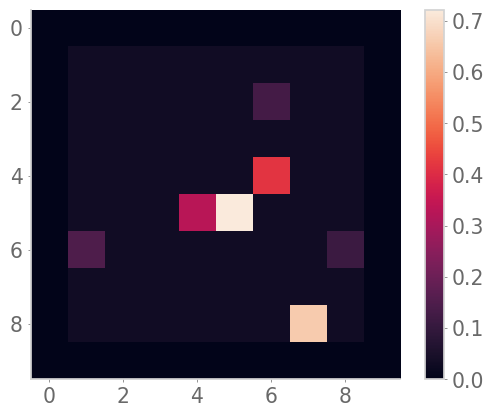

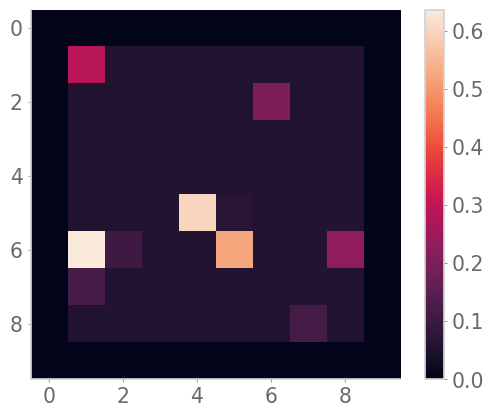

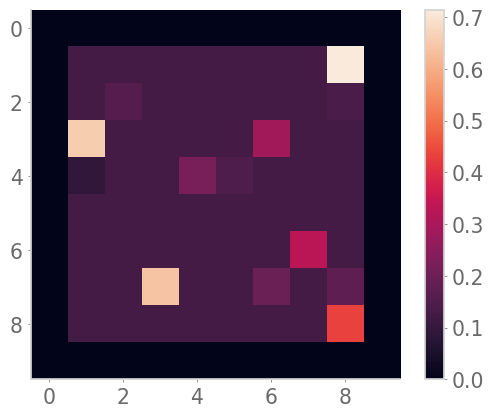

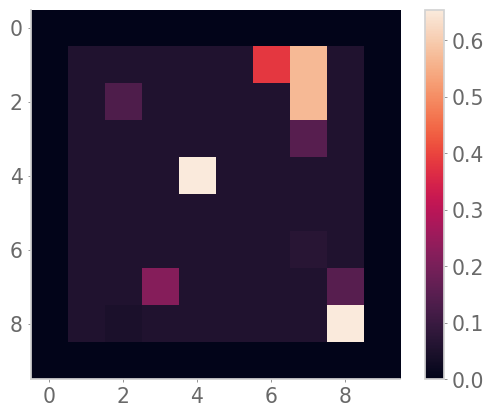

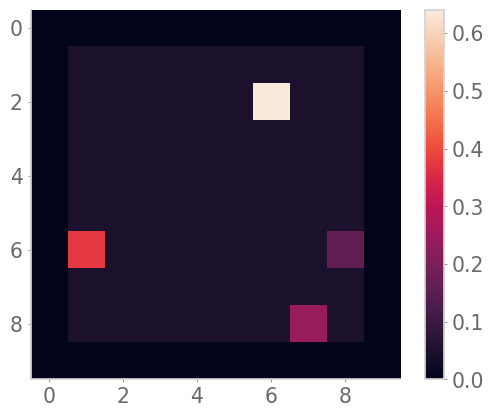

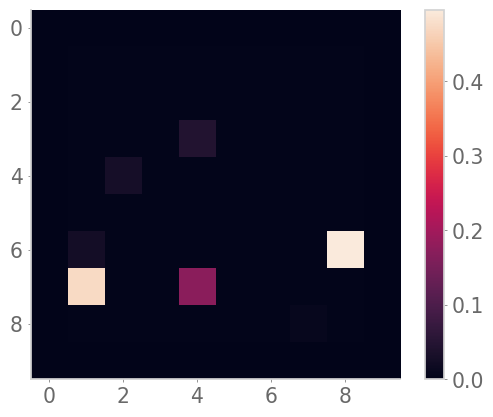

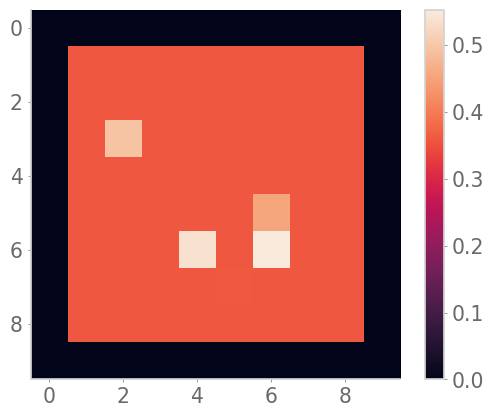

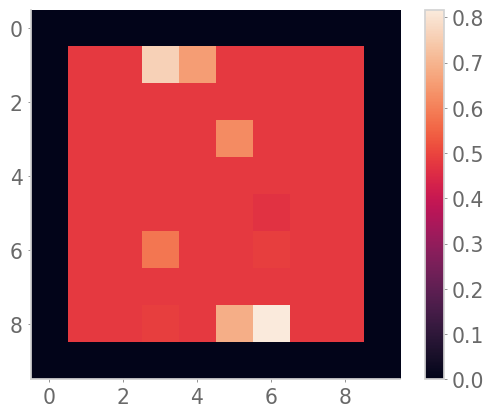

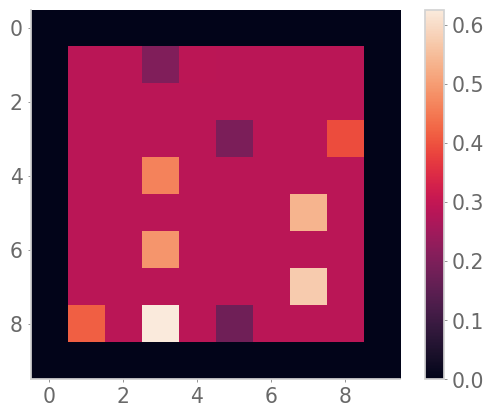

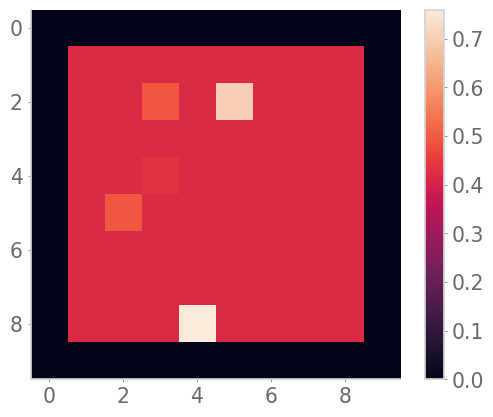

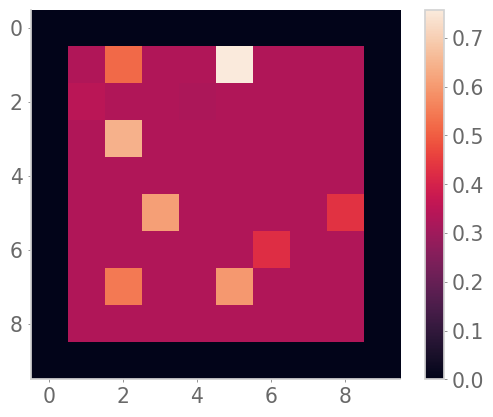

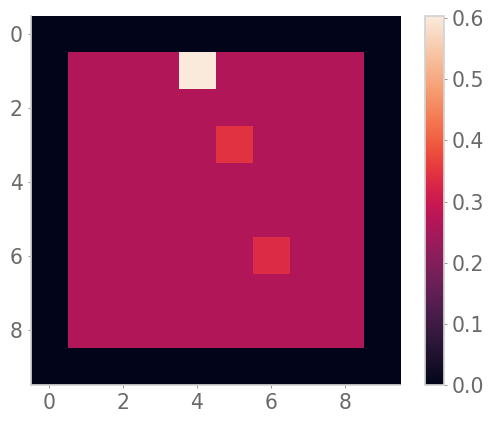

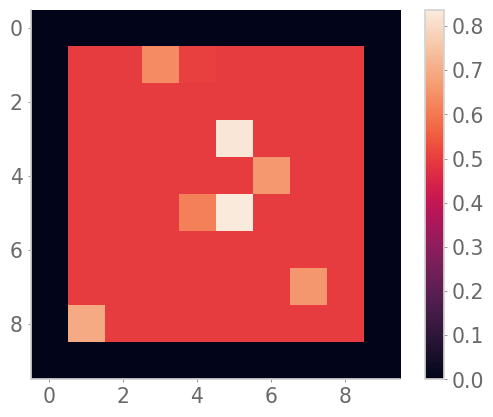

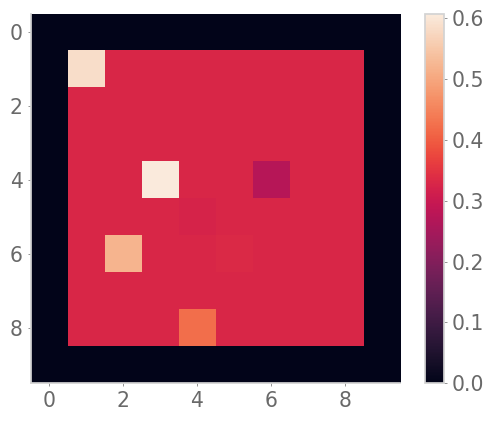

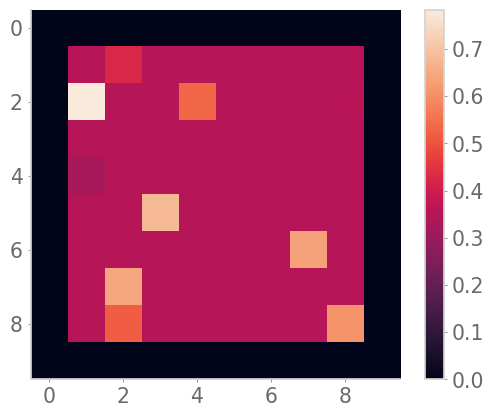

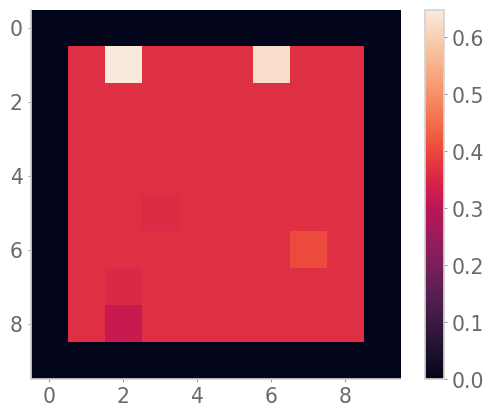

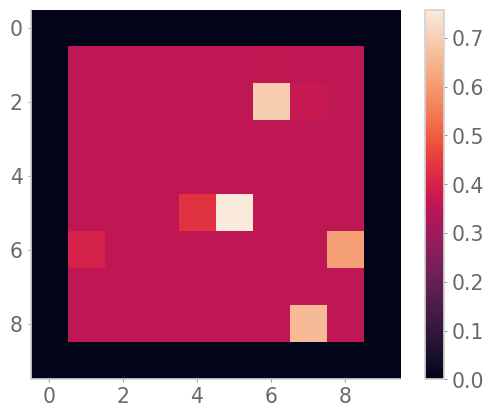

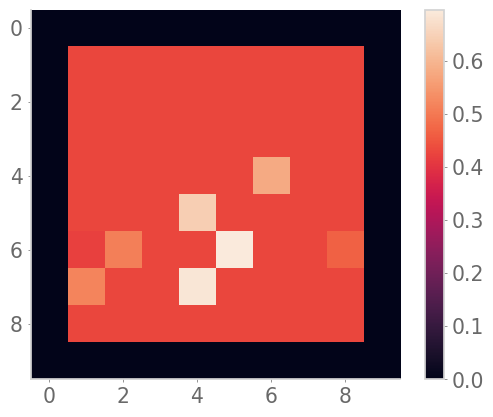

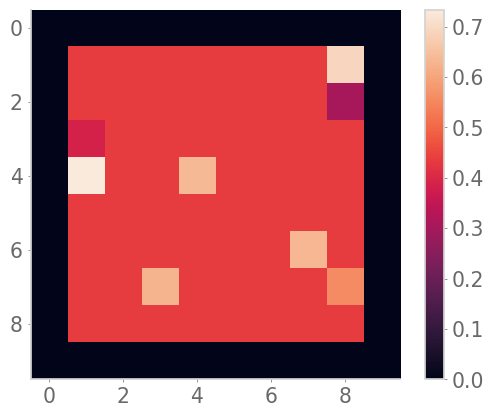

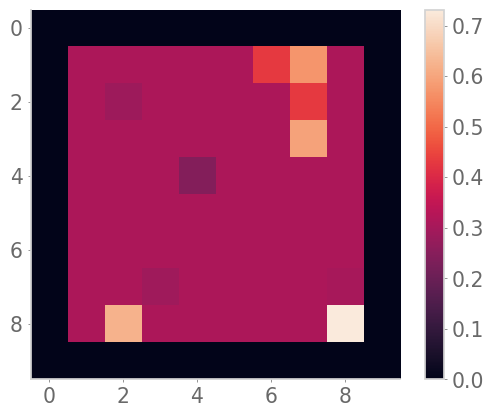

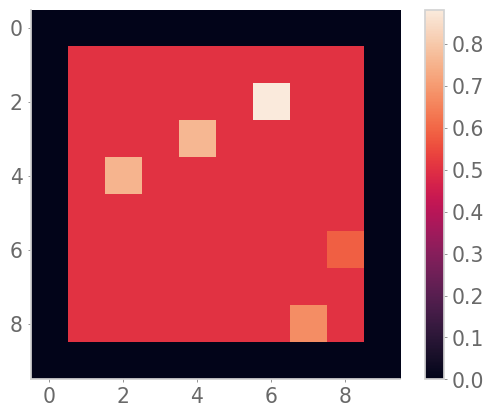

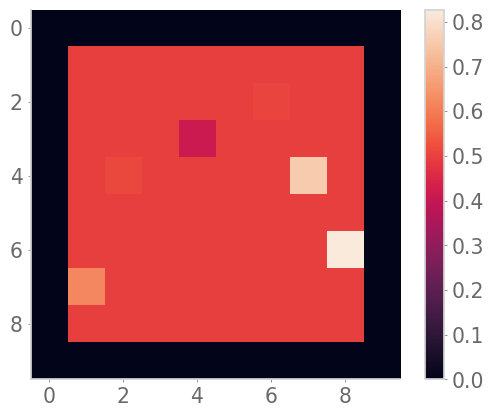

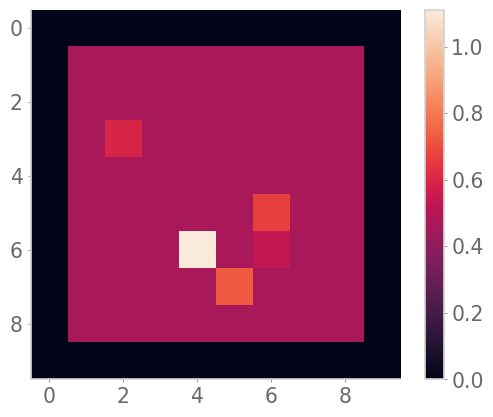

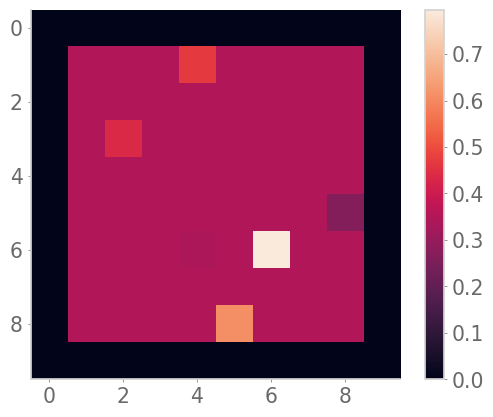

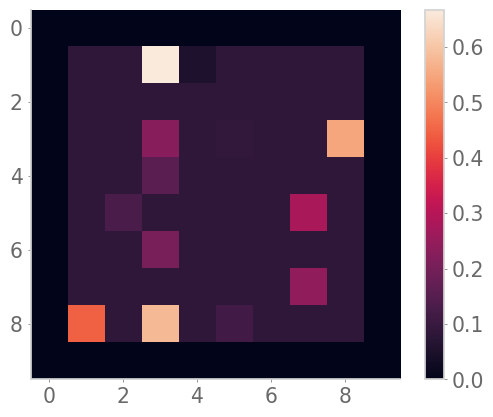

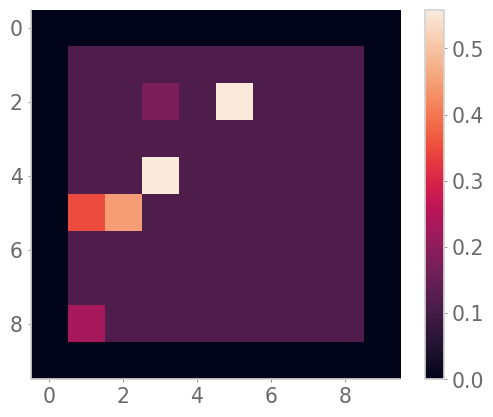

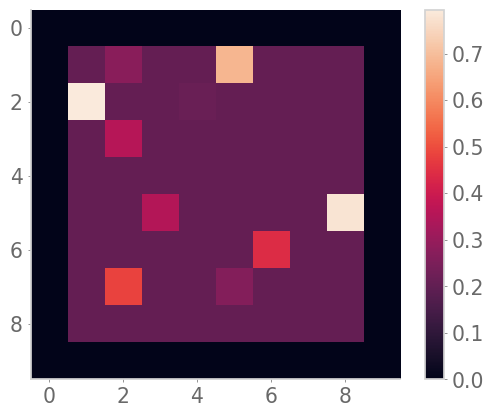

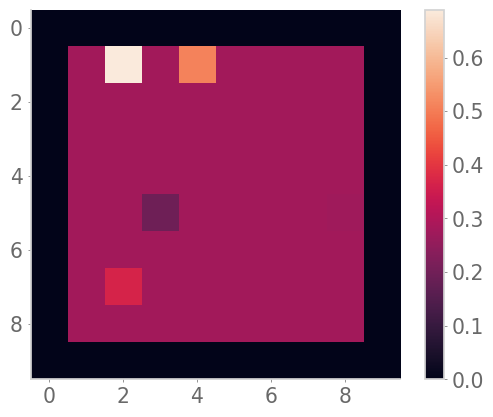

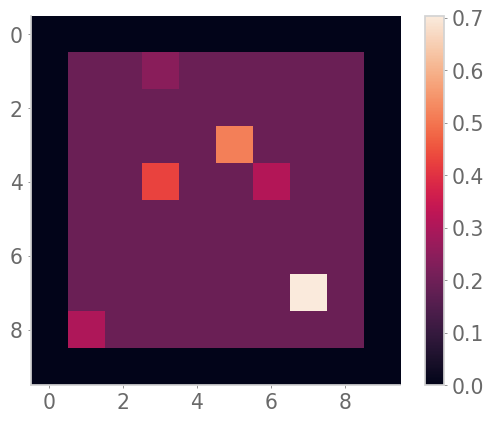

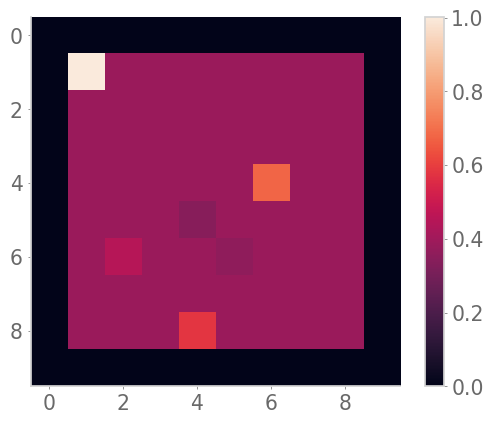

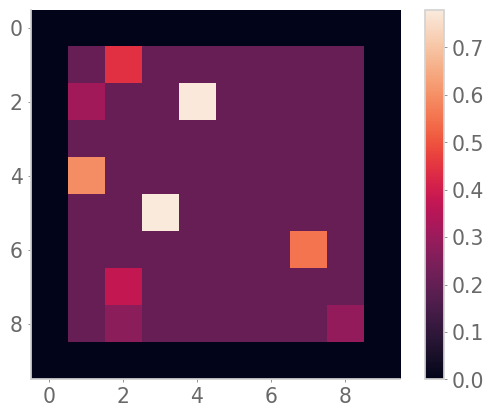

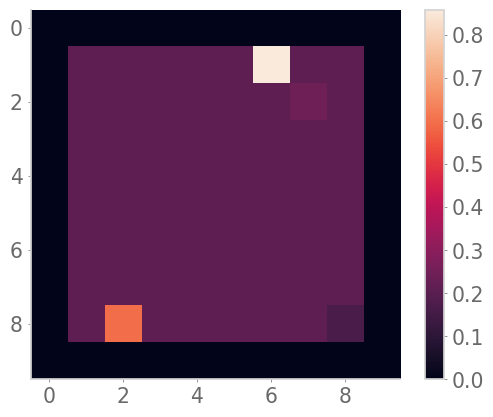

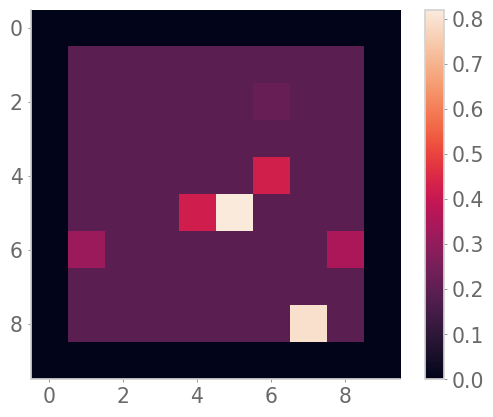

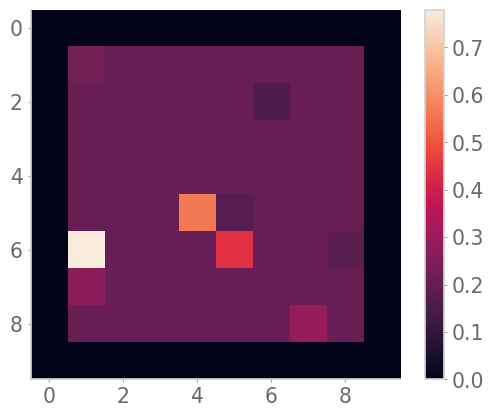

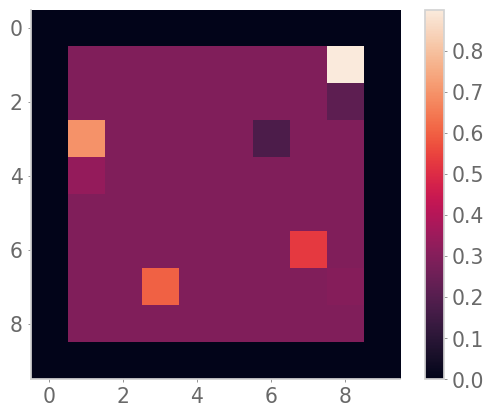

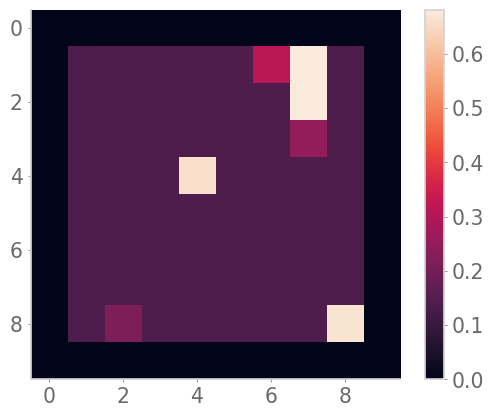

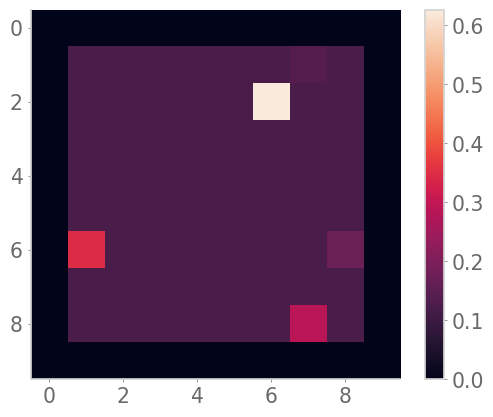

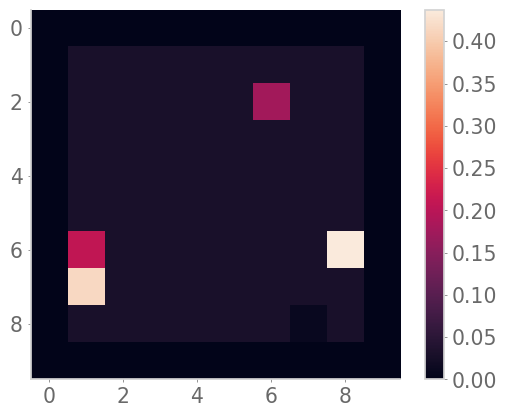

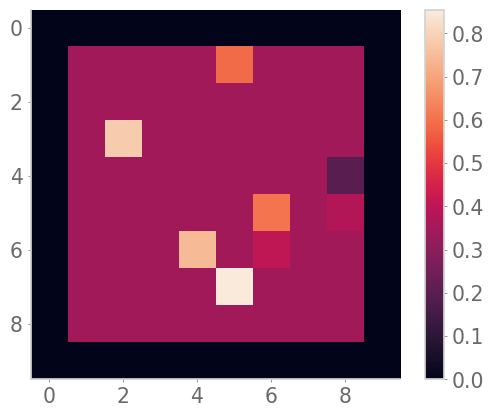

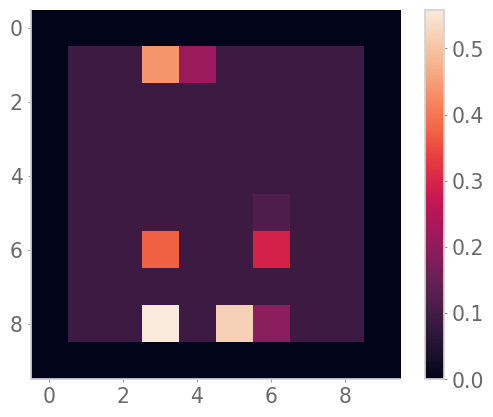

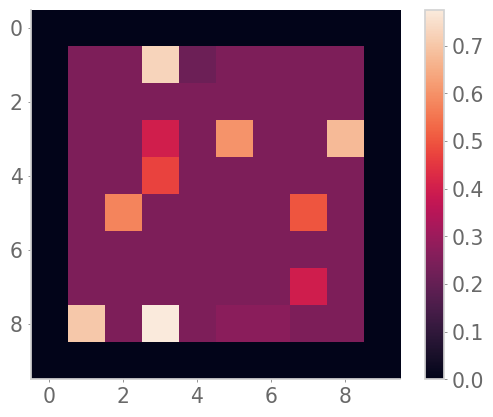

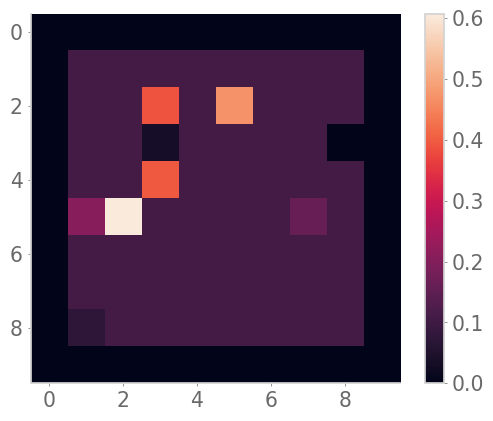

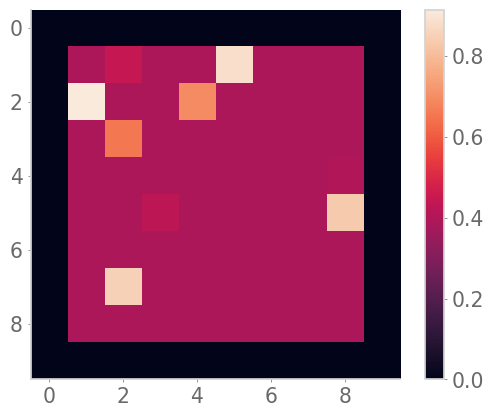

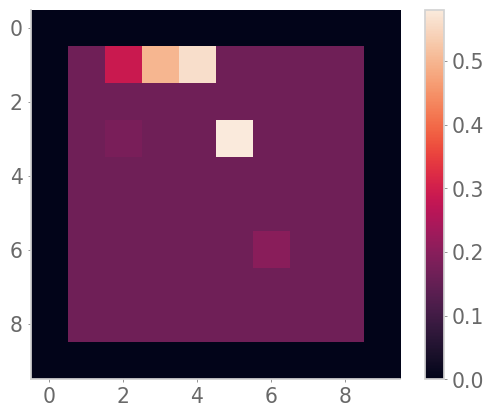

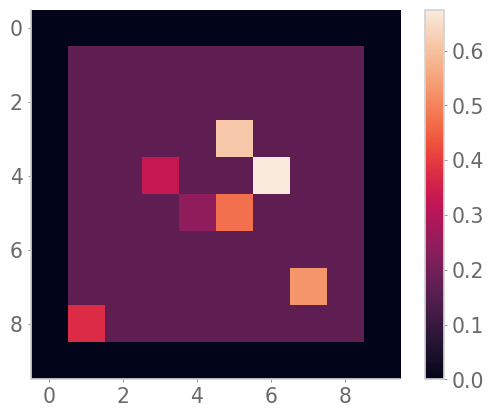

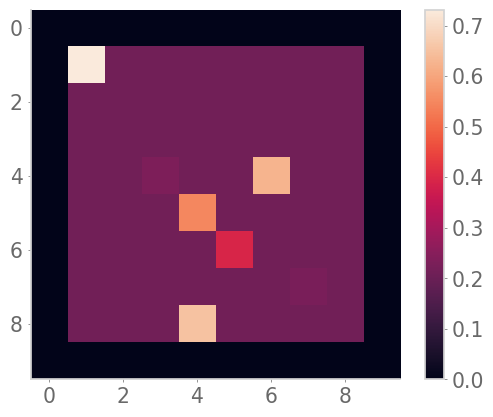

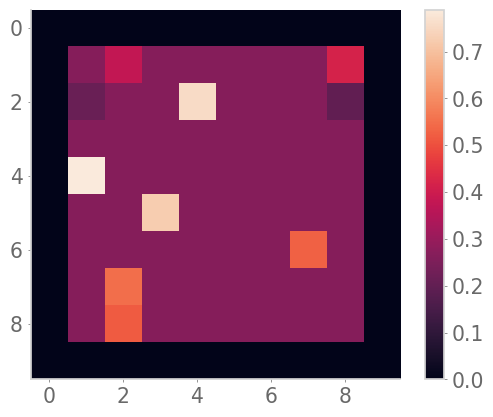

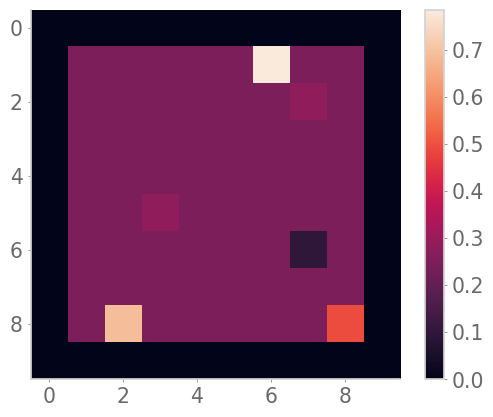

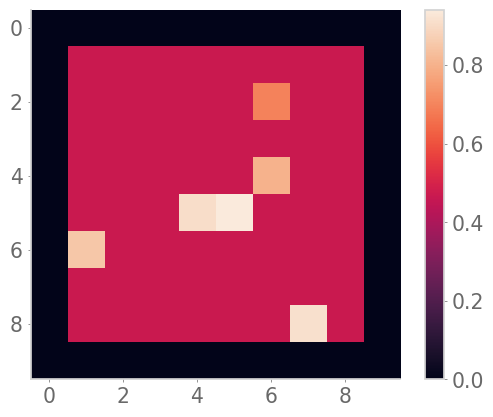

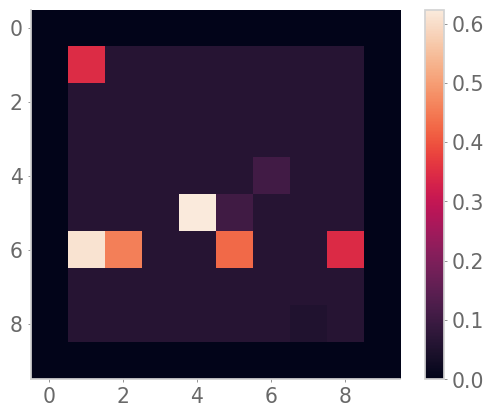

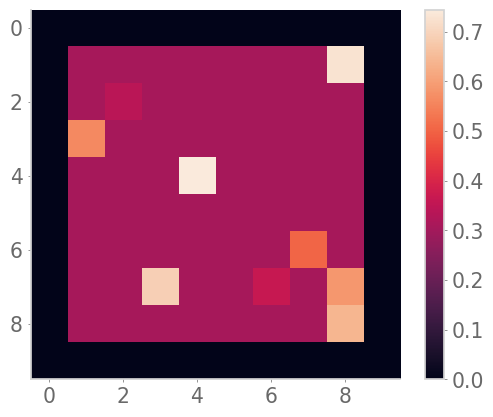

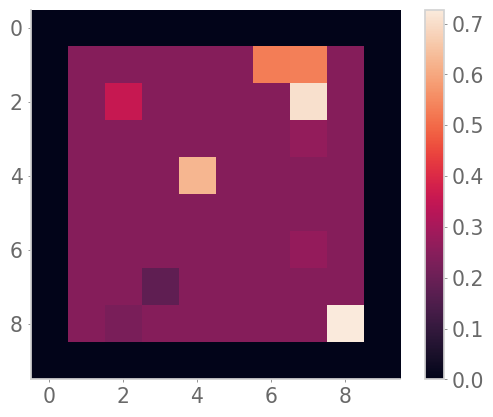

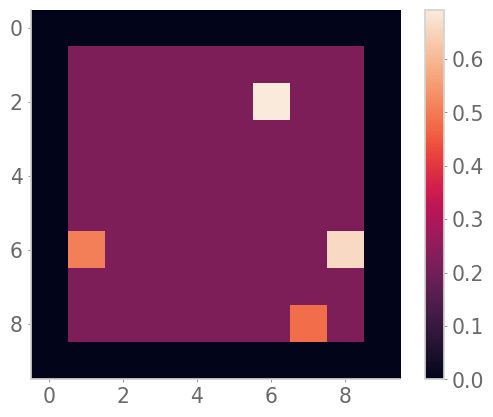

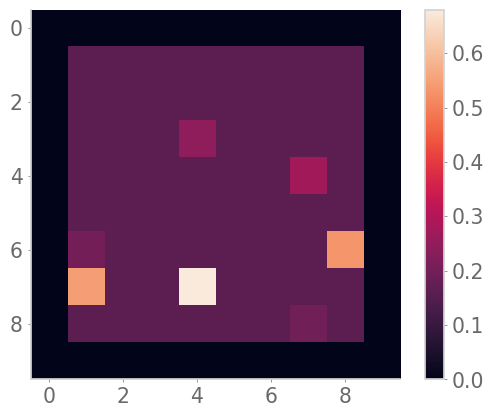

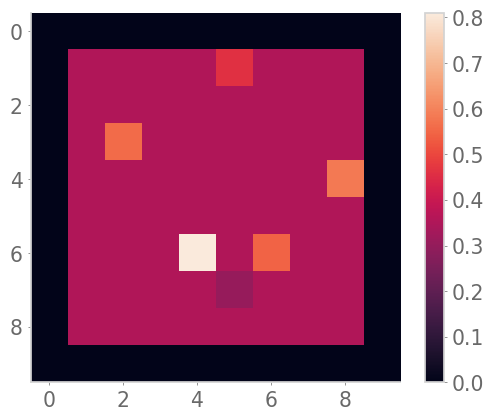

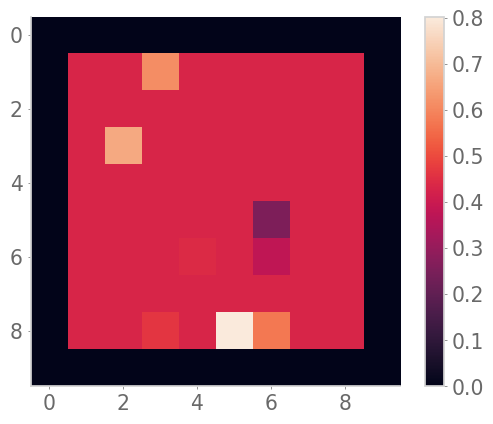

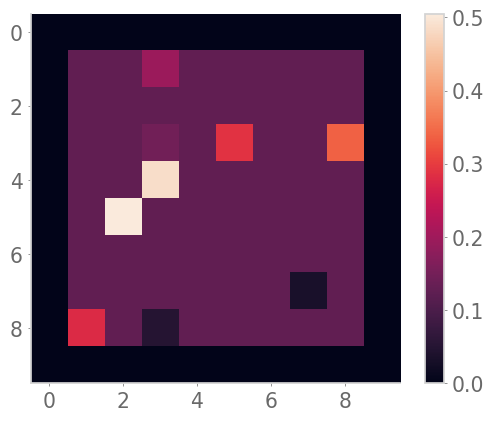

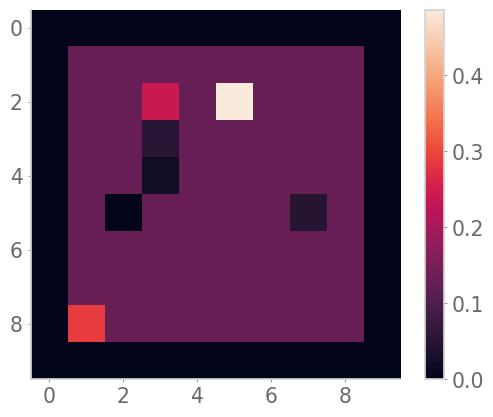

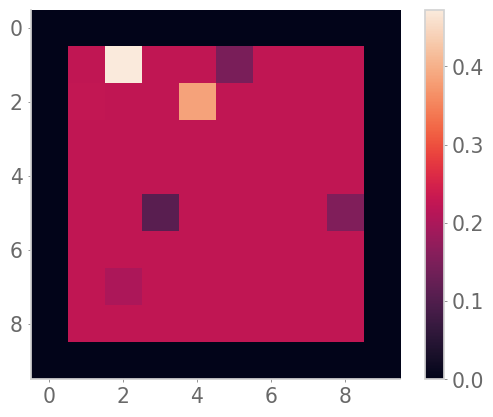

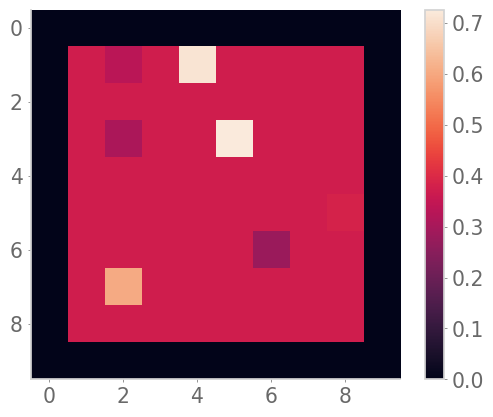

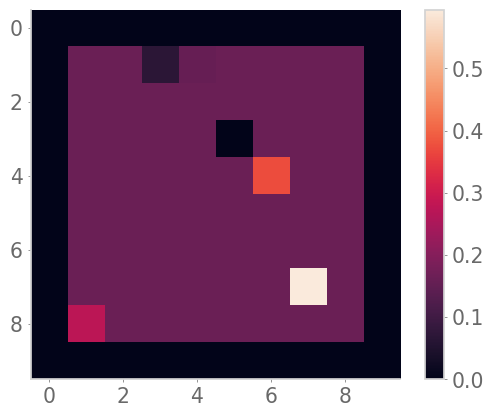

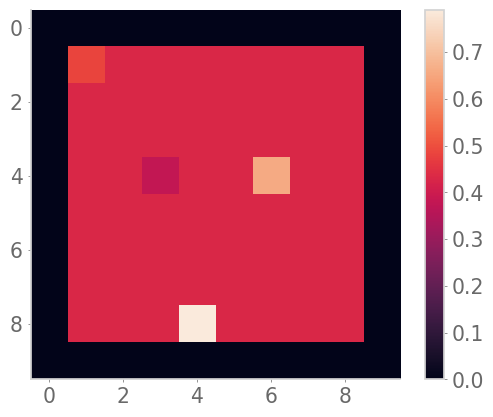

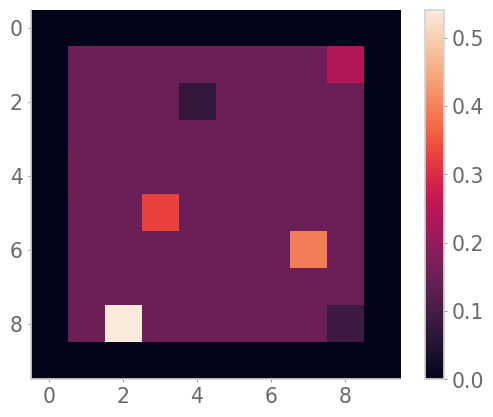

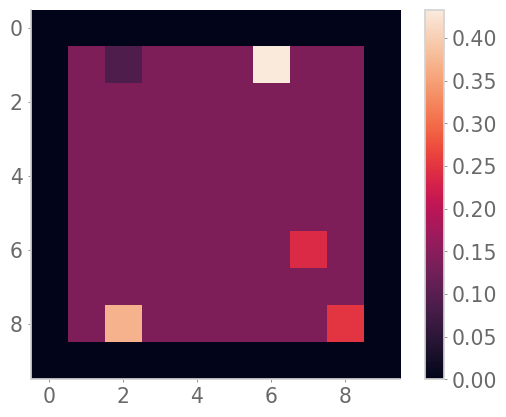

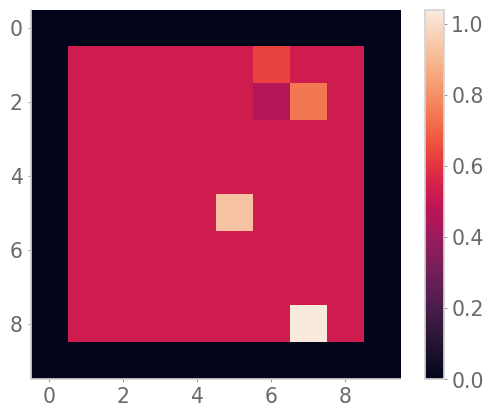

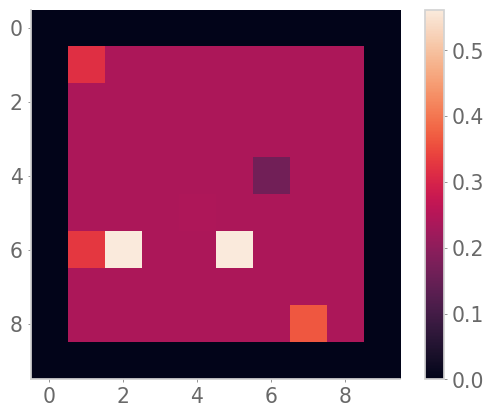

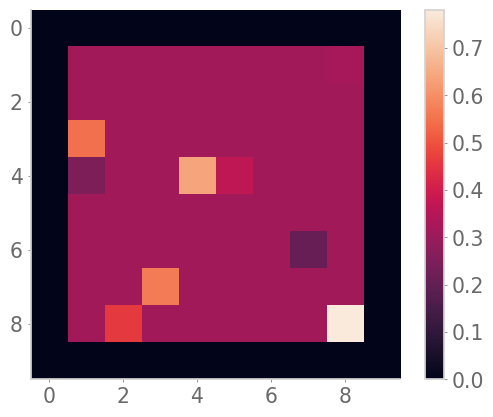

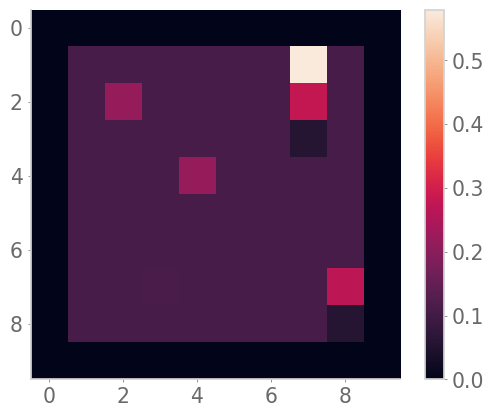

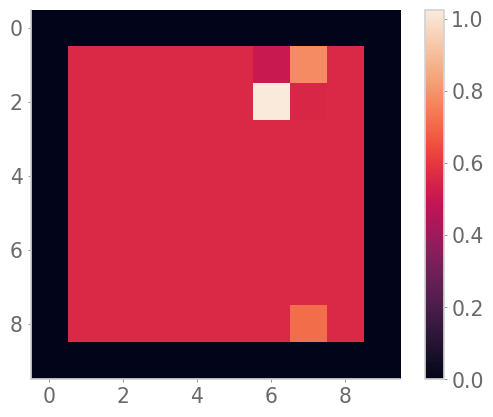

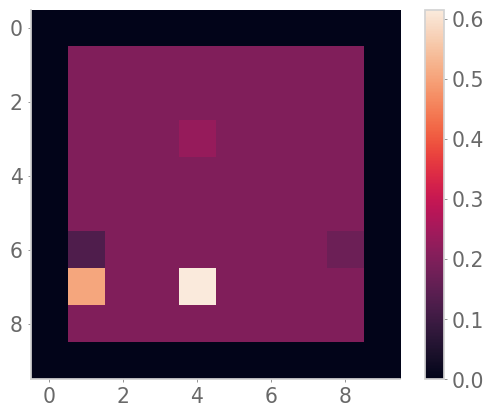

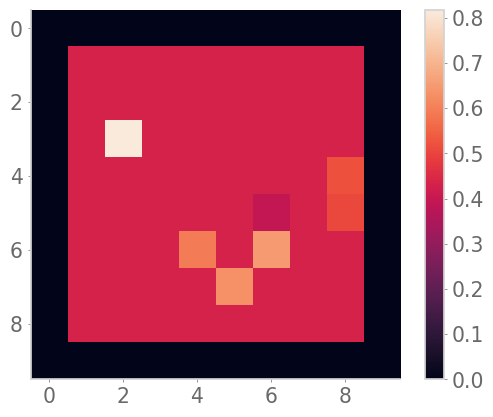

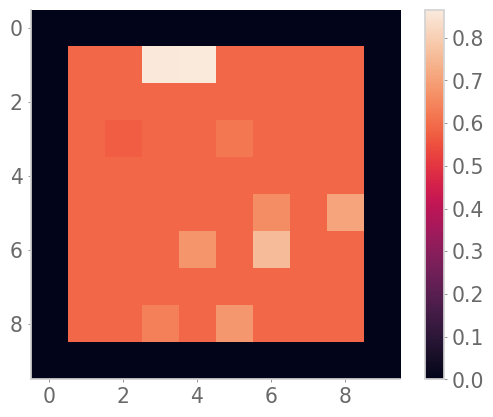

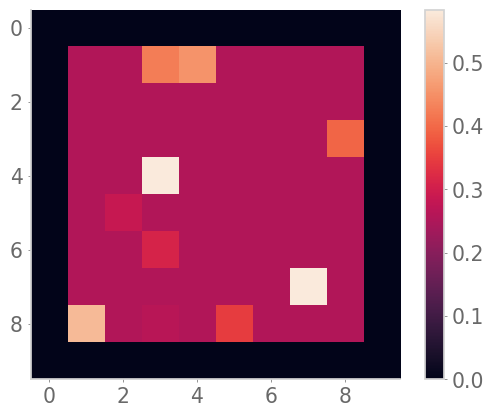

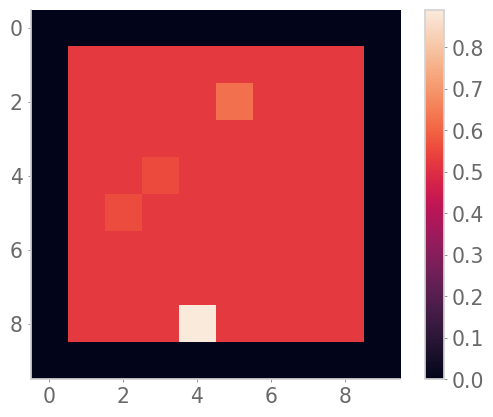

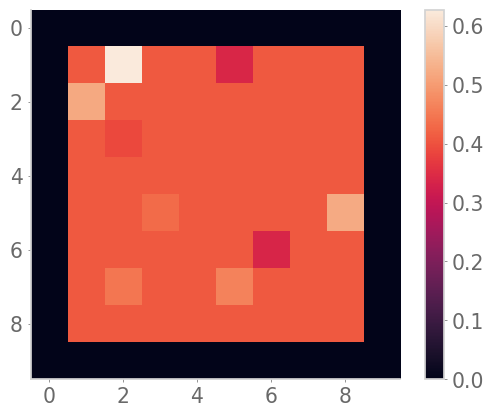

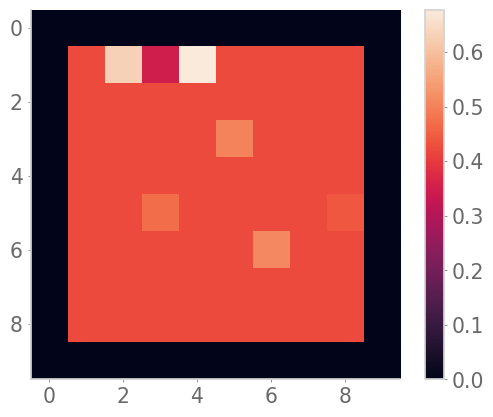

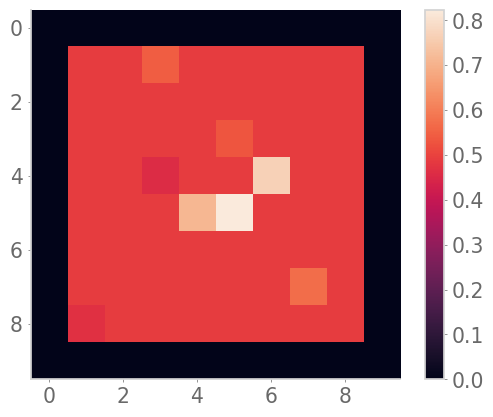

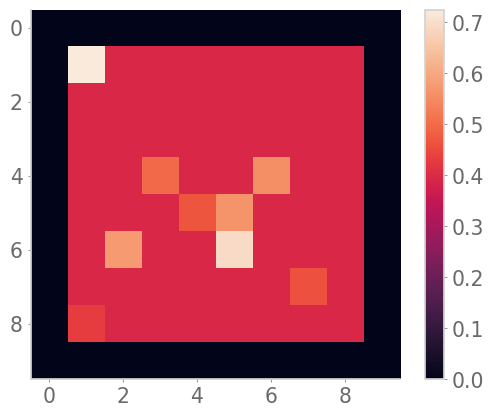

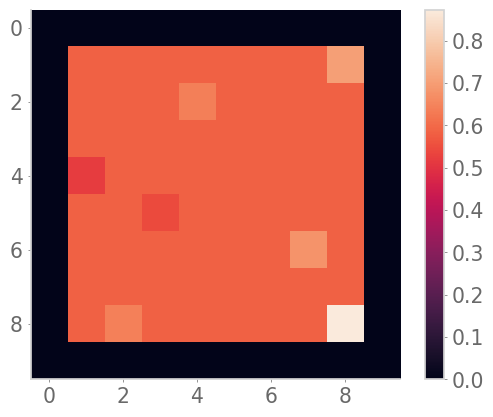

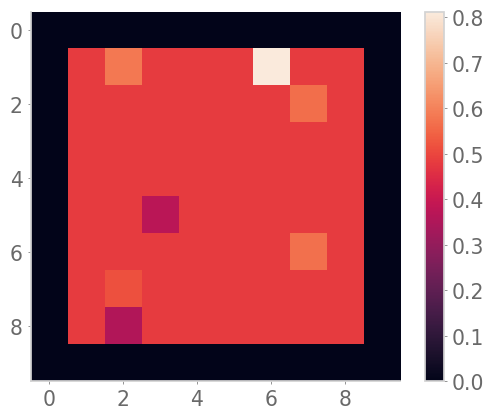

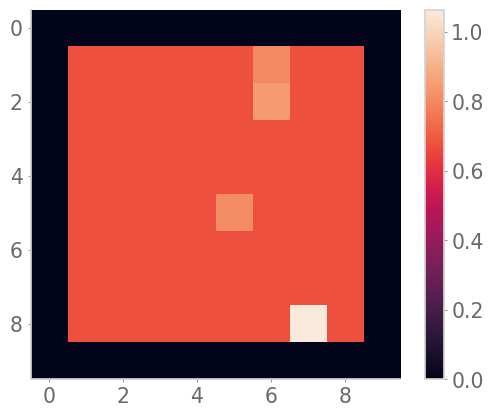

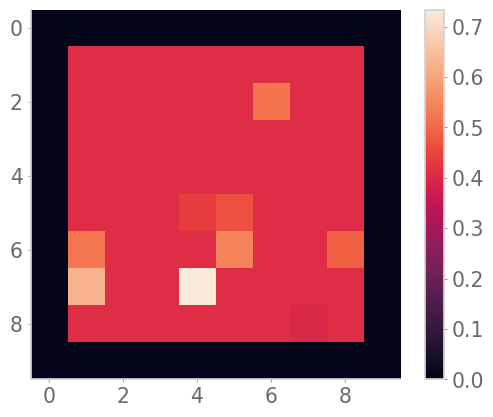

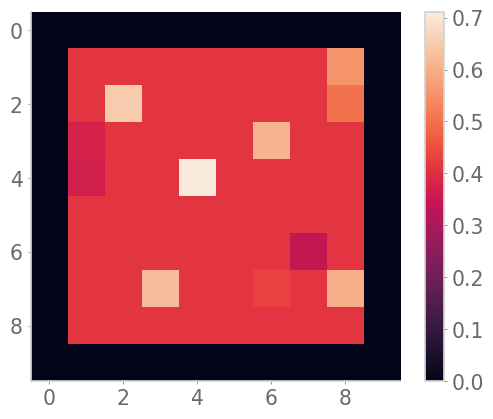

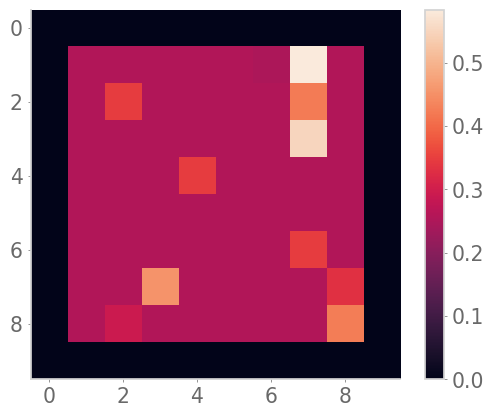

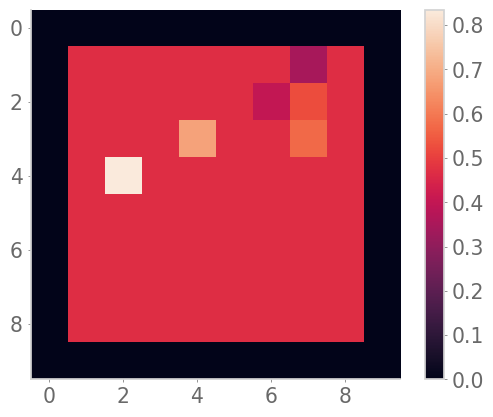

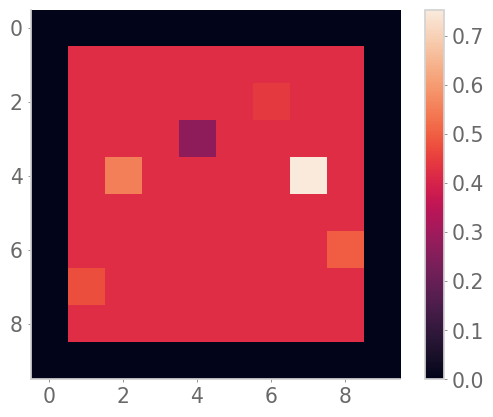

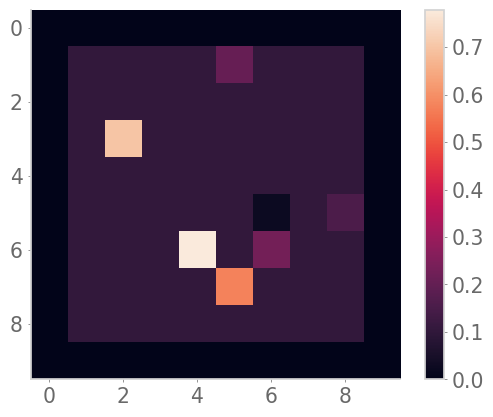

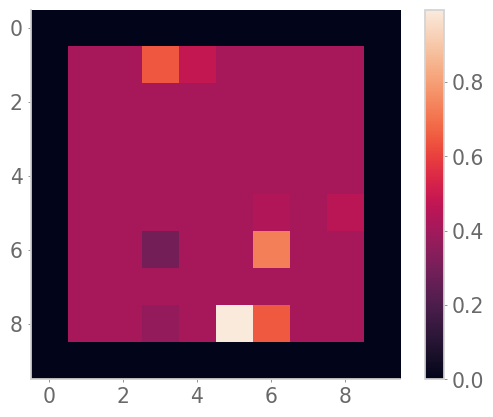

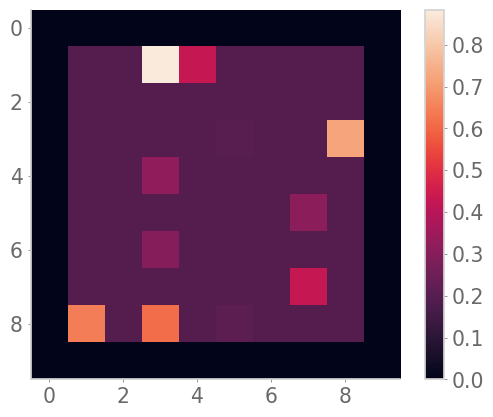

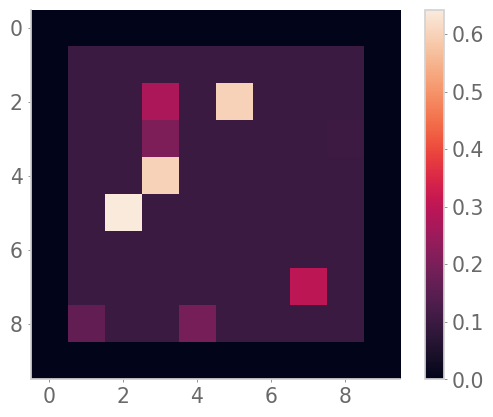

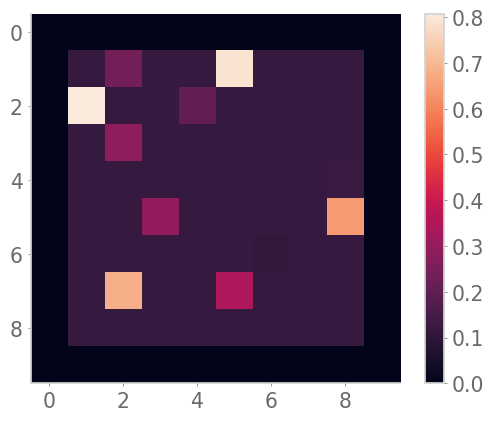

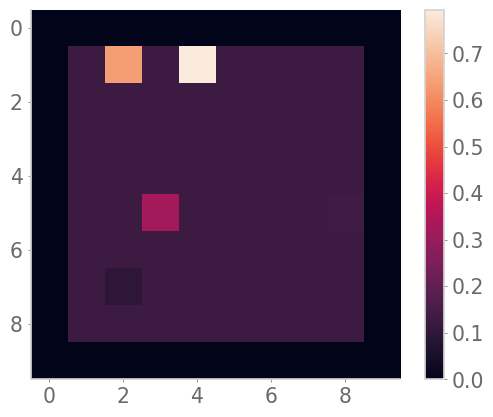

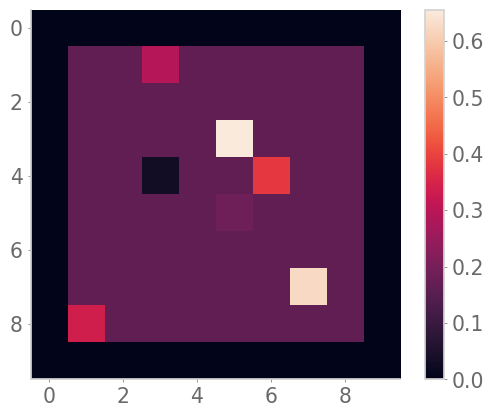

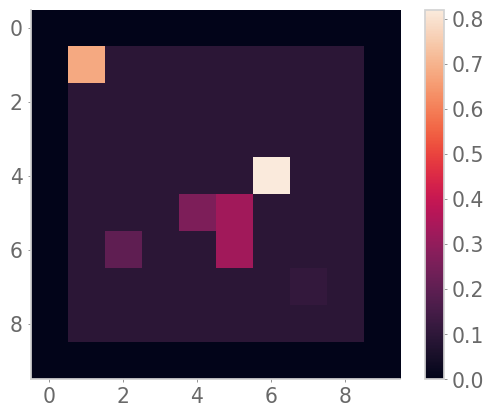

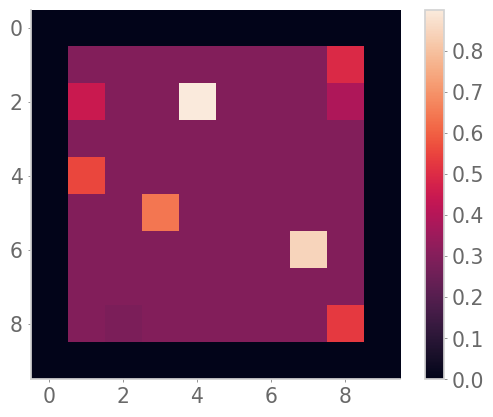

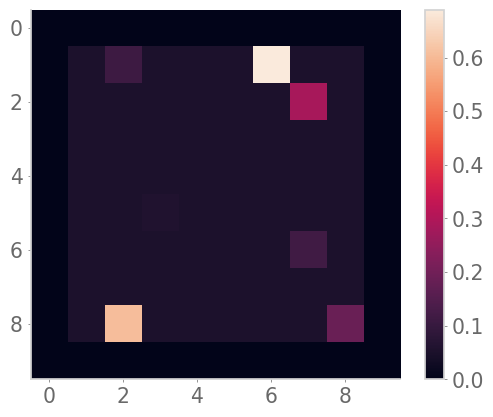

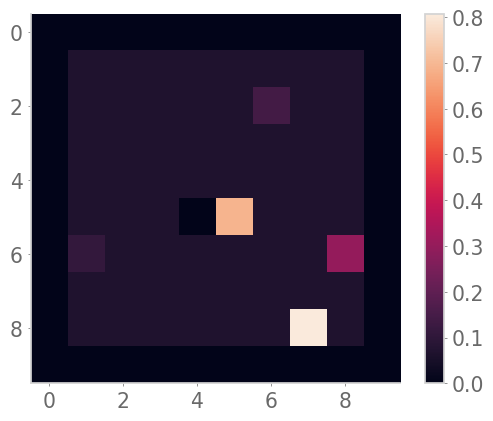

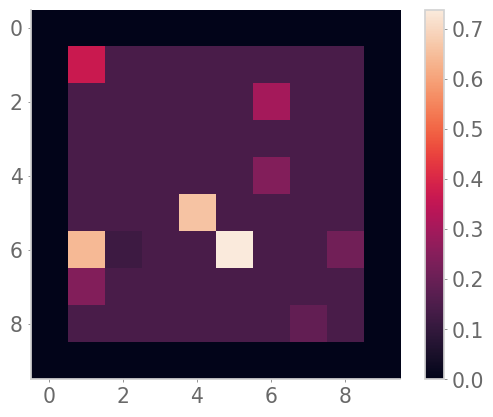

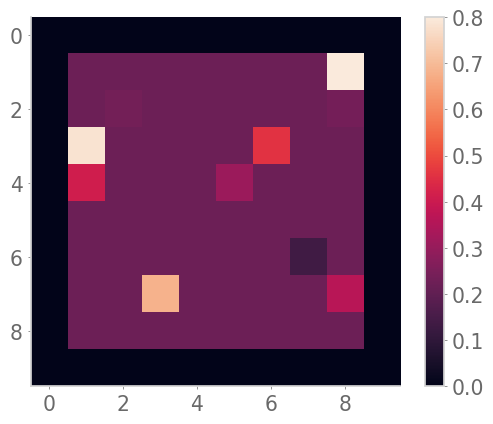

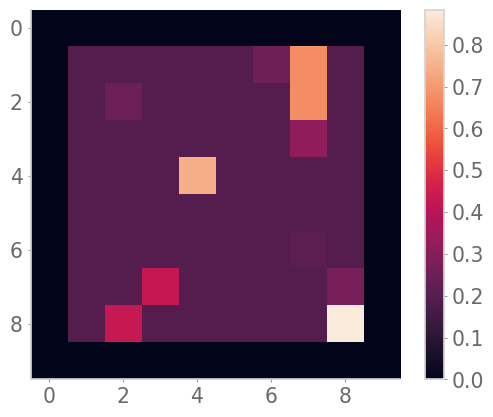

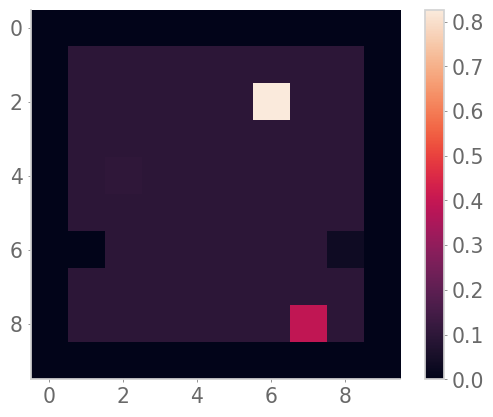

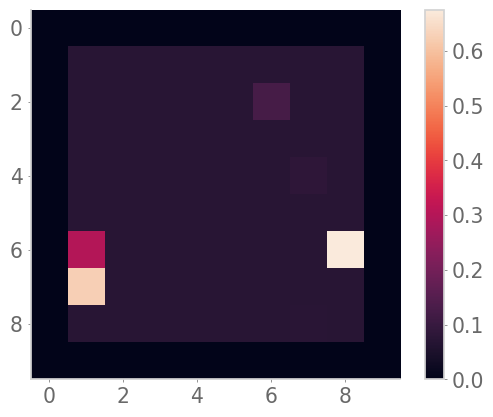

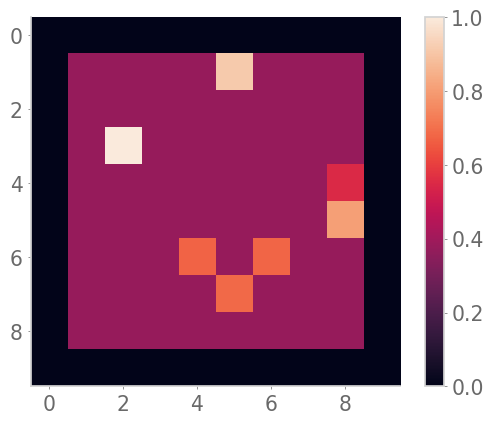

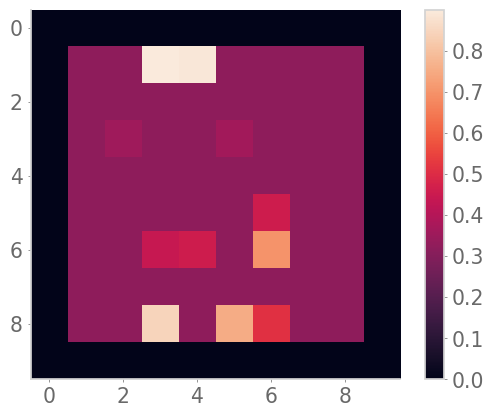

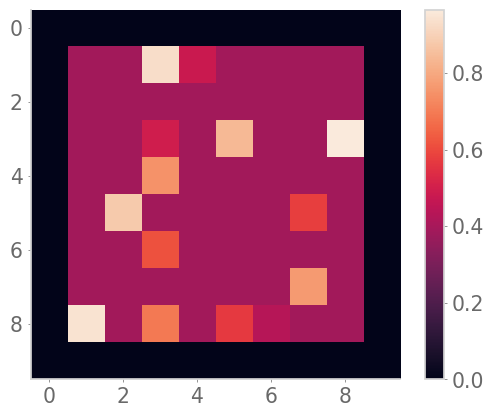

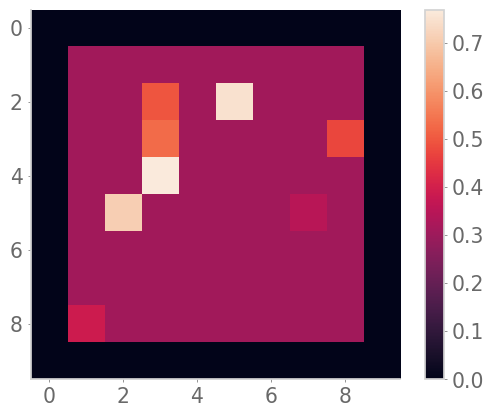

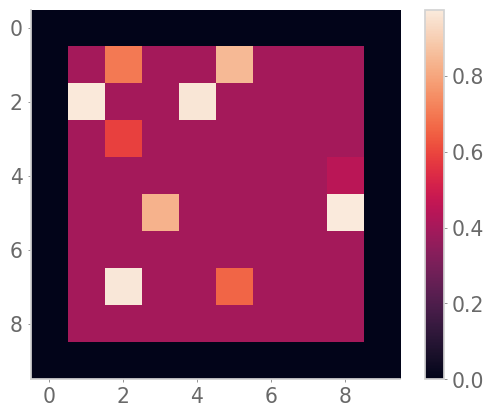

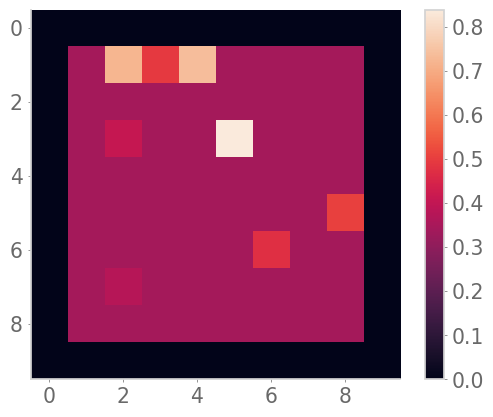

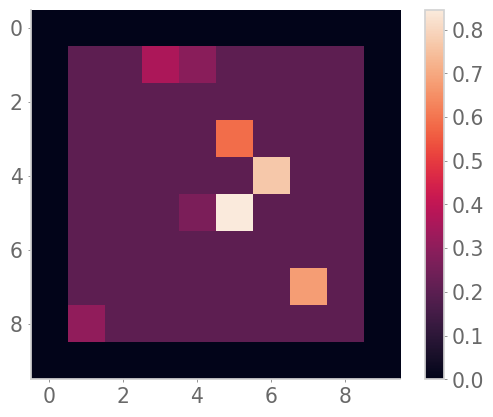

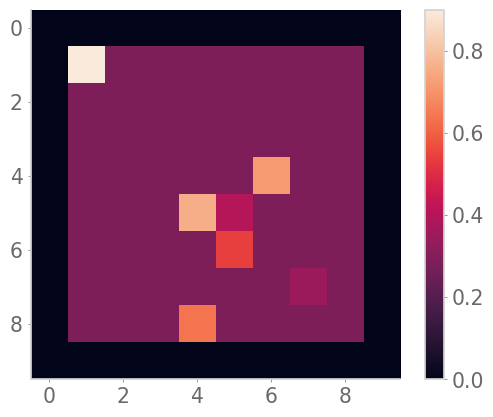

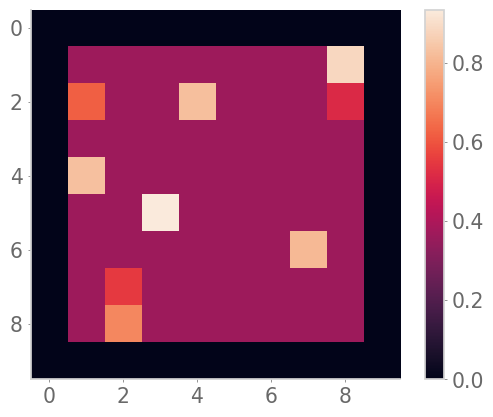

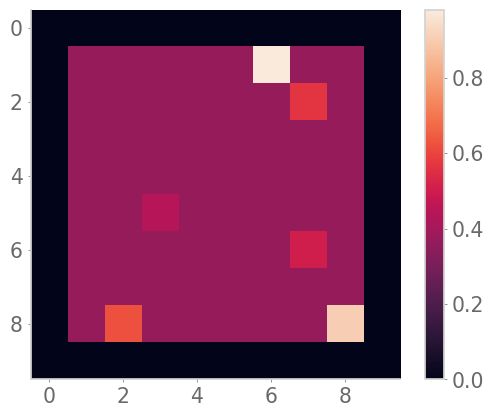

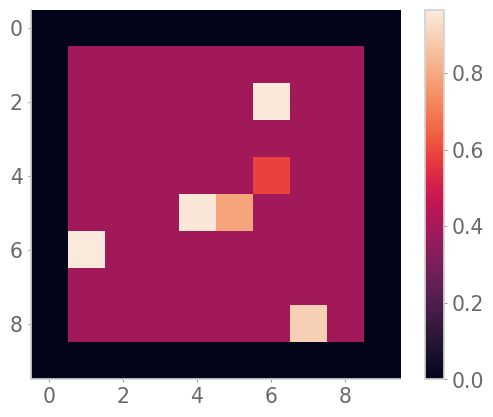

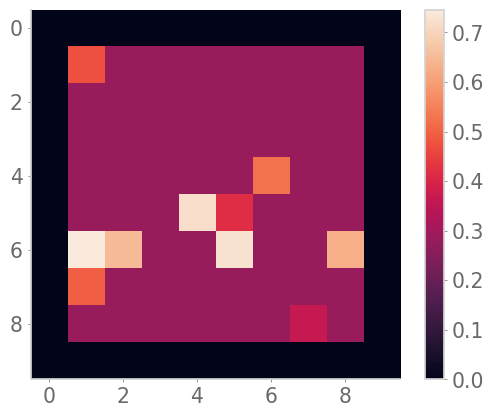

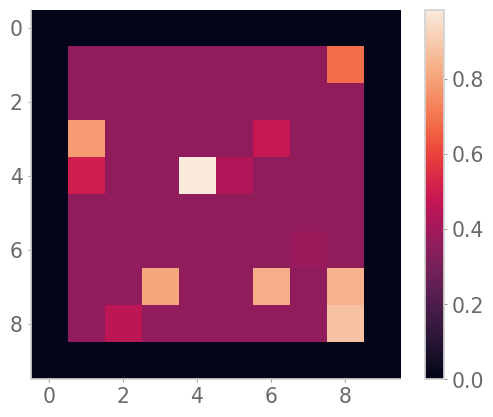

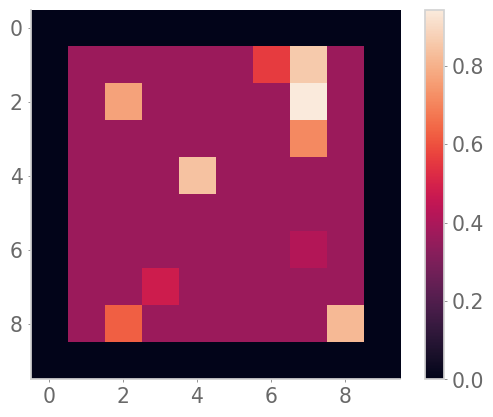

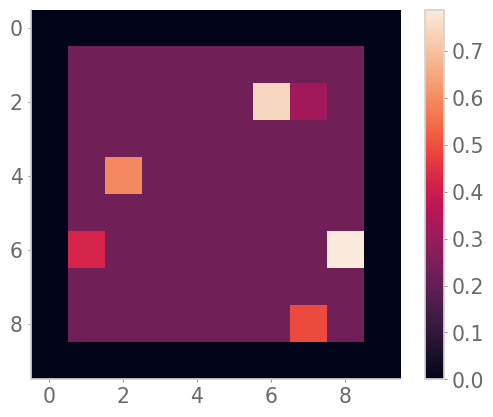

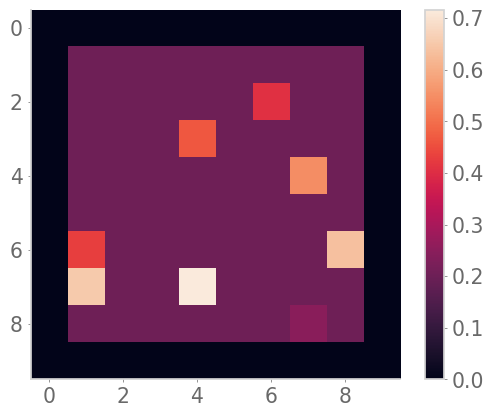

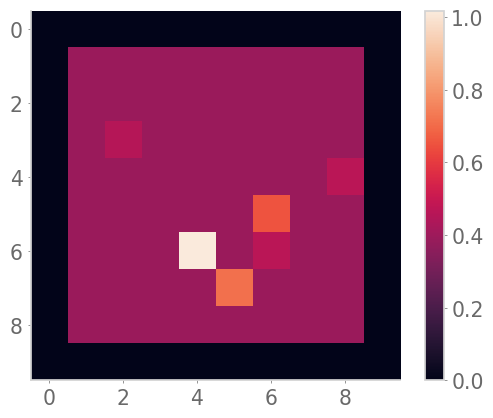

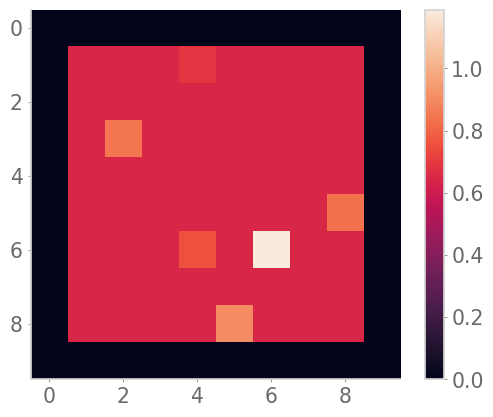

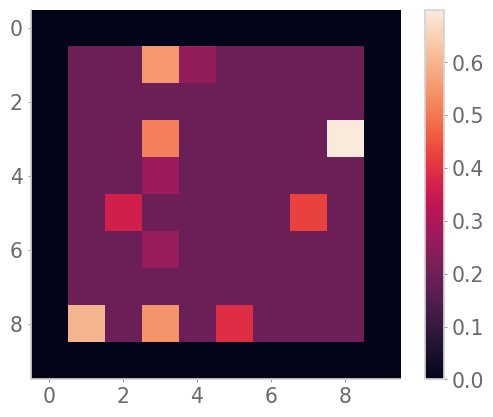

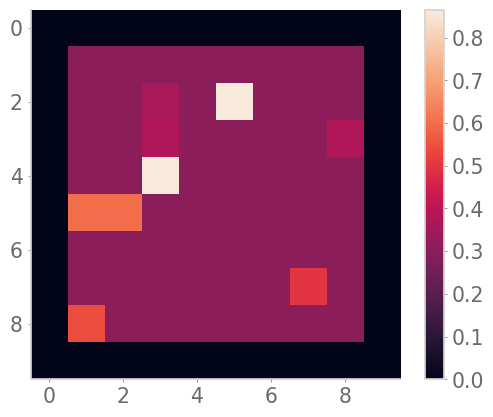

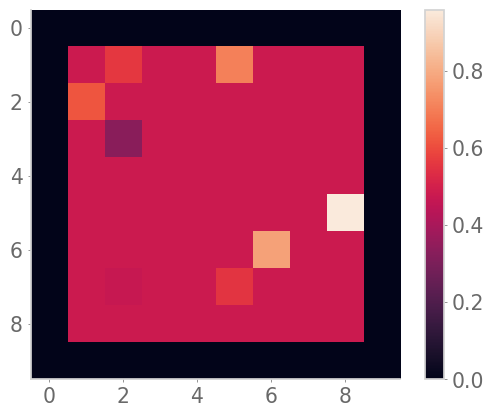

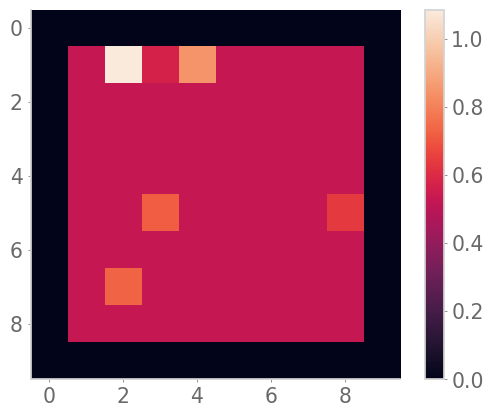

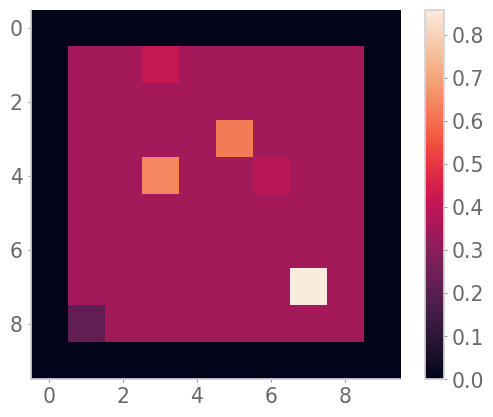

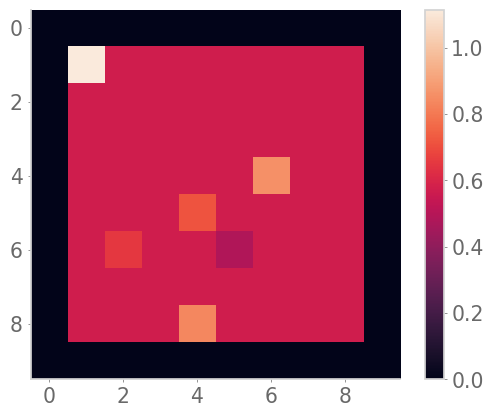

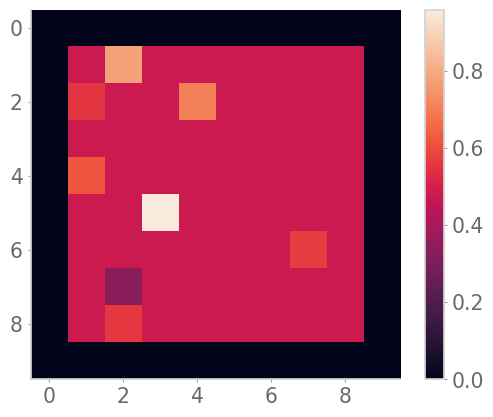

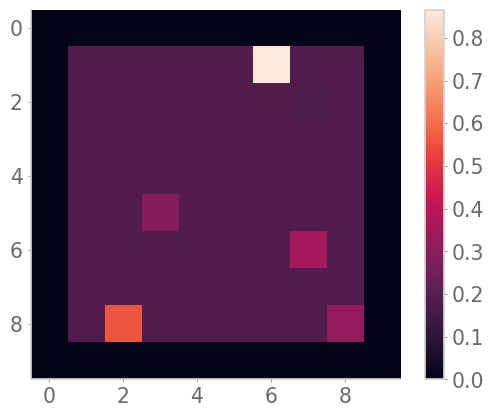

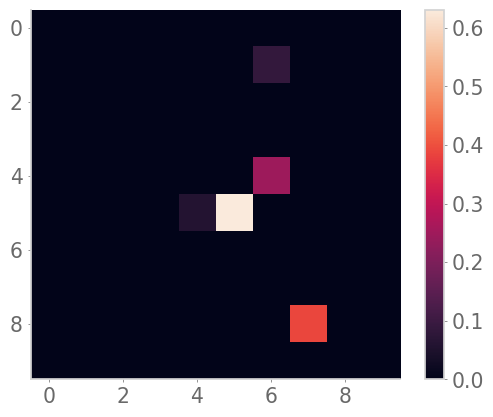

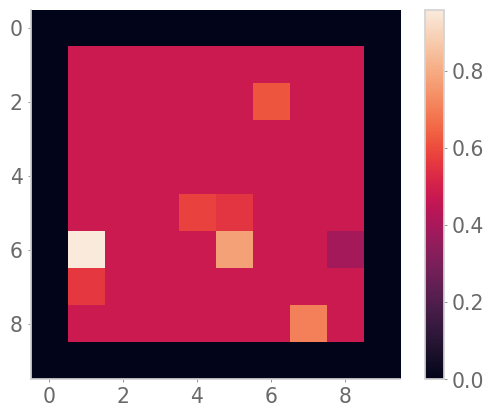

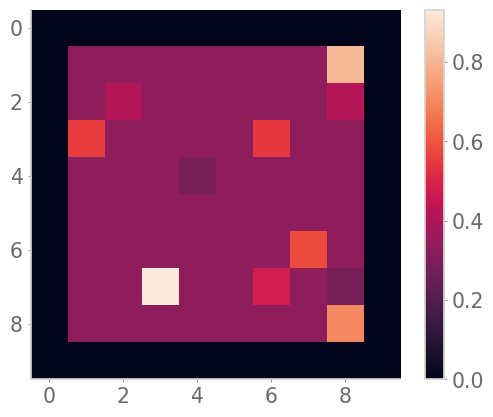

In [ ]:
width = np.max(_df['x']) + 2
height = np.max(_df['y']) + 2

_sample = np.array(_df.head(1)['conv_activity'].item())
n_units = np.prod(_sample.shape)
heatmap = np.zeros((n_units, width, height))

for _, row in _df.iterrows():
    x = row['x']
    y = row['y']
    latents = np.array(row['conv_activity']).flatten()
    heatmap[:,x,y] = latents

for unit in range(n_units):
    plt.figure()
    m = heatmap[unit]
    m[m<0] = 0
    plt.imshow(heatmap[unit])
    plt.colorbar()
    plt.show()

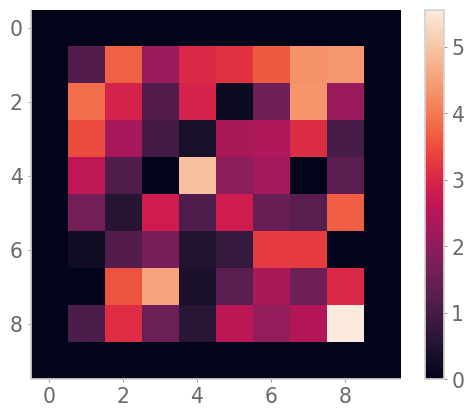

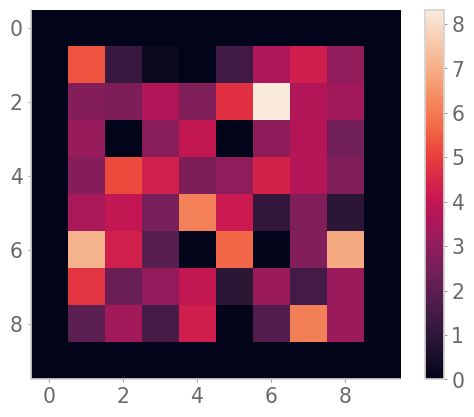

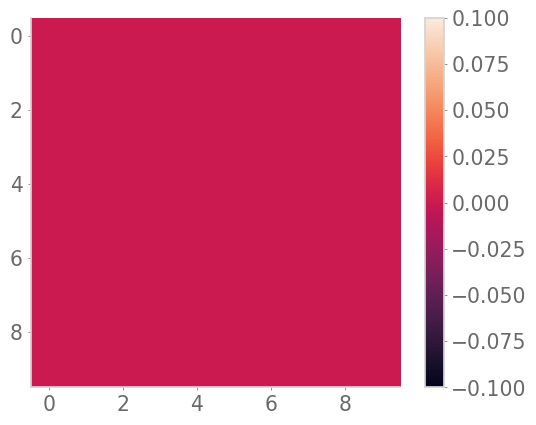

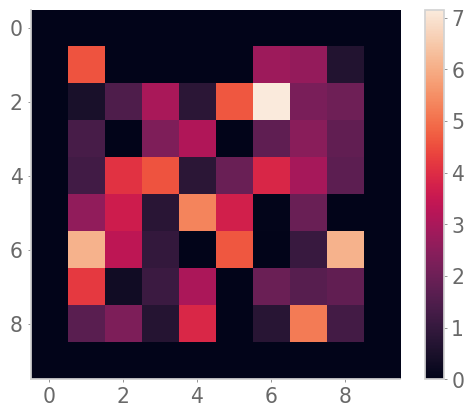

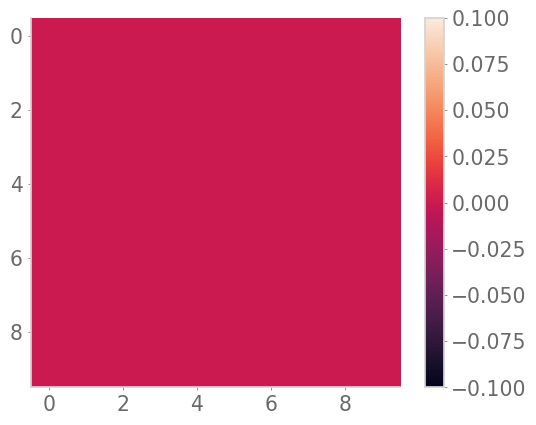

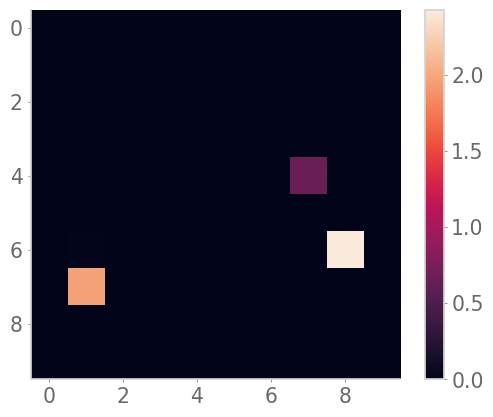

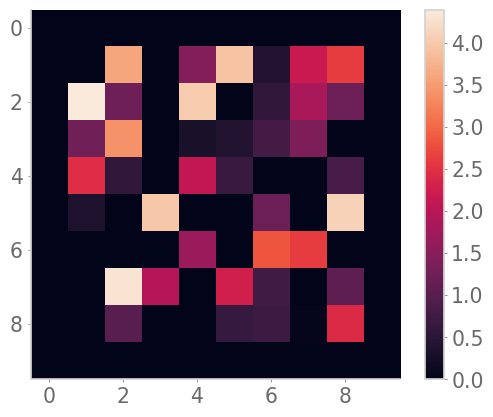

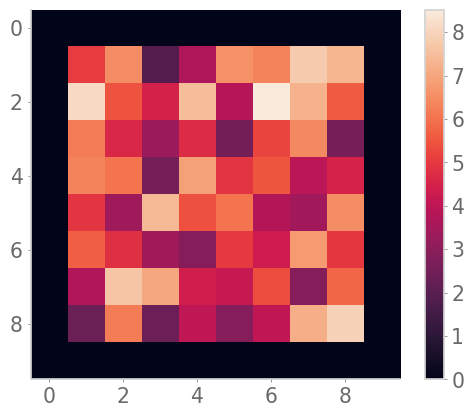

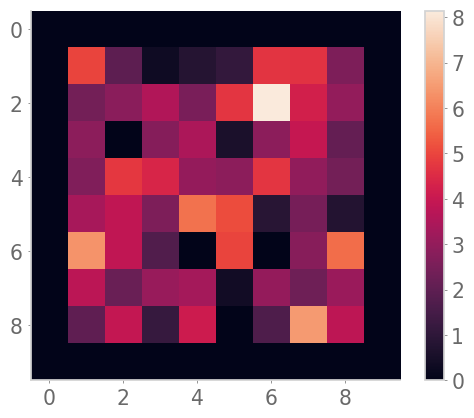

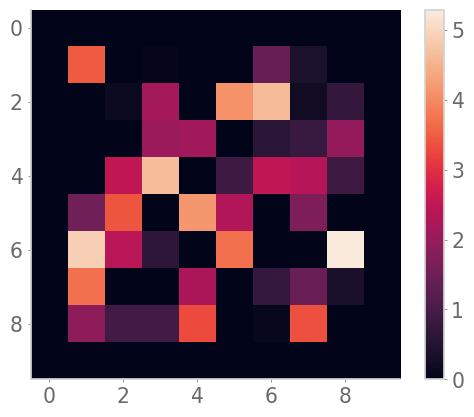

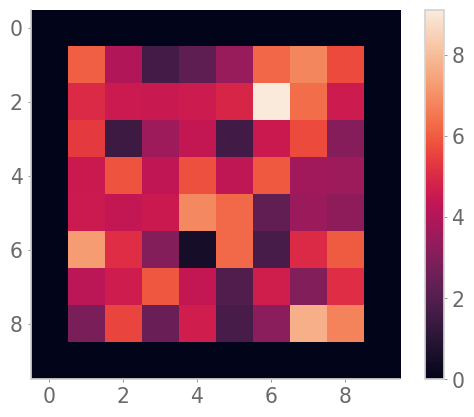

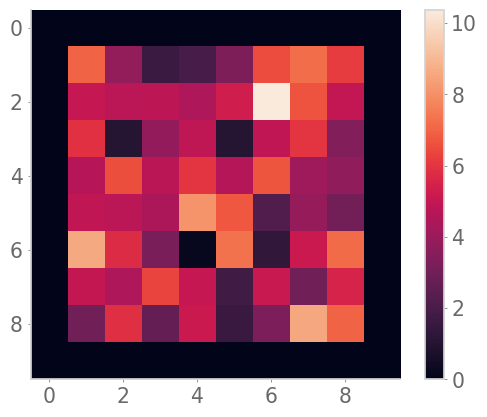

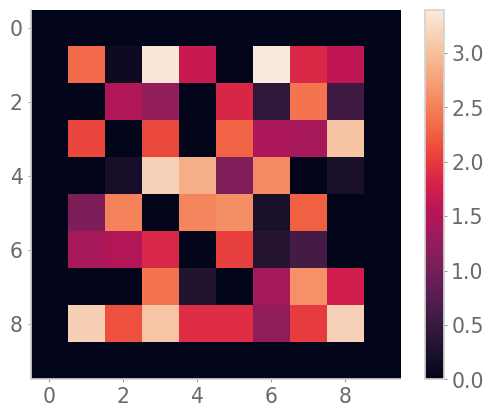

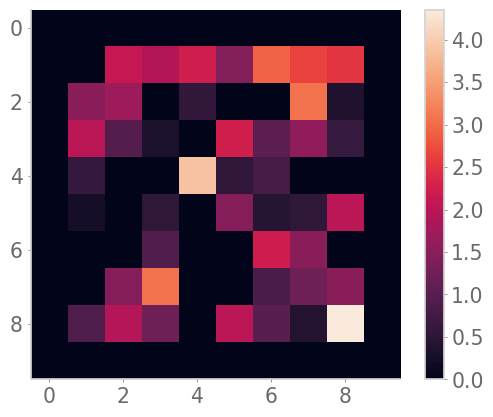

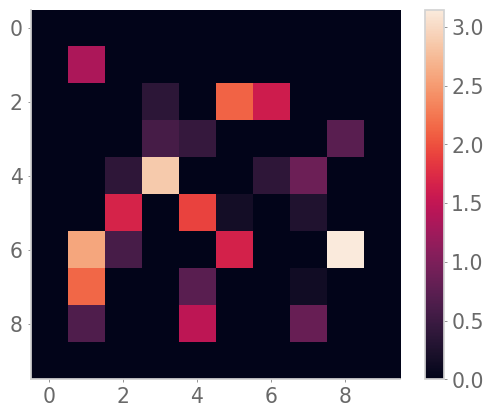

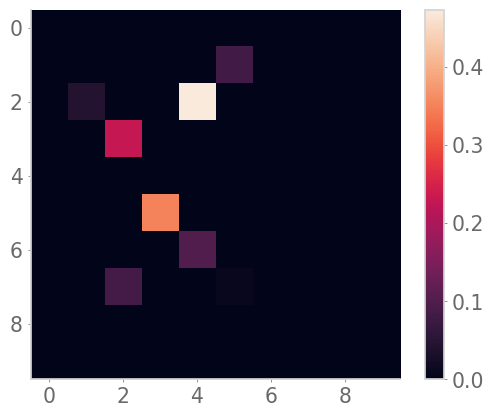

In [130]:
width = np.max(_df['x']) + 2
height = np.max(_df['y']) + 2

_sample = np.array(_df.head(1)['latents'].item())
n_units = _sample.size
heatmap = np.zeros((n_units, width, height))

for _, row in _df.iterrows():
    x = row['x']
    y = row['y']
    latents = np.array(row['latents'])
    heatmap[:,x,y] = latents

for unit in range(n_units):
    plt.figure()
    m = heatmap[unit]
    m[m<0] = 0
    plt.imshow(heatmap[unit])
    plt.colorbar()
    plt.show()

# Make transition network receptive fields

In [102]:
np.unique(T_df['model'])

array(['gridworld8x8_shuffobs_entro0',
       'gridworld8x8_shuffobs_g0.25_-3_entro0',
       'gridworld8x8_shuffobs_g0.5_-3_entro0',
       'gridworld8x8_shuffobs_g0.8_-4_entro0',
       'gridworld8x8_shuffobs_g0_-2_entro0', 'gridworld8x8_shuffobs_mf0'],
      dtype=object)

In [103]:
model = f'{generic_exp_name}_g0_-2_entro0'

In [104]:
_df = T_df[T_df['model'] == model]
_df = _df[_df['iteration'] == 1]

In [105]:
width = np.max(_df['x']) + 2
height = np.max(_df['y']) + 2
n_actions = np.max(_df['action']) + 1

_sample = np.array(_df.head(1)['outputs'].item())
n_units = _sample.size
heatmap = np.zeros((n_actions, n_units, width, height))

for _, row in _df.iterrows():
    x = row['x']
    y = row['y']
    action = row['action']
    latents = np.array(row['outputs'])
    heatmap[action,:,x,y] = latents

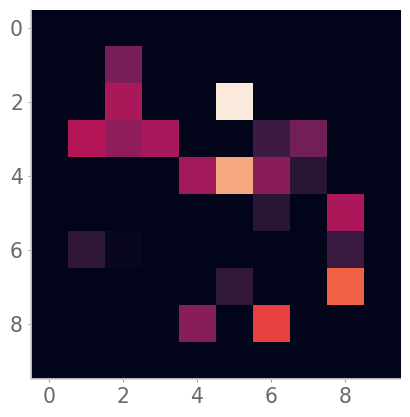

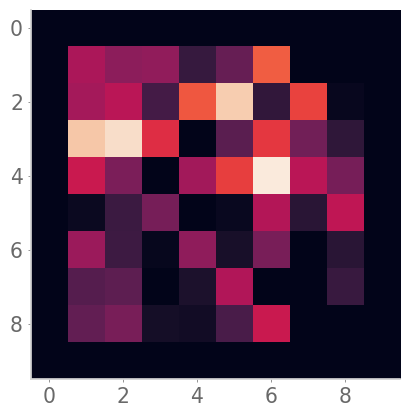

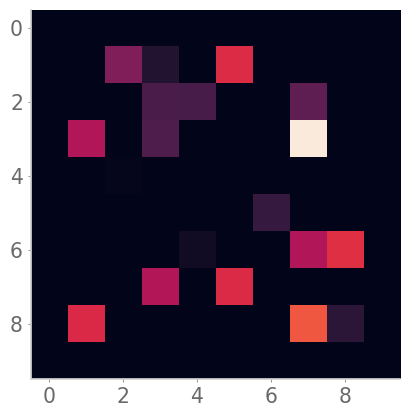

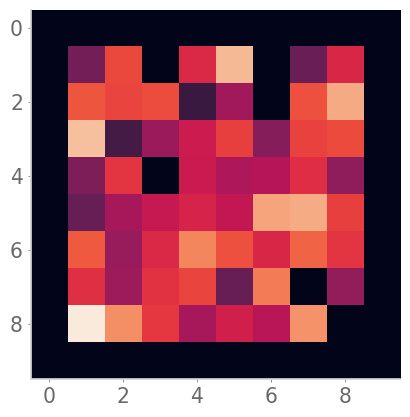

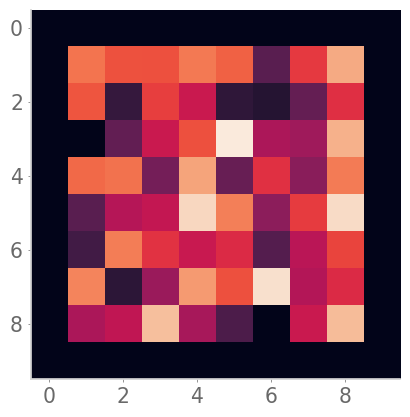

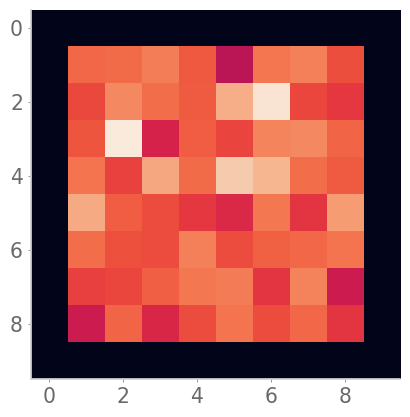

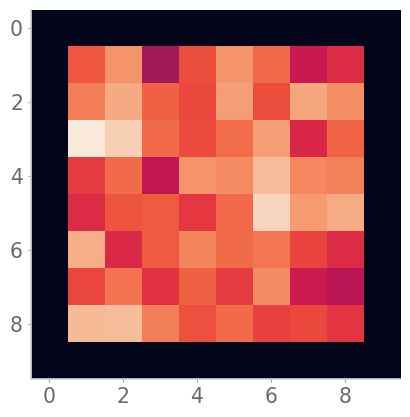

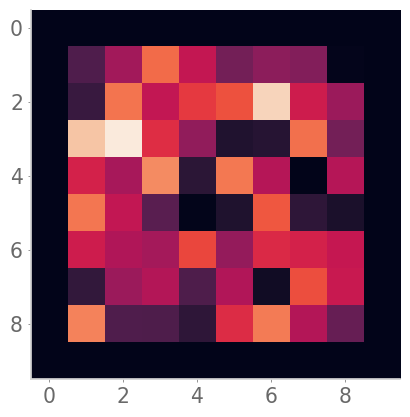

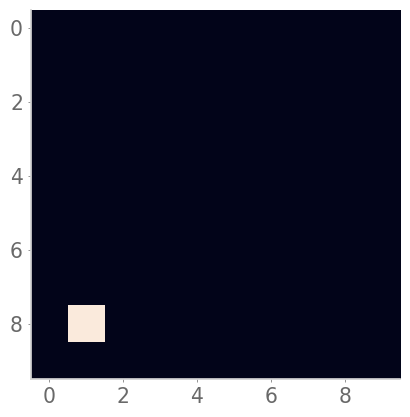

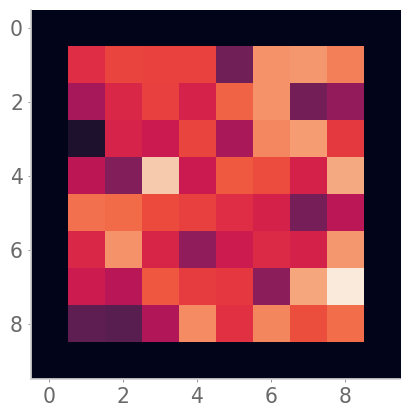

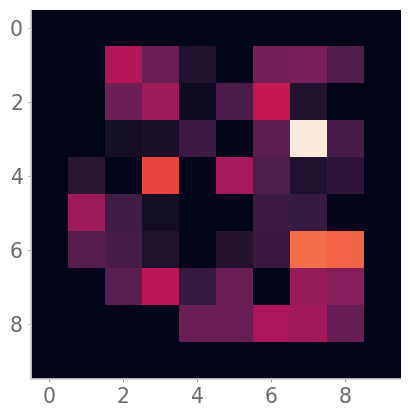

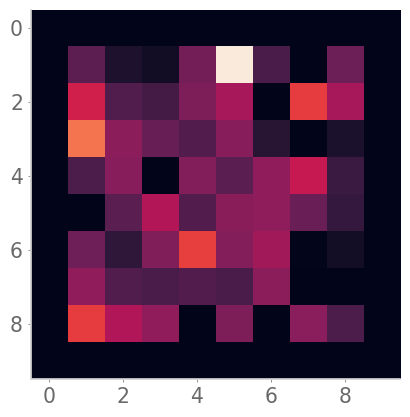

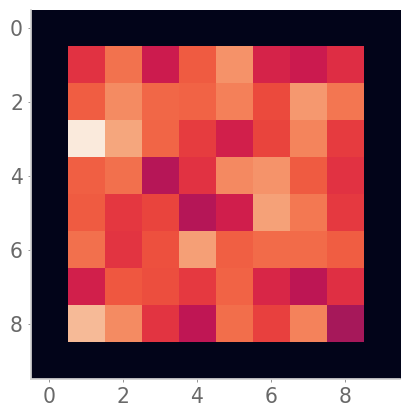

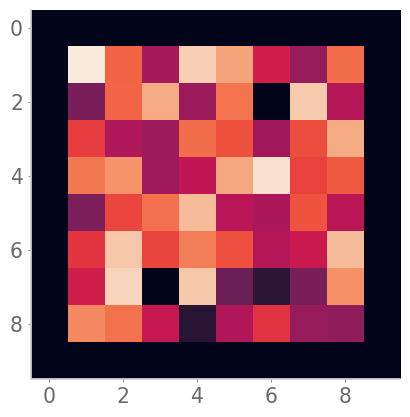

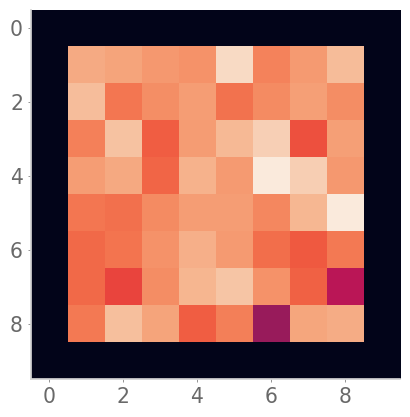

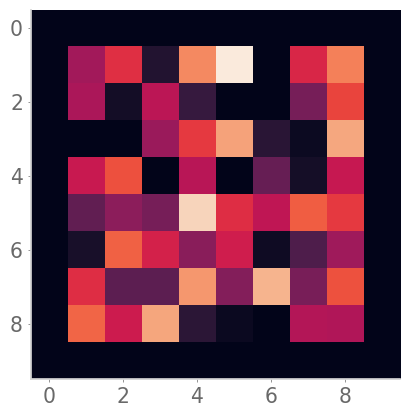

In [106]:
for unit in range(n_units):
    plt.figure()
    m = np.mean(heatmap[:,unit], axis=0)
    m[m<0] = 0
    plt.imshow(m)
    plt.show()

(array([  59.,  377., 3166.,  998.,  747.,  499.,  353.,  137.,   45.,
          19.]),
 array([-0.95529974, -0.51563457, -0.07596941,  0.36369575,  0.80336092,
         1.24302608,  1.68269124,  2.1223564 ,  2.56202157,  3.00168673,
         3.44135189]),
 <BarContainer object of 10 artists>)

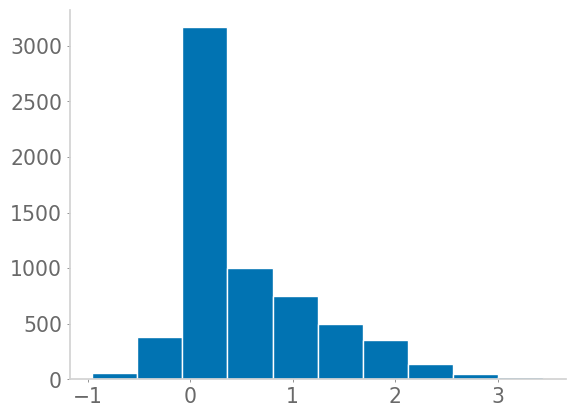

In [165]:
plt.figure()
plt.hist(heatmap.flatten())